In [ ]:
import pandas as pd
import json

# Função para corrigir linhas JSON
def corrigir_json(linha):
    try:
        # Tenta carregar a linha como JSON
        json.loads(linha)
        return linha
    except json.JSONDecodeError as e:
        # Se houver um erro, tenta corrigir a linha
        if 'Expecting property name enclosed in double quotes' in str(e):
            linha_corrigida = linha.replace("'", '"')
            return linha_corrigida
        elif 'Unterminated string starting' in str(e):
            linha_corrigida = linha.replace('\n', '')
            return linha_corrigida
        else:
            raise e

# Arquivo JSON original e corrigido
arquivo_entrada = '/content/metricass.json'
arquivo_saida = 'arquivo_corrigido.json'

# Corrigir o arquivo JSON
with open(arquivo_entrada, 'r', encoding='utf-8') as entrada, open(arquivo_saida, 'w', encoding='utf-8') as saida:
    for linha in entrada:
        linha_corrigida = corrigir_json(linha)
        saida.write(linha_corrigida)

print("Arquivo JSON corrigido e salvo como", arquivo_saida)


FileNotFoundError: [Errno 2] No such file or directory: '/content/metricass.json'

In [1]:
import pandas as pd
import json

def ler_arquivo_json(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                # Tentar carregar cada linha como um objeto JSON
                data.append(json.loads(line.strip()))
            except json.JSONDecodeError as e:
                # Capturar e exibir qualquer erro de JSON
                print(f"Erro ao decodificar JSON na linha: {line}")
                print(f"Erro: {e}")
                continue
    return data

# Caminho do arquivo JSON
file_path = '/content/arquivo_corrigido.json'

# Ler o JSON e converter para DataFrame
data = ler_arquivo_json(file_path)
if data:
    df = pd.DataFrame(data)
    # Verificar os dados lidos
    print(df.head())
else:
    print("Nenhum dado foi carregado do arquivo JSON.")


Erro ao decodificar JSON na linha: {"account_id":"140617947331295","campaign
Erro: Unterminated string starting at: line 1 column 33 (char 32)
  account_id  campaign_id  clicks  impressions  conversions  leads visits  \
0             17873485199       0            0            0    4.0      0   
1             17873485199       0            0            0    4.0      0   
2             17873485199       0            0            0    4.0      0   
3             17873485199       0            0            0    4.0      0   
4             17873485199       0            0            0    4.0      0   

   reach  investment  engagement  ...  campaign_name  campaign_age  \
0    0.0         0.0           0  ...                 [UNDEFINIED]   
1    0.0         0.0           0  ...                 [UNDEFINIED]   
2    0.0         0.0           0  ...                 [UNDEFINIED]   
3    0.0         0.0           0  ...                 [UNDEFINIED]   
4    0.0         0.0           0  ...       

In [2]:
#print(df['campaign_id'].unique())  # Listar nomes de campanhas únicas
print('Número de campanhas diferentes')
print(len(df['campaign_id'].unique()))

Número de campanhas diferentes
217


In [3]:
import matplotlib.pyplot as plt

def plotar_metricas(dados, campaign_id, metricas, data_inicio=None, data_fim=None):


    # Filtrar dados pela campaign_id
    dados_campanha = dados[dados['campaign_id'] == campaign_id]

    if data_inicio is None or data_fim is None:
        data_inicio = dados_campanha['day'].min()
        data_fim = dados_campanha['day'].max()



    # Filtrar por período de tempo, se fornecido
    if data_inicio is not None and data_fim is not None:
        dados_campanha = dados_campanha[(dados_campanha['day'] >= data_inicio) & (dados_campanha['day'] <= data_fim)]



    # Plot
    plt.figure(figsize=(12, 4))
    for metrica in metricas:
        plt.plot(dados_campanha['day'], dados_campanha[metrica], label=metrica)

    plt.title(f'Sequência de {metrica} da Campanha {campaign_id}')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.legend([f"A sequência tem dados de {data_inicio} até {data_fim}"])
    plt.show()
    #print(f"A campanha ID: {campaign_id} tem dados de {data_inicio} até {data_fim}")


Adicionei na função 'plotar_metricas' a opção de inserir as datas de início/fim, para conseguir ter uma visão detalhada sobre as métricas de uma campanha. Porém, cada campanha dura apenas um período específico de tempo, então ao passar os parâmetros 'data_inicio' e 'data_fim' como NONE, o plot irá nos revelar o período que a campanha esteve ativa

In [4]:
metricas_interesse = ['clicks', 'impressions', 'investment']
#metricas_positivas = ['clicks', 'engagement', 'leads'] # Deixarei a métrica 'conversions' ser igual a 0.


campanhas_validas = []
campanhas_invalidas = []
for campanha_id in df['campaign_id'].unique():
    dados_campanha = df[df['campaign_id'] == campanha_id]
    if not (dados_campanha[metricas_interesse] == 0).all().any():
        campanhas_validas.append(campanha_id)
    else:
        campanhas_invalidas.append(campanha_id)
df_filtrado = df[df['campaign_id'].isin(campanhas_validas)]

print(f"Número de campanhas apagadas: {len(campanhas_invalidas)}")
print(f"Número de campanhas restantes: {df_filtrado['campaign_id'].nunique()}")
#print(df_filtrado['campaign_id'].unique())



Número de campanhas apagadas: 9
Número de campanhas restantes: 208


In [5]:
# Aplicando a normalização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

metricas_interesse = ['clicks', 'impressions']

# Fiz uma cópia do dataset para aplicar outra normalização e fazer a comparação
scaler = StandardScaler()

df_filtrado_novo = df_filtrado.copy()

df_filtrado_novo[metricas_interesse] = scaler.fit_transform(df_filtrado[metricas_interesse])

# Supondo que df_filtrado já esteja definido
colunas_interesse = metricas_interesse + ['investment', 'day', 'campaign_id']

# METRICAS DE INTERESSE = 0
df_filtrado_novo = df_filtrado_novo[~((df_filtrado_novo['clicks'] == 0) | (df_filtrado_novo['impressions'] == 0) | (df_filtrado_novo['investment'] == 0))]

# Verificar o resultado
df_filtrado_novo



account_id        campaign_id    clicks  impressions  conversions  \
191                  0           21032236 -0.080013     0.044564            0   
192                  0           21032236 -0.106360    -0.000298            0   
193                  0           21032236 -0.136472    -0.148331            0   
194                  0           21032237  0.174526    -0.415177            0   
195                  0           21032237 -0.013202    -0.437685            0   
...                ...                ...       ...          ...          ...   
10339  140617947331295  23859244248500010 -0.212693    -0.382026            6   
10340  140617947331295  23859244248500010 -0.196225    -0.419411            0   
10341  140617947331295  23859244248500010 -0.208458    -0.378196            8   
10342  140617947331295  23859244248500010 -0.208929    -0.418597            0   
10343  140617947331295  23859244248500010 -0.210340    -0.379585            9   

       leads visits        reach  investment  engagement  ...  \
191      0.0      0     0.000000  832.120000           0  ...   
192      0.0      0     0.000000  761.610000           0  ...   
193      0.0      0     0.000000  528.940000           0  ...   
194      0.0      0     0.000000  192.010000           0  ...   
195      0.0      0     0.000000  129.980000           0  ...   
...      ...    ...          ...         ...         ...  ...   
10339    0.0      0  3755.550000  729.620000       18736  ...   
10340    0.0      0  2100.236364  203.650000        5868  ...   
10341    0.0      0  3609.991667  719.282965       18990  ...   
10342    0.0      0  1983.681818  201.037034        5843  ...   
10343    0.0      0  3370.905303  700.150000       18457  ...   

                                           campaign_name  campaign_age  \
191                                      Score365_Basic   [UNDEFINIED]   
192                                      Score365_Basic   [UNDEFINIED]   
193                                      Score365_Basic   [UNDEFINIED]   
194                                   Score365_Standard   [UNDEFINIED]   
195                                   Score365_Standard   [UNDEFINIED]   
...                                                  ...           ...   
10339  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   
10340  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   
10341  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   
10342  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   
10343  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   

       campaign_gender                                    campaign_region  \
191       [UNDEFINIED]                                       [UNDEFINIED]   
192       [UNDEFINIED]                                       [UNDEFINIED]   
193       [UNDEFINIED]                                       [UNDEFINIED]   
194       [UNDEFINIED]                                       [UNDEFINIED]   
195       [UNDEFINIED]                                       [UNDEFINIED]   
...                ...                                                ...   
10339               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   
10340               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   
10341               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   
10342               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   
10343               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   

       campaign_tags  campaign_income    channel     connector    source  \
191     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA     Gamma   
192     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA     Gamma   
193     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA     Gamma   
194     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA     Gamma   
195     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA  

# Meu objetivo agora é conseguir fazer plots das minhas métricas de interesse para cada campanha diferente e visualizar as curvas. Para isso vou tentar talvez usar outra biblioteca que faça múltiplos plots menores

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Supondo que df_filtrado tenha as colunas 'campaign_id', 'day' e as métricas de interesse
unique_campaigns = df_filtrado_novo['campaign_id'].unique()
num_campaigns = len(unique_campaigns)


# Define the number of rows and columns for the subplots
rows = (num_campaigns // 5) + 1
cols = 5

# Create subplots
fig = make_subplots(rows=rows, cols=cols, subplot_titles=unique_campaigns)

for i, campaign_id in enumerate(unique_campaigns):
    row = i // cols + 1
    col = i % cols + 1
    campaign_data = df_filtrado_novo[df_filtrado_novo['campaign_id'] == campaign_id]
    for metrica in metricas_interesse:

      fig.add_trace(go.Scatter(x=campaign_data['day'], y=campaign_data[metrica], mode='lines', name=metrica), row=row, col=col)

fig.update_layout(height=8000, width=3000, showlegend=True)
fig.show()

<ipython-input-7-970d7d903562>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



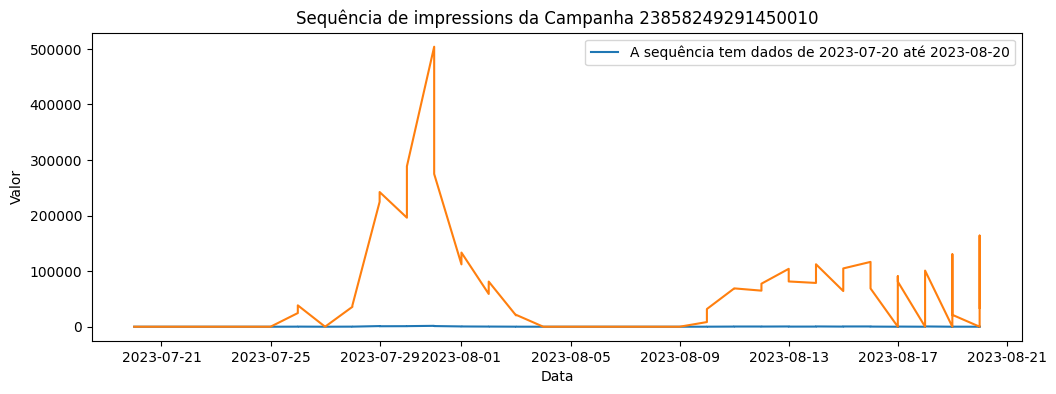

In [7]:
df_filtrado['day'] = pd.to_datetime(df_filtrado['day'])  # Garantir que a coluna 'day' está no formato datetime



id = '23858249291450010'
metrica = ['engagement']
data_inicio = '2023-07-20'
data_fim = '2023-08-20'

plotar_metricas(df_filtrado, id, metricas_interesse, data_inicio, data_fim)




In [8]:
campanha_especifica = 23852547432330010
metricas_interesse = ['clicks', 'impressions']

dados_campanha_especifica = df_filtrado[
    (df_filtrado['campaign_id'] == campanha_especifica)
][metricas_interesse]

dados_campanha_especifica = df_filtrado[df_filtrado['campaign_id'] == campanha_especifica][['day'] + metricas_interesse]

# Adicionar a coluna 'day' aos dados da campanha para o Prophet

# Verificar os dados filtrados
df_filtrado_novo


account_id        campaign_id    clicks  impressions  conversions  \
191                  0           21032236 -0.080013     0.044564            0   
192                  0           21032236 -0.106360    -0.000298            0   
193                  0           21032236 -0.136472    -0.148331            0   
194                  0           21032237  0.174526    -0.415177            0   
195                  0           21032237 -0.013202    -0.437685            0   
...                ...                ...       ...          ...          ...   
10339  140617947331295  23859244248500010 -0.212693    -0.382026            6   
10340  140617947331295  23859244248500010 -0.196225    -0.419411            0   
10341  140617947331295  23859244248500010 -0.208458    -0.378196            8   
10342  140617947331295  23859244248500010 -0.208929    -0.418597            0   
10343  140617947331295  23859244248500010 -0.210340    -0.379585            9   

       leads visits        reach  investment  engagement  ...  \
191      0.0      0     0.000000  832.120000           0  ...   
192      0.0      0     0.000000  761.610000           0  ...   
193      0.0      0     0.000000  528.940000           0  ...   
194      0.0      0     0.000000  192.010000           0  ...   
195      0.0      0     0.000000  129.980000           0  ...   
...      ...    ...          ...         ...         ...  ...   
10339    0.0      0  3755.550000  729.620000       18736  ...   
10340    0.0      0  2100.236364  203.650000        5868  ...   
10341    0.0      0  3609.991667  719.282965       18990  ...   
10342    0.0      0  1983.681818  201.037034        5843  ...   
10343    0.0      0  3370.905303  700.150000       18457  ...   

                                           campaign_name  campaign_age  \
191                                      Score365_Basic   [UNDEFINIED]   
192                                      Score365_Basic   [UNDEFINIED]   
193                                      Score365_Basic   [UNDEFINIED]   
194                                   Score365_Standard   [UNDEFINIED]   
195                                   Score365_Standard   [UNDEFINIED]   
...                                                  ...           ...   
10339  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   
10340  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   
10341  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   
10342  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   
10343  Awareness_Maltado-Agosto_Visualizacoes-de-vide...            []   

       campaign_gender                                    campaign_region  \
191       [UNDEFINIED]                                       [UNDEFINIED]   
192       [UNDEFINIED]                                       [UNDEFINIED]   
193       [UNDEFINIED]                                       [UNDEFINIED]   
194       [UNDEFINIED]                                       [UNDEFINIED]   
195       [UNDEFINIED]                                       [UNDEFINIED]   
...                ...                                                ...   
10339               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   
10340               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   
10341               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   
10342               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   
10343               []  [São Paulo (state), Pernambuco, Paraná, Bahia,...   

       campaign_tags  campaign_income    channel     connector    source  \
191     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA     Gamma   
192     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA     Gamma   
193     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA     Gamma   
194     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA     Gamma   
195     [UNDEFINIED]     [UNDEFINIED]      gamma         GAMMA  

In [9]:
def calcular_media_dados_diarios(df):
    medias_diarias = {}
    for campaign_id in df['campaign_id'].unique():
        dados_campanha = df[df['campaign_id'] == campaign_id]
        dados_diarios = dados_campanha.groupby('day').size()
        medias_diarias[campaign_id] = dados_diarios.mean()
    return medias_diarias


# Calcular a média de dados diários para cada campanha
medias_diarias = calcular_media_dados_diarios(df_filtrado_novo)

# Converter o dicionário em um DataFrame para facilitar a ordenação
medias_diarias_df = pd.DataFrame(list(medias_diarias.items()), columns=['campaign_id', 'media_dados_diarios'])

# Ordenar as campanhas com base na média de dados diários
medias_diarias_df = medias_diarias_df.sort_values(by='media_dados_diarios', ascending=False)

# Verificar o resultado
#print(medias_diarias_df)

# Definir o número de campanhas a selecionar
X = 6  # Você pode alterar o valor de X conforme necessário

# Selecionar as X campanhas com mais dados diários
campanhas_selecionadas = medias_diarias_df.head(X)['campaign_id']

# Criar um novo DataFrame com as campanhas selecionadas
df_filtrado_top_campanhas = df_filtrado_novo[df_filtrado_novo['campaign_id'].isin(campanhas_selecionadas)]

# Verificar o resultado


df_teste = df_filtrado.copy()
df_teste = df_teste[df_teste['campaign_id'].isin(campanhas_selecionadas)]
#print(df_teste[metricas_interesse])
#df_teste_1 = scaler.inverse_transform(df_teste[metricas_interesse])
#df_teste_1 = pd.DataFrame(df_teste_1, columns=metricas_interesse)
#colunas_desejadas = ['day', 'investment', 'campaign_id']
#df_teste_1 = pd.concat([df_filtrado_top_campanhas[colunas_desejadas], df_teste_1], axis=1)

df_teste_1 = df_teste.dropna()
df_teste_1 = df_teste_1[df_teste_1['investment'] != 0]
dfpv = df_teste_1.copy()
xrc = (dfpv['investment'] == 0).sum()
print(xrc)

#dfpv = df_filtrado_top_campanhas[df_filtrado_top_campanhas['campaign_id'].isin(campanhas_selecionadas)]

#dfpv.isnull().sum()


0


In [10]:
xrc = (dfpv['clicks'] == 0).sum()
print(xrc)

novodf = dfpv.copy()
novodf = novodf[novodf['clicks'] != 0]

xrc = (novodf['clicks'] == 0).sum()
print(xrc)



146
0


In [11]:
metricas_interesse

['clicks', 'impressions']

In [12]:

unique_campaigns = dfpv['campaign_id'].unique()
num_campaigns = len(unique_campaigns)


# Define the number of rows and columns for the subplots
rows = (num_campaigns // 5) + 1
cols = 5

# Create subplots
fig = make_subplots(rows=rows, cols=cols, subplot_titles=unique_campaigns)

for i, campaign_id in enumerate(unique_campaigns):
    row = i // cols + 1
    col = i % cols + 1
    campaign_data = dfpv[dfpv['campaign_id'] == campaign_id]
    for metrica in metricas_interesse:

      fig.add_trace(go.Scatter(x=campaign_data['day'], y=campaign_data[metrica], mode='lines', name=metrica), row=row, col=col)

fig.update_layout(height=1000, width=2000, showlegend=True)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# MODELO PROPHET

In [13]:
def preparar_dados_prophet(df, campanha_id, metrica):

    dados_campanha = df[df['campaign_id'] == campanha_id].copy()
    dados_campanha['day'] = pd.to_datetime(dados_campanha['day'])
    dados_campanha[metrica] = scaler.fit_transform(dados_campanha[[metrica]])
    dados_prophet = dados_campanha[['day', metrica, 'investment']].rename(columns={'day': 'ds', metrica: 'y'})
    dados_prophet = dados_prophet.dropna()

    return dados_prophet


#campanha_especifica = 23850404865520168
#campanha_especifica = str(campanha_especifica)     # Exemplo de campanha específica
#dados_prophet_clicks = preparar_dados_prophet(df_filtrado_top_campanhas, campanha_especifica, 'clicks')
#dados_prophet_impressions = preparar_dados_prophet(df_filtrado_top_campanhas, campanha_especifica, 'impressions')

In [14]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

def treinar_e_prever_prophet(dados_prophet, periods=30):

    train_size = int(len(dados_prophet) * 0.8)
    dados_treino = dados_prophet[:train_size]
    dados_teste = dados_prophet[train_size:]


    modelo_prophet = Prophet()
    modelo_prophet.add_regressor('investment')
    modelo_prophet.fit(dados_treino)



    future = modelo_prophet.make_future_dataframe(periods=periods, include_history = True)
    future['investment'] = dados_prophet['investment'].iloc[-1]  # Usar o último valor de investimento como exemplo
    forecast = modelo_prophet.predict(future)

    forecast[['yhat']] = scaler.inverse_transform(forecast[['yhat']])
    dados_treino[['y']] = scaler.inverse_transform(dados_treino[['y']])
    dados_teste[['y']] = scaler.inverse_transform(dados_teste[['y']])


    return forecast, dados_treino, dados_teste, modelo_prophet

#forecast_clicks, dados_treino_clicks, dados_teste_clicks, modelo_prophet_clicks = treinar_e_prever_prophet(dados_prophet_clicks)
#forecast_impressions, dados_treino_impressions, dados_teste_impressions, modelo_prophet_impressions = treinar_e_prever_prophet(dados_prophet_impressions)

In [15]:
def plotar_previsoes(forecast, dados_teste, metrica, campanha_id, modelo_prophet):
    fig, ax = plt.subplots(figsize=(10, 6))
    modelo_prophet.plot(forecast, ax=ax)
    ax.scatter(dados_teste['ds'], dados_teste['y'], color='r')
    plt.title(f'Previsão do Modelo Prophet para a Métrica {metrica} da campanha {campanha_id}')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.show()

In [16]:
#plotar_previsoes(forecast_clicks, dados_teste_clicks, 'Clicks', campanha_especifica, modelo_prophet_clicks)
#plotar_previsoes(forecast_impressions, dados_teste_impressions, 'Impressions', campanha_especifica, modelo_prophet_impressions)


# FIM

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calcular_metricas_erro(dados_teste, forecast):
    y_true = dados_teste['y'].values
    y_pred = forecast['yhat'].values[-len(dados_teste):]

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    return mae, rmse

# Calcular métricas de erro para cada métrica
#mae_clicks, rmse_clicks = calcular_metricas_erro(dados_teste_clicks, forecast_clicks)
#mae_impressions, rmse_impressions = calcular_metricas_erro(dados_teste_impressions, forecast_impressions)
#print(f"Clicks - MAE: {mae_clicks}, RMSE: {rmse_clicks}")
#print(f"Impressions - MAE: {mae_impressions}, RMSE: {rmse_impressions}")

In [18]:
def calcular_mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    return mape, smape

def calcular_smape(y_true, y_pred):
    smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    return smape

#y_true = dados_teste_clicks['y'].values
#y_pred = forecast_clicks.iloc[-len(y_true):]['yhat'].values
# Calculando o MAPE / SMAPE
#mape = calcular_mape(y_true, y_pred)
#print(f'MAPE: {mape}%')
#smape = calcular_smape(y_true, y_pred)
#print(f'sMAPE: {smape}%')

In [19]:
# Supondo que você quer prever as métricas para um novo investimento
#novo_investimento = 2500  # Exemplo de novo investimento
#future = modelo_prophet_clicks.make_future_dataframe(periods=15)
#future['investment'] = novo_investimento
#forecast_novo_investimento = modelo_prophet_clicks.predict(future)

# Plot das previsões para o novo investimento
#fig = modelo_prophet_clicks.plot(forecast_novo_investimento)
#plt.title(f'Previsão de Clicks para um Novo Investimento de {novo_investimento}')
#plt.show()


# MODELO LSTM (LONG SHORT TERM MEMORY)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [21]:
def preparar_dados_lstm(df, metrica, campaign_id, look_back=1):
    dados_campanha = df[df['campaign_id'] == campaign_id].copy()
    dados_campanha['day'] = pd.to_datetime(dados_campanha['day'])

    dataset = dados_campanha[[metrica]].values.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY), scaler


campanha_especifica = 23854833891400010
campanha_especifica = str(campanha_especifica)     # Exemplo de campanha específica
#dados_lstm_clicks = preparar_dados_lstm(df_filtrado_top_campanhas, 'clicks', campanha_especifica, look_back=1)
#dados_lstm_impressions = preparar_dados_lstm(df_filtrado_top_campanhas, 'impressions', campanha_especifica, look_back=1)


In [22]:
def treinar_e_prever_lstm(df, campaign_id, metrica, look_back=1, epochs=20):
    # Preparar dados
    X, Y, scaler = preparar_dados_lstm(df, metrica, campaign_id, look_back)

    # Dividir os dados em treino e teste
    train_size = int(len(X) * 0.8)
    test_size = len(X) - train_size
    trainX, testX = X[0:train_size], X[train_size:len(X)]
    trainY, testY = Y[0:train_size], Y[train_size:len(Y)]

    # Reshape para [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # Construir o modelo LSTM
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo
    model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)

    # Fazer previsões
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # Inverter a normalização para obter os valores reais
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    return trainPredict, testPredict, trainY, testY, model

#predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(df_filtrado_top_campanhas, campanha_especifica, 'impressions', look_back=1, epochs=20)


In [23]:
#print(trainY_lstm_impressions.shape)
#print(testY_lstm_impressions.shape)

In [24]:
def plotar_previsoes_lstm(dados, campaign_id, metrica, trainPredict, testPredict, look_back=1):
    dados_campanha = dados[dados['campaign_id'] == campaign_id].copy()
    dados_campanha['day'] = pd.to_datetime(dados_campanha['day'])

    plt.figure(figsize=(10, 6))
    plt.plot(dados_campanha['day'], dados_campanha[metrica], label='Real')

    # Plotar previsões de treino
    trainPredictPlot = np.empty_like(dados_campanha[metrica].values)
    trainPredictPlot[:] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:, 0]

    # Plotar previsões de teste
    testPredictPlot = np.empty_like(dados_campanha[metrica].values)
    testPredictPlot[:] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2):len(trainPredict)+(look_back*2)+len(testPredict)] = testPredict[:, 0]


    plt.plot(dados_campanha['day'], trainPredictPlot, label='Previsão Treino')
    plt.plot(dados_campanha['day'], testPredictPlot, label='Previsão Teste')

    plt.xlabel('Data')
    plt.ylabel(metrica.capitalize())
    plt.legend()
    plt.show()

#plotar_previsoes_lstm(df_filtrado_top_campanhas, campanha_especifica, 'impressions', predict_treino_lstm_impressions, predict_teste_lstm_impressions)

# MODELO RNN

In [25]:
from tensorflow.keras.layers import SimpleRNN, Dense

def preparar_dados_rnn(df, metrica, campaign_id, look_back=1):
    dados_campanha = df[df['campaign_id'] == campaign_id].copy()
    dados_campanha['day'] = pd.to_datetime(dados_campanha['day'])

    dataset = dados_campanha[[metrica]].values.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY), scaler


In [26]:
def treinar_e_prever_rnn(dados, campaign_id, metrica, look_back=1, epochs=2, batch_size=1):
    # Preparar dados
    X, Y, scaler = preparar_dados_rnn(dados, metrica, campaign_id, look_back=1)

    # Dividir TREINO/TESTE
    train_size = int(len(X) * 0.8)
    test_size = len(X) - train_size
    trainX, testX = X[0:train_size], X[train_size:len(X)]
    trainY, testY = Y[0:train_size], Y[train_size:len(Y)]


    # Reshape para [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    print(f"trainX shape: {trainX.shape}, testX shape: {testX.shape}")
    print(f"trainY shape: {trainY.shape}, testY shape: {testY.shape}")

    # Construir o modelo
    model = Sequential()
    model.add(SimpleRNN(4, return_sequences=True, input_shape=(look_back, 1)))
    model.add(SimpleRNN(4, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo
    model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=2)

    # Fazer previsões
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    print("Shape real para testPredict:", testPredict.shape) #################

    # Inverter normalização para ter valores reais
    #scaler = preparar_dados_rnn(dados, metrica, campaign_id, look_back=1)[2]# Para obter o scaler
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    print(model.summary())

    return model, trainPredict, trainY, testPredict, testY

In [27]:
def plotar_previsoes_rnn(dados, campaign_id, metrica, trainPredict, testPredict, look_back=1):
    dados_campanha = dados[dados['campaign_id'] == campaign_id].copy()
    dados_campanha['day'] = pd.to_datetime(dados_campanha['day'])

    plt.figure(figsize=(10, 6))
    plt.plot(dados_campanha['day'], dados_campanha[metrica], label='Real')

    # Plotar previsões de treino
    trainPredictPlot = np.empty_like(dados_campanha[metrica].values)
    trainPredictPlot[:] = 0
    trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:, 0]

    # Plotar previsões de teste
    testPredictPlot = np.empty_like(dados_campanha[metrica].values)
    testPredictPlot[:] = 0
    #print("Shape de trainPredict:", trainPredict.shape)
    #print("Shape de testPredict:", testPredict.shape)


    # Cálculo do intervalo esperado
    start_index = len(trainPredict) + (look_back * 2)
    end_index = start_index + len(testPredict)

    #print("Índice de início para plotagem:", start_index)
    #print("Índice de fim para plotagem:", end_index)
    #print("Shape esperado para testPredictPlot:", testPredictPlot[start_index:end_index].shape)


    testPredict = testPredict[:20]
    #print("Shape real para testPredict:", testPredict.shape)

    # Tentativa de plotagem
    try:
        testPredictPlot[start_index:end_index] = testPredict[:, 0]
        print("Plotagem bem-sucedida!")
    except ValueError as e:
        print("Erro durante a plotagem:", e)


    plt.plot(dados_campanha['day'], trainPredictPlot, label='Previsão Treino')
    plt.plot(dados_campanha['day'], testPredictPlot, label='Previsão Teste')

    plt.xlabel('Data')
    plt.ylabel(metrica.capitalize())
    plt.legend()
    plt.show()

#plotar_previsoes_rnn(df_filtrado_top_campanhas, campanha_especifica, 'impressions', predict_treino_rnn_impressions, predict_teste_rnn_impressions)
#plotar_previsoes_rnn(df_filtrado_top_campanhas, campanha_especifica, 'clicks', predict_treino_rnn_clicks, predict_teste_rnn_clicks)

# Comparar os modelos e encontrar a melhor campanha
## (DF NORMALIZADO)

In [28]:
def calcular_mape_smape(y_true, y_pred):
    # Remover valores zero de y_true para evitar divisões por zero no MAPE
    mask = y_true != 0
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]

    if len(y_true_filtered) == 0:
        return np.nan, np.nan  # Retorna NaN se não houver valores válidos para o cálculo

    mape = np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100
    smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    return mape, smape

def calcular_metricas_erro(dados_teste, forecast):
    y_true = dados_teste
    y_pred = forecast

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    return mae, rmse



In [29]:
def adicionar_resultados(df, campanha, modelos, metricas, resultados):

  for modelo, metricas_modelo in zip(modelos, resultados):
    for metrica, valor in zip(metricas, metricas_modelo):
      nova_linha = {'Campanha': campanha, 'Modelo': modelo, 'Metrica': metrica, 'Valor': valor}
      #nova_linha = {'Campanha': campanha, 'modelo': modelo, 'metrica': metrica, 'valor': valor}
      df = pd.concat([df, pd.DataFrame([nova_linha])], ignore_index=True)

  return df

In [30]:

# Definindo os modelos e métricas
modelos_clicks = ['Prophet - Clicks', 'LSTM - Clicks', 'RNN - Clicks']
modelos_impressions = ['Prophet - Impressions', 'LSTM - Impressions', 'RNN - Impressions']

metricas_clicks = ['MAPE', 'SMAPE', 'MAE', 'RMSE']
metricas_impressions = ['MAPE', 'SMAPE', 'MAE', 'RMSE']

df_novo = pd.DataFrame(columns=['Campanha', 'Modelo', 'Metrica', 'Valor'])






# COMPARAÇÃO CAMPANHAS:
1 - 23850404865520168

In [31]:
print(dfpv['campaign_id'].unique())

campanha_especifica = 23850404865520168
campanha_especifica = str(campanha_especifica)

['23850404865520168' '23854776541010168' '23854890103270168'
 '23851289116490010' '23851316092950010' '23854833891400010']


In [32]:
# Preparação dos dados para Prophet
dados_prophet_clicks_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'clicks')
dados_prophet_impressions_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'impressions')


In [33]:
# Treinamento e previsão dos modelos para "clicks"
forecast_clicks_norm_prophet, dados_treino_clicks_norm_prophet, dados_teste_clicks_norm_prophet, modelo_prophet_clicks_norm = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks, predict_teste_lstm_clicks, trainY_lstm_clicks, testY_lstm_clicks, model_lstm_clicks = treinar_e_prever_lstm(dfpv, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks, predict_treino_rnn_clicks, trainY_rnn_clicks, predict_teste_rnn_clicks, testY_rnn_clicks = treinar_e_prever_rnn(dfpv, campanha_especifica, metrica, look_back=1, epochs=20, batch_size=1)


# Treinamento e previsão dos modelos para "impressions"
forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/af7717ny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/93r4chav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86970', 'data', 'file=/tmp/tmpmgk4h_yg/af7717ny.json', 'init=/tmp/tmpmgk4h_yg/93r4chav.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_model2he3q65w/prophet_model-20240902121815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:18:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-14-ba1d47f38a71>:22: Sett

Epoch 1/20
200/200 - 3s - 14ms/step - loss: 0.0585
Epoch 2/20
200/200 - 1s - 3ms/step - loss: 0.0532
Epoch 3/20
200/200 - 0s - 2ms/step - loss: 0.0522
Epoch 4/20
200/200 - 0s - 2ms/step - loss: 0.0520
Epoch 5/20
200/200 - 1s - 3ms/step - loss: 0.0524
Epoch 6/20
200/200 - 1s - 3ms/step - loss: 0.0522
Epoch 7/20
200/200 - 0s - 2ms/step - loss: 0.0525
Epoch 8/20
200/200 - 0s - 2ms/step - loss: 0.0523
Epoch 9/20
200/200 - 1s - 3ms/step - loss: 0.0532
Epoch 10/20
200/200 - 1s - 3ms/step - loss: 0.0531
Epoch 11/20
200/200 - 1s - 4ms/step - loss: 0.0520
Epoch 12/20
200/200 - 1s - 3ms/step - loss: 0.0527
Epoch 13/20
200/200 - 1s - 3ms/step - loss: 0.0522
Epoch 14/20
200/200 - 1s - 3ms/step - loss: 0.0514
Epoch 15/20
200/200 - 1s - 3ms/step - loss: 0.0519
Epoch 16/20
200/200 - 1s - 5ms/step - loss: 0.0522
Epoch 17/20
200/200 - 0s - 2ms/step - loss: 0.0520
Epoch 18/20
200/200 - 1s - 3ms/step - loss: 0.0520
Epoch 19/20
200/200 - 1s - 3ms/step - loss: 0.0522
Epoch 20/20
200/200 - 1s - 3ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



201/201 - 3s - 13ms/step - loss: 0.0724
Epoch 2/20
201/201 - 0s - 2ms/step - loss: 0.0629
Epoch 3/20
201/201 - 1s - 3ms/step - loss: 0.0634
Epoch 4/20
201/201 - 0s - 2ms/step - loss: 0.0633
Epoch 5/20
201/201 - 0s - 2ms/step - loss: 0.0631
Epoch 6/20
201/201 - 1s - 3ms/step - loss: 0.0631
Epoch 7/20
201/201 - 0s - 2ms/step - loss: 0.0634
Epoch 8/20
201/201 - 1s - 3ms/step - loss: 0.0630
Epoch 9/20
201/201 - 1s - 4ms/step - loss: 0.0623
Epoch 10/20
201/201 - 1s - 3ms/step - loss: 0.0641
Epoch 11/20
201/201 - 1s - 3ms/step - loss: 0.0630
Epoch 12/20
201/201 - 1s - 3ms/step - loss: 0.0630
Epoch 13/20
201/201 - 1s - 3ms/step - loss: 0.0635
Epoch 14/20
201/201 - 0s - 2ms/step - loss: 0.0632
Epoch 15/20
201/201 - 1s - 3ms/step - loss: 0.0632
Epoch 16/20
201/201 - 1s - 3ms/step - loss: 0.0628
Epoch 17/20
201/201 - 1s - 3ms/step - loss: 0.0635
Epoch 18/20
201/201 - 1s - 3ms/step - loss: 0.0632
Epoch 19/20
201/201 - 1s - 3ms/step - loss: 0.0633
Epoch 20/20
201/201 - 1s - 3ms/step - loss: 0.0632

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/r9pa8g1j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/tjf0q1wm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17380', 'data', 'file=/tmp/tmpmgk4h_yg/r9pa8g1j.json', 'init=/tmp/tmpmgk4h_yg/tjf0q1wm.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelrir2sd0i/prophet_model-20240902121844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


None


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
200/200 - 3s - 13ms/step - loss: 0.0717
Epoch 2/20
200/200 - 0s - 2ms/step - loss: 0.0639
Epoch 3/20
200/200 - 1s - 3ms/step - loss: 0.0623
Epoch 4/20
200/200 - 0s - 2ms/step - loss: 0.0635
Epoch 5/20
200/200 - 0s - 2ms/step - loss: 0.0636
Epoch 6/20
200/200 - 0s - 2ms/step - loss: 0.0627
Epoch 7/20
200/200 - 1s - 3ms/step - loss: 0.0651
Epoch 8/20
200/200 - 1s - 3ms/step - loss: 0.0635
Epoch 9/20
200/200 - 1s - 3ms/step - loss: 0.0636
Epoch 10/20
200/200 - 1s - 3ms/step - loss: 0.0635
Epoch 11/20
200/200 - 1s - 3ms/step - loss: 0.0636
Epoch 12/20
200/200 - 1s - 3ms/step - loss: 0.0633
Epoch 13/20
200/200 - 0s - 2ms/step - loss: 0.0630
Epoch 14/20
200/200 - 0s - 2ms/step - loss: 0.0635
Epoch 15/20
200/200 - 1s - 3ms/step - loss: 0.0635
Epoch 16/20
200/200 - 1s - 3ms/step - loss: 0.0636
Epoch 17/20
200/200 - 0s - 2ms/step - loss: 0.0632
Epoch 18/20
200/200 - 1s - 4ms/step - loss: 0.0634
Epoch 19/20
200/200 - 1s - 5ms/step - loss: 0.0635
Epoch 20/20
200/200 - 0s - 2ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



201/201 - 2s - 11ms/step - loss: 0.1043
Epoch 2/20
201/201 - 1s - 3ms/step - loss: 0.0757
Epoch 3/20
201/201 - 1s - 3ms/step - loss: 0.0667
Epoch 4/20
201/201 - 0s - 2ms/step - loss: 0.0648
Epoch 5/20
201/201 - 0s - 2ms/step - loss: 0.0630
Epoch 6/20
201/201 - 0s - 2ms/step - loss: 0.0634
Epoch 7/20
201/201 - 0s - 2ms/step - loss: 0.0641
Epoch 8/20
201/201 - 1s - 3ms/step - loss: 0.0631
Epoch 9/20
201/201 - 1s - 3ms/step - loss: 0.0635
Epoch 10/20
201/201 - 1s - 3ms/step - loss: 0.0632
Epoch 11/20
201/201 - 1s - 3ms/step - loss: 0.0627
Epoch 12/20
201/201 - 1s - 3ms/step - loss: 0.0632
Epoch 13/20
201/201 - 1s - 3ms/step - loss: 0.0630
Epoch 14/20
201/201 - 1s - 3ms/step - loss: 0.0628
Epoch 15/20
201/201 - 1s - 3ms/step - loss: 0.0634
Epoch 16/20
201/201 - 1s - 3ms/step - loss: 0.0630
Epoch 17/20
201/201 - 1s - 3ms/step - loss: 0.0631
Epoch 18/20
201/201 - 0s - 2ms/step - loss: 0.0633
Epoch 19/20
201/201 - 1s - 3ms/step - loss: 0.0632
Epoch 20/20
201/201 - 1s - 3ms/step - loss: 0.0635

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [34]:
y_true_clicks = dados_teste_clicks_norm_prophet['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet.iloc[-len(y_true_clicks):]['yhat'].values
y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks.flatten()
y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()
y_true_rnn_clicks = testY_rnn_clicks.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks.flatten()
y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)
mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)
mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
#
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)
mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)
mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]
resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

In [35]:
df_clicks1 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)
df_impressions1 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [36]:
df_clicks1

Campanha            Modelo Metrica         Valor
0   23850404865520168  Prophet - Clicks    MAPE  2.137471e+03
1   23850404865520168  Prophet - Clicks   SMAPE  1.440719e+02
2   23850404865520168  Prophet - Clicks     MAE  9.808211e+05
3   23850404865520168  Prophet - Clicks    RMSE  1.055828e+06
4   23850404865520168     LSTM - Clicks    MAPE  3.052684e+03
5   23850404865520168     LSTM - Clicks   SMAPE  1.755699e+02
6   23850404865520168     LSTM - Clicks     MAE  3.354541e+03
7   23850404865520168     LSTM - Clicks    RMSE  4.475593e+03
8   23850404865520168      RNN - Clicks    MAPE  1.340036e+03
9   23850404865520168      RNN - Clicks   SMAPE  1.596723e+02
10  23850404865520168      RNN - Clicks     MAE  5.334446e+05
11  23850404865520168      RNN - Clicks    RMSE  6.968110e+05

In [37]:
df_impressions1

Campanha                 Modelo Metrica         Valor
0   23850404865520168  Prophet - Impressions    MAPE  5.054154e+03
1   23850404865520168  Prophet - Impressions   SMAPE  1.437431e+02
2   23850404865520168  Prophet - Impressions     MAE  1.015918e+06
3   23850404865520168  Prophet - Impressions    RMSE  1.111464e+06
4   23850404865520168     LSTM - Impressions    MAPE  1.368217e+03
5   23850404865520168     LSTM - Impressions   SMAPE  1.443376e+02
6   23850404865520168     LSTM - Impressions     MAE  5.207876e+05
7   23850404865520168     LSTM - Impressions    RMSE  6.839722e+05
8   23850404865520168      RNN - Impressions    MAPE  1.266384e+03
9   23850404865520168      RNN - Impressions   SMAPE  1.554320e+02
10  23850404865520168      RNN - Impressions     MAE  5.252053e+05
11  23850404865520168      RNN - Impressions    RMSE  6.980652e+05

# 2 - 23854776541010168

In [38]:
campanha_especifica = 23854776541010168
campanha_especifica = str(campanha_especifica)


dados_prophet_clicks_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'clicks')
dados_lstm_clicks = preparar_dados_lstm(dfpv, 'clicks', campanha_especifica, look_back=1)

dados_prophet_impressions_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'impressions')
dados_lstm_impressions = preparar_dados_lstm(dfpv, 'impressions', campanha_especifica, look_back=1)

forecast_clicks_norm_prophet, dados_treino_clicks_norm_prophet, dados_teste_clicks_norm_prophet, modelo_prophet_clicks_norm = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks, predict_teste_lstm_clicks, trainY_lstm_clicks, testY_lstm_clicks, model_lstm_clicks = treinar_e_prever_lstm(dfpv, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks, predict_treino_rnn_clicks, trainY_rnn_clicks, predict_teste_rnn_clicks, testY_rnn_clicks = treinar_e_prever_rnn(dfpv, campanha_especifica, metrica, look_back=1, epochs=20, batch_size=1)

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/q_t1oot9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/xm6wyzxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78412', 'data', 'file=/tmp/tmpmgk4h_yg/q_t1oot9.json', 'init=/tmp/tmpmgk4h_yg/xm6wyzxc.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelwpw656u6/prophet_model-20240902121912.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:19:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-14-ba1d47f38a71>:22: Set

Epoch 1/20
45/45 - 2s - 54ms/step - loss: 0.1365
Epoch 2/20
45/45 - 0s - 2ms/step - loss: 0.0932
Epoch 3/20
45/45 - 0s - 3ms/step - loss: 0.0854
Epoch 4/20
45/45 - 0s - 2ms/step - loss: 0.0863
Epoch 5/20
45/45 - 0s - 2ms/step - loss: 0.0859
Epoch 6/20
45/45 - 0s - 3ms/step - loss: 0.0847
Epoch 7/20
45/45 - 0s - 2ms/step - loss: 0.0867
Epoch 8/20
45/45 - 0s - 2ms/step - loss: 0.0840
Epoch 9/20
45/45 - 0s - 2ms/step - loss: 0.0867
Epoch 10/20
45/45 - 0s - 2ms/step - loss: 0.0853
Epoch 11/20
45/45 - 0s - 2ms/step - loss: 0.0833
Epoch 12/20
45/45 - 0s - 3ms/step - loss: 0.0846
Epoch 13/20
45/45 - 0s - 3ms/step - loss: 0.0848
Epoch 14/20
45/45 - 0s - 2ms/step - loss: 0.0843
Epoch 15/20
45/45 - 0s - 2ms/step - loss: 0.0843
Epoch 16/20
45/45 - 0s - 3ms/step - loss: 0.0828
Epoch 17/20
45/45 - 0s - 4ms/step - loss: 0.0839
Epoch 18/20
45/45 - 0s - 4ms/step - loss: 0.0879
Epoch 19/20
45/45 - 0s - 7ms/step - loss: 0.0850
Epoch 20/20
45/45 - 0s - 6ms/step - loss: 0.0838
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



46/46 - 3s - 55ms/step - loss: 0.1198
Epoch 2/20
46/46 - 0s - 3ms/step - loss: 0.0750
Epoch 3/20
46/46 - 0s - 3ms/step - loss: 0.0683
Epoch 4/20
46/46 - 0s - 2ms/step - loss: 0.0677
Epoch 5/20
46/46 - 0s - 3ms/step - loss: 0.0679
Epoch 6/20
46/46 - 0s - 2ms/step - loss: 0.0675
Epoch 7/20
46/46 - 0s - 3ms/step - loss: 0.0671
Epoch 8/20
46/46 - 0s - 2ms/step - loss: 0.0676
Epoch 9/20
46/46 - 0s - 3ms/step - loss: 0.0669
Epoch 10/20
46/46 - 0s - 2ms/step - loss: 0.0676
Epoch 11/20
46/46 - 0s - 2ms/step - loss: 0.0669
Epoch 12/20
46/46 - 0s - 2ms/step - loss: 0.0673
Epoch 13/20
46/46 - 0s - 2ms/step - loss: 0.0681
Epoch 14/20
46/46 - 0s - 2ms/step - loss: 0.0677
Epoch 15/20
46/46 - 0s - 2ms/step - loss: 0.0668
Epoch 16/20
46/46 - 0s - 3ms/step - loss: 0.0667
Epoch 17/20
46/46 - 0s - 3ms/step - loss: 0.0668
Epoch 18/20
46/46 - 0s - 4ms/step - loss: 0.0666
Epoch 19/20
46/46 - 0s - 2ms/step - loss: 0.0672
Epoch 20/20
46/46 - 0s - 2ms/step - loss: 0.0670


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Shape real para testPredict: (12, 1)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/thnxc6y8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/puyow8b1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55591', 'data', 'file=/tmp/tmpmgk4h_yg/thnxc6y8.json', 'init=/tmp/tmpmgk4h_yg/puyow8b1.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelwqphliui/prophet_model-20240902121924.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:19:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


None


12:19:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



45/45 - 2s - 55ms/step - loss: 0.1062
Epoch 2/20
45/45 - 0s - 3ms/step - loss: 0.0824
Epoch 3/20
45/45 - 0s - 3ms/step - loss: 0.0775
Epoch 4/20
45/45 - 0s - 3ms/step - loss: 0.0748
Epoch 5/20
45/45 - 0s - 2ms/step - loss: 0.0726
Epoch 6/20
45/45 - 0s - 3ms/step - loss: 0.0710
Epoch 7/20
45/45 - 0s - 3ms/step - loss: 0.0699
Epoch 8/20
45/45 - 0s - 3ms/step - loss: 0.0695
Epoch 9/20
45/45 - 0s - 2ms/step - loss: 0.0705
Epoch 10/20
45/45 - 0s - 3ms/step - loss: 0.0710
Epoch 11/20
45/45 - 0s - 3ms/step - loss: 0.0698
Epoch 12/20
45/45 - 0s - 3ms/step - loss: 0.0695
Epoch 13/20
45/45 - 0s - 2ms/step - loss: 0.0710
Epoch 14/20
45/45 - 0s - 2ms/step - loss: 0.0706
Epoch 15/20
45/45 - 0s - 3ms/step - loss: 0.0693
Epoch 16/20
45/45 - 0s - 3ms/step - loss: 0.0712
Epoch 17/20
45/45 - 0s - 3ms/step - loss: 0.0692
Epoch 18/20
45/45 - 0s - 2ms/step - loss: 0.0685
Epoch 19/20
45/45 - 0s - 3ms/step - loss: 0.0705
Epoch 20/20
45/45 - 0s - 3ms/step - loss: 0.0708
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



46/46 - 3s - 56ms/step - loss: 0.1139
Epoch 2/20
46/46 - 0s - 3ms/step - loss: 0.0951
Epoch 3/20
46/46 - 0s - 3ms/step - loss: 0.0832
Epoch 4/20
46/46 - 0s - 3ms/step - loss: 0.0780
Epoch 5/20
46/46 - 0s - 2ms/step - loss: 0.0717
Epoch 6/20
46/46 - 0s - 2ms/step - loss: 0.0692
Epoch 7/20
46/46 - 0s - 3ms/step - loss: 0.0692
Epoch 8/20
46/46 - 0s - 2ms/step - loss: 0.0678
Epoch 9/20
46/46 - 0s - 2ms/step - loss: 0.0675
Epoch 10/20
46/46 - 0s - 2ms/step - loss: 0.0680
Epoch 11/20
46/46 - 0s - 2ms/step - loss: 0.0687
Epoch 12/20
46/46 - 0s - 3ms/step - loss: 0.0686
Epoch 13/20
46/46 - 0s - 3ms/step - loss: 0.0671
Epoch 14/20
46/46 - 0s - 2ms/step - loss: 0.0676
Epoch 15/20
46/46 - 0s - 3ms/step - loss: 0.0671
Epoch 16/20
46/46 - 0s - 3ms/step - loss: 0.0673
Epoch 17/20
46/46 - 0s - 2ms/step - loss: 0.0678
Epoch 18/20
46/46 - 0s - 3ms/step - loss: 0.0684
Epoch 19/20
46/46 - 0s - 2ms/step - loss: 0.0680
Epoch 20/20
46/46 - 0s - 2ms/step - loss: 0.0676
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [39]:
y_true_clicks = dados_teste_clicks_norm_prophet['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet.iloc[-len(y_true_clicks):]['yhat'].values
y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks.flatten()
y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()
y_true_rnn_clicks = testY_rnn_clicks.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks.flatten()
y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)
mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)
mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)
mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)
mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]
resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_clicks2 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)
df_impressions2 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [40]:
df_clicks2

Campanha            Modelo Metrica         Valor
0   23854776541010168  Prophet - Clicks    MAPE  1.647393e+02
1   23854776541010168  Prophet - Clicks   SMAPE  9.992739e+01
2   23854776541010168  Prophet - Clicks     MAE  1.463565e+06
3   23854776541010168  Prophet - Clicks    RMSE  1.646308e+06
4   23854776541010168     LSTM - Clicks    MAPE  2.549470e+04
5   23854776541010168     LSTM - Clicks   SMAPE  8.494720e+01
6   23854776541010168     LSTM - Clicks     MAE  1.106775e+03
7   23854776541010168     LSTM - Clicks    RMSE  1.421665e+03
8   23854776541010168      RNN - Clicks    MAPE  6.454197e+06
9   23854776541010168      RNN - Clicks   SMAPE  1.045249e+02
10  23854776541010168      RNN - Clicks     MAE  1.986784e+06
11  23854776541010168      RNN - Clicks    RMSE  2.264061e+06

In [41]:
df_impressions2

Campanha                 Modelo Metrica         Valor
0   23854776541010168  Prophet - Impressions    MAPE  8.084820e+06
1   23854776541010168  Prophet - Impressions   SMAPE  1.037640e+02
2   23854776541010168  Prophet - Impressions     MAE  2.037707e+06
3   23854776541010168  Prophet - Impressions    RMSE  2.301233e+06
4   23854776541010168     LSTM - Impressions    MAPE  6.584567e+06
5   23854776541010168     LSTM - Impressions   SMAPE  1.054253e+02
6   23854776541010168     LSTM - Impressions     MAE  2.008770e+06
7   23854776541010168     LSTM - Impressions    RMSE  2.232612e+06
8   23854776541010168      RNN - Impressions    MAPE  7.139414e+06
9   23854776541010168      RNN - Impressions   SMAPE  1.055532e+02
10  23854776541010168      RNN - Impressions     MAE  2.108990e+06
11  23854776541010168      RNN - Impressions    RMSE  2.399570e+06

# 3 - 23854890103270168

In [42]:
campanha_especifica = 23854890103270168
campanha_especifica = str(campanha_especifica)

dados_prophet_clicks_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'clicks')
dados_prophet_impressions_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'impressions')

forecast_clicks_norm_prophet, dados_treino_clicks_norm_prophet, dados_teste_clicks_norm_prophet, modelo_prophet_clicks_norm = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks, predict_teste_lstm_clicks, trainY_lstm_clicks, testY_lstm_clicks, model_lstm_clicks = treinar_e_prever_lstm(dfpv, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks, predict_treino_rnn_clicks, trainY_rnn_clicks, predict_teste_rnn_clicks, testY_rnn_clicks = treinar_e_prever_rnn(dfpv, campanha_especifica, metrica, look_back=1, epochs=20, batch_size=1)

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/m6de72_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/ppa5y9mq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78148', 'data', 'file=/tmp/tmpmgk4h_yg/m6de72_l.json', 'init=/tmp/tmpmgk4h_yg/ppa5y9mq.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modellm4g5xvm/prophet_model-20240902121937.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:19:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



54/54 - 2s - 46ms/step - loss: 0.0950
Epoch 2/20
54/54 - 0s - 2ms/step - loss: 0.0732
Epoch 3/20
54/54 - 0s - 3ms/step - loss: 0.0701
Epoch 4/20
54/54 - 0s - 3ms/step - loss: 0.0660
Epoch 5/20
54/54 - 0s - 3ms/step - loss: 0.0641
Epoch 6/20
54/54 - 0s - 3ms/step - loss: 0.0628
Epoch 7/20
54/54 - 0s - 2ms/step - loss: 0.0637
Epoch 8/20
54/54 - 0s - 2ms/step - loss: 0.0647
Epoch 9/20
54/54 - 0s - 3ms/step - loss: 0.0636
Epoch 10/20
54/54 - 0s - 2ms/step - loss: 0.0632
Epoch 11/20
54/54 - 0s - 2ms/step - loss: 0.0625
Epoch 12/20
54/54 - 0s - 3ms/step - loss: 0.0625
Epoch 13/20
54/54 - 0s - 2ms/step - loss: 0.0627
Epoch 14/20
54/54 - 0s - 2ms/step - loss: 0.0629
Epoch 15/20
54/54 - 0s - 2ms/step - loss: 0.0633
Epoch 16/20
54/54 - 0s - 2ms/step - loss: 0.0635
Epoch 17/20
54/54 - 0s - 3ms/step - loss: 0.0637
Epoch 18/20
54/54 - 0s - 3ms/step - loss: 0.0633
Epoch 19/20
54/54 - 0s - 3ms/step - loss: 0.0632
Epoch 20/20
54/54 - 0s - 5ms/step - loss: 0.0634
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



55/55 - 3s - 49ms/step - loss: 0.1275
Epoch 2/20
55/55 - 0s - 3ms/step - loss: 0.0798
Epoch 3/20
55/55 - 0s - 3ms/step - loss: 0.0704
Epoch 4/20
55/55 - 0s - 2ms/step - loss: 0.0683
Epoch 5/20
55/55 - 0s - 3ms/step - loss: 0.0689
Epoch 6/20
55/55 - 0s - 3ms/step - loss: 0.0687
Epoch 7/20
55/55 - 0s - 3ms/step - loss: 0.0683
Epoch 8/20
55/55 - 0s - 2ms/step - loss: 0.0681
Epoch 9/20
55/55 - 0s - 2ms/step - loss: 0.0683
Epoch 10/20
55/55 - 0s - 2ms/step - loss: 0.0685
Epoch 11/20
55/55 - 0s - 2ms/step - loss: 0.0683
Epoch 12/20
55/55 - 0s - 2ms/step - loss: 0.0683
Epoch 13/20
55/55 - 0s - 2ms/step - loss: 0.0689
Epoch 14/20
55/55 - 0s - 2ms/step - loss: 0.0695
Epoch 15/20
55/55 - 0s - 2ms/step - loss: 0.0689
Epoch 16/20
55/55 - 0s - 2ms/step - loss: 0.0684
Epoch 17/20
55/55 - 0s - 2ms/step - loss: 0.0688
Epoch 18/20
55/55 - 0s - 2ms/step - loss: 0.0681
Epoch 19/20
55/55 - 0s - 2ms/step - loss: 0.0684
Epoch 20/20
55/55 - 0s - 2ms/step - loss: 0.0684
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)             │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/b6n_h5cu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/e8lnqv2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58500', 'data', 'file=/tmp/tmpmgk4h_yg/b6n_h5cu.json', 'init=/tmp/tmpmgk4h_yg/e8lnqv2v.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelxdwbr6ly/prophet_model-20240902121950.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:19:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


None


12:19:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



54/54 - 2s - 45ms/step - loss: 0.1062
Epoch 2/20
54/54 - 0s - 2ms/step - loss: 0.0814
Epoch 3/20
54/54 - 0s - 3ms/step - loss: 0.0750
Epoch 4/20
54/54 - 0s - 2ms/step - loss: 0.0714
Epoch 5/20
54/54 - 0s - 3ms/step - loss: 0.0708
Epoch 6/20
54/54 - 0s - 2ms/step - loss: 0.0724
Epoch 7/20
54/54 - 0s - 3ms/step - loss: 0.0707
Epoch 8/20
54/54 - 0s - 2ms/step - loss: 0.0698
Epoch 9/20
54/54 - 0s - 2ms/step - loss: 0.0702
Epoch 10/20
54/54 - 0s - 3ms/step - loss: 0.0703
Epoch 11/20
54/54 - 0s - 2ms/step - loss: 0.0684
Epoch 12/20
54/54 - 0s - 2ms/step - loss: 0.0702
Epoch 13/20
54/54 - 0s - 3ms/step - loss: 0.0700
Epoch 14/20
54/54 - 0s - 2ms/step - loss: 0.0694
Epoch 15/20
54/54 - 0s - 3ms/step - loss: 0.0697
Epoch 16/20
54/54 - 0s - 3ms/step - loss: 0.0693
Epoch 17/20
54/54 - 0s - 2ms/step - loss: 0.0696
Epoch 18/20
54/54 - 0s - 3ms/step - loss: 0.0691
Epoch 19/20
54/54 - 0s - 2ms/step - loss: 0.0709
Epoch 20/20
54/54 - 0s - 3ms/step - loss: 0.0690
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



55/55 - 4s - 65ms/step - loss: 0.0938
Epoch 2/20
55/55 - 0s - 2ms/step - loss: 0.0767
Epoch 3/20
55/55 - 0s - 3ms/step - loss: 0.0716
Epoch 4/20
55/55 - 0s - 2ms/step - loss: 0.0698
Epoch 5/20
55/55 - 0s - 2ms/step - loss: 0.0702
Epoch 6/20
55/55 - 0s - 2ms/step - loss: 0.0694
Epoch 7/20
55/55 - 0s - 3ms/step - loss: 0.0695
Epoch 8/20
55/55 - 0s - 2ms/step - loss: 0.0694
Epoch 9/20
55/55 - 0s - 2ms/step - loss: 0.0690
Epoch 10/20
55/55 - 0s - 2ms/step - loss: 0.0694
Epoch 11/20
55/55 - 0s - 2ms/step - loss: 0.0689
Epoch 12/20
55/55 - 0s - 2ms/step - loss: 0.0703
Epoch 13/20
55/55 - 0s - 3ms/step - loss: 0.0692
Epoch 14/20
55/55 - 0s - 2ms/step - loss: 0.0694
Epoch 15/20
55/55 - 0s - 3ms/step - loss: 0.0690
Epoch 16/20
55/55 - 0s - 3ms/step - loss: 0.0691
Epoch 17/20
55/55 - 0s - 2ms/step - loss: 0.0697
Epoch 18/20
55/55 - 0s - 3ms/step - loss: 0.0698
Epoch 19/20
55/55 - 0s - 2ms/step - loss: 0.0705
Epoch 20/20
55/55 - 0s - 2ms/step - loss: 0.0697
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [43]:
y_true_clicks = dados_teste_clicks_norm_prophet['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet.iloc[-len(y_true_clicks):]['yhat'].values
y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks.flatten()
y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()
y_true_rnn_clicks = testY_rnn_clicks.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks.flatten()
y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)
mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)
mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)
mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)
mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]
resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_clicks3 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)
df_impressions3 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [44]:
df_clicks3, df_impressions3

(             Campanha            Modelo Metrica         Valor
 0   23854890103270168  Prophet - Clicks    MAPE  3.901791e+02
 1   23854890103270168  Prophet - Clicks   SMAPE  1.559186e+02
 2   23854890103270168  Prophet - Clicks     MAE  2.304139e+05
 3   23854890103270168  Prophet - Clicks    RMSE  3.239437e+05
 4   23854890103270168     LSTM - Clicks    MAPE  1.575859e+02
 5   23854890103270168     LSTM - Clicks   SMAPE  9.848035e+01
 6   23854890103270168     LSTM - Clicks     MAE  2.730648e+02
 7   23854890103270168     LSTM - Clicks    RMSE  3.104045e+02
 8   23854890103270168      RNN - Clicks    MAPE  1.072709e+06
 9   23854890103270168      RNN - Clicks   SMAPE  1.052920e+02
 10  23854890103270168      RNN - Clicks     MAE  1.822754e+05
 11  23854890103270168      RNN - Clicks    RMSE  2.263828e+05,
              Campanha                 Modelo Metrica         Valor
 0   23854890103270168  Prophet - Impressions    MAPE  4.414402e+05
 1   23854890103270168  Prophet - Impression

# 4 - 23851289116490010

In [45]:
campanha_especifica = 23851289116490010
campanha_especifica = str(campanha_especifica)

dados_prophet_clicks_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'clicks')
dados_prophet_impressions_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'impressions')


forecast_clicks_norm_prophet, dados_treino_clicks_norm_prophet, dados_teste_clicks_norm_prophet, modelo_prophet_clicks_norm = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks, predict_teste_lstm_clicks, trainY_lstm_clicks, testY_lstm_clicks, model_lstm_clicks = treinar_e_prever_lstm(dfpv, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks, predict_treino_rnn_clicks, trainY_rnn_clicks, predict_teste_rnn_clicks, testY_rnn_clicks = treinar_e_prever_rnn(dfpv, campanha_especifica, metrica, look_back=1, epochs=20, batch_size=1)

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/10gjiynj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/uf0xhi9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62891', 'data', 'file=/tmp/tmpmgk4h_yg/10gjiynj.json', 'init=/tmp/tmpmgk4h_yg/uf0xhi9x.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelqjwt7vu8/prophet_model-20240902122003.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:20:03 - cmdstanpy - INFO - Chain [1] start processing
I

Epoch 1/20
19/19 - 2s - 124ms/step - loss: 0.1437
Epoch 2/20
19/19 - 0s - 3ms/step - loss: 0.1333
Epoch 3/20
19/19 - 0s - 3ms/step - loss: 0.1232
Epoch 4/20
19/19 - 0s - 3ms/step - loss: 0.1164
Epoch 5/20
19/19 - 0s - 3ms/step - loss: 0.1111
Epoch 6/20
19/19 - 0s - 4ms/step - loss: 0.1068
Epoch 7/20
19/19 - 0s - 3ms/step - loss: 0.1060
Epoch 8/20
19/19 - 0s - 3ms/step - loss: 0.1035
Epoch 9/20
19/19 - 0s - 3ms/step - loss: 0.1026
Epoch 10/20
19/19 - 0s - 3ms/step - loss: 0.1034
Epoch 11/20
19/19 - 0s - 3ms/step - loss: 0.1053
Epoch 12/20
19/19 - 0s - 3ms/step - loss: 0.1022
Epoch 13/20
19/19 - 0s - 7ms/step - loss: 0.1025
Epoch 14/20
19/19 - 0s - 3ms/step - loss: 0.1026
Epoch 15/20
19/19 - 0s - 3ms/step - loss: 0.1018
Epoch 16/20
19/19 - 0s - 3ms/step - loss: 0.1025
Epoch 17/20
19/19 - 0s - 7ms/step - loss: 0.1031
Epoch 18/20
19/19 - 0s - 3ms/step - loss: 0.1020
Epoch 19/20
19/19 - 0s - 4ms/step - loss: 0.1016
Epoch 20/20
19/19 - 0s - 4ms/step - loss: 0.1028
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 - 2s - 118ms/step - loss: 0.1694
Epoch 2/20
20/20 - 0s - 4ms/step - loss: 0.1567
Epoch 3/20
20/20 - 0s - 7ms/step - loss: 0.1471
Epoch 4/20
20/20 - 0s - 7ms/step - loss: 0.1391
Epoch 5/20
20/20 - 0s - 7ms/step - loss: 0.1320
Epoch 6/20
20/20 - 0s - 7ms/step - loss: 0.1270
Epoch 7/20
20/20 - 0s - 7ms/step - loss: 0.1224
Epoch 8/20
20/20 - 0s - 7ms/step - loss: 0.1202
Epoch 9/20
20/20 - 0s - 7ms/step - loss: 0.1164
Epoch 10/20
20/20 - 0s - 7ms/step - loss: 0.1148
Epoch 11/20
20/20 - 0s - 4ms/step - loss: 0.1153
Epoch 12/20
20/20 - 0s - 7ms/step - loss: 0.1119
Epoch 13/20
20/20 - 0s - 8ms/step - loss: 0.1120
Epoch 14/20
20/20 - 0s - 4ms/step - loss: 0.1102
Epoch 15/20
20/20 - 0s - 7ms/step - loss: 0.1100
Epoch 16/20
20/20 - 0s - 7ms/step - loss: 0.1099
Epoch 17/20
20/20 - 0s - 6ms/step - loss: 0.1099
Epoch 18/20
20/20 - 0s - 7ms/step - loss: 0.1099
Epoch 19/20
20/20 - 0s - 3ms/step - loss: 0.1097
Epoch 20/20
20/20 - 0s - 3ms/step - loss: 0.1089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_13 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/yhsybrqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/81qco_yt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83598', 'data', 'file=/tmp/tmpmgk4h_yg/yhsybrqg.json', 'init=/tmp/tmpmgk4h_yg/81qco_yt.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modeld4t1yic_/prophet_model-20240902122013.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:20:13 - cmdstanpy - INFO - Chain [1] start processing
I

None


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
19/19 - 2s - 124ms/step - loss: 0.1612
Epoch 2/20
19/19 - 0s - 3ms/step - loss: 0.1476
Epoch 3/20
19/19 - 0s - 3ms/step - loss: 0.1354
Epoch 4/20
19/19 - 0s - 3ms/step - loss: 0.1268
Epoch 5/20
19/19 - 0s - 3ms/step - loss: 0.1196
Epoch 6/20
19/19 - 0s - 3ms/step - loss: 0.1183
Epoch 7/20
19/19 - 0s - 3ms/step - loss: 0.1152
Epoch 8/20
19/19 - 0s - 3ms/step - loss: 0.1161
Epoch 9/20
19/19 - 0s - 7ms/step - loss: 0.1152
Epoch 10/20
19/19 - 0s - 3ms/step - loss: 0.1154
Epoch 11/20
19/19 - 0s - 3ms/step - loss: 0.1148
Epoch 12/20
19/19 - 0s - 4ms/step - loss: 0.1158
Epoch 13/20
19/19 - 0s - 3ms/step - loss: 0.1157
Epoch 14/20
19/19 - 0s - 3ms/step - loss: 0.1147
Epoch 15/20
19/19 - 0s - 3ms/step - loss: 0.1158
Epoch 16/20
19/19 - 0s - 3ms/step - loss: 0.1153
Epoch 17/20
19/19 - 0s - 7ms/step - loss: 0.1161
Epoch 18/20
19/19 - 0s - 3ms/step - loss: 0.1162
Epoch 19/20
19/19 - 0s - 3ms/step - loss: 0.1145
Epoch 20/20
19/19 - 0s - 7ms/step - loss: 0.1149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 - 2s - 103ms/step - loss: 0.1687
Epoch 2/20
20/20 - 0s - 3ms/step - loss: 0.1504
Epoch 3/20
20/20 - 0s - 3ms/step - loss: 0.1407
Epoch 4/20
20/20 - 0s - 3ms/step - loss: 0.1327
Epoch 5/20
20/20 - 0s - 3ms/step - loss: 0.1261
Epoch 6/20
20/20 - 0s - 3ms/step - loss: 0.1200
Epoch 7/20
20/20 - 0s - 3ms/step - loss: 0.1160
Epoch 8/20
20/20 - 0s - 3ms/step - loss: 0.1154
Epoch 9/20
20/20 - 0s - 3ms/step - loss: 0.1122
Epoch 10/20
20/20 - 0s - 4ms/step - loss: 0.1106
Epoch 11/20
20/20 - 0s - 7ms/step - loss: 0.1101
Epoch 12/20
20/20 - 0s - 3ms/step - loss: 0.1110
Epoch 13/20
20/20 - 0s - 3ms/step - loss: 0.1093
Epoch 14/20
20/20 - 0s - 3ms/step - loss: 0.1093
Epoch 15/20
20/20 - 0s - 3ms/step - loss: 0.1096
Epoch 16/20
20/20 - 0s - 3ms/step - loss: 0.1098
Epoch 17/20
20/20 - 0s - 3ms/step - loss: 0.1088
Epoch 18/20
20/20 - 0s - 3ms/step - loss: 0.1106
Epoch 19/20
20/20 - 0s - 3ms/step - loss: 0.1091
Epoch 20/20
20/20 - 0s - 3ms/step - loss: 0.1096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_14 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_15 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [46]:
y_true_clicks = dados_teste_clicks_norm_prophet['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet.iloc[-len(y_true_clicks):]['yhat'].values
y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks.flatten()
y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()
y_true_rnn_clicks = testY_rnn_clicks.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks.flatten()
y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)
mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)
mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)
mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)
mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]
resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_clicks4 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)
df_impressions4 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [47]:
df_clicks4,df_impressions4

(             Campanha            Modelo Metrica         Valor
 0   23851289116490010  Prophet - Clicks    MAPE  8.579861e+03
 1   23851289116490010  Prophet - Clicks   SMAPE  1.975060e+02
 2   23851289116490010  Prophet - Clicks     MAE  1.488262e+06
 3   23851289116490010  Prophet - Clicks    RMSE  1.679475e+06
 4   23851289116490010     LSTM - Clicks    MAPE  3.205793e+05
 5   23851289116490010     LSTM - Clicks   SMAPE  1.810907e+02
 6   23851289116490010     LSTM - Clicks     MAE  2.323863e+04
 7   23851289116490010     LSTM - Clicks    RMSE  2.916450e+04
 8   23851289116490010      RNN - Clicks    MAPE  2.458911e+05
 9   23851289116490010      RNN - Clicks   SMAPE  1.292487e+02
 10  23851289116490010      RNN - Clicks     MAE  3.714979e+05
 11  23851289116490010      RNN - Clicks    RMSE  4.398485e+05,
              Campanha                 Modelo Metrica         Valor
 0   23851289116490010  Prophet - Impressions    MAPE  2.059191e+06
 1   23851289116490010  Prophet - Impression

#5 - 23851316092950010

In [48]:
campanha_especifica = 23851316092950010
campanha_especifica = str(campanha_especifica)

dados_prophet_clicks_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'clicks')
dados_prophet_impressions_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'impressions')


forecast_clicks_norm_prophet, dados_treino_clicks_norm_prophet, dados_teste_clicks_norm_prophet, modelo_prophet_clicks_norm = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks, predict_teste_lstm_clicks, trainY_lstm_clicks, testY_lstm_clicks, model_lstm_clicks = treinar_e_prever_lstm(dfpv, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks, predict_treino_rnn_clicks, trainY_rnn_clicks, predict_teste_rnn_clicks, testY_rnn_clicks = treinar_e_prever_rnn(dfpv, campanha_especifica, metrica, look_back=1, epochs=20, batch_size=1)

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/wtzt4bzd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/rpa1x8tk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53105', 'data', 'file=/tmp/tmpmgk4h_yg/wtzt4bzd.json', 'init=/tmp/tmpmgk4h_yg/rpa1x8tk.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_model1bpdb69r/prophet_model-20240902122022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:20:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:20:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-14-ba1d47f38a71>:22: Sett

Epoch 1/20
192/192 - 4s - 19ms/step - loss: 0.0322
Epoch 2/20
192/192 - 1s - 3ms/step - loss: 0.0313
Epoch 3/20
192/192 - 0s - 2ms/step - loss: 0.0315
Epoch 4/20
192/192 - 0s - 2ms/step - loss: 0.0310
Epoch 5/20
192/192 - 1s - 3ms/step - loss: 0.0315
Epoch 6/20
192/192 - 0s - 2ms/step - loss: 0.0319
Epoch 7/20
192/192 - 0s - 2ms/step - loss: 0.0316
Epoch 8/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 9/20
192/192 - 1s - 3ms/step - loss: 0.0317
Epoch 10/20
192/192 - 1s - 3ms/step - loss: 0.0312
Epoch 11/20
192/192 - 1s - 3ms/step - loss: 0.0313
Epoch 12/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 13/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 14/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 15/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 16/20
192/192 - 0s - 2ms/step - loss: 0.0314
Epoch 17/20
192/192 - 1s - 3ms/step - loss: 0.0313
Epoch 18/20
192/192 - 0s - 2ms/step - loss: 0.0314
Epoch 19/20
192/192 - 1s - 3ms/step - loss: 0.0311
Epoch 20/20
192/192 - 1s - 3ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



192/192 - 3s - 16ms/step - loss: 0.0480
Epoch 2/20
192/192 - 0s - 2ms/step - loss: 0.0359
Epoch 3/20
192/192 - 1s - 3ms/step - loss: 0.0326
Epoch 4/20
192/192 - 1s - 3ms/step - loss: 0.0315
Epoch 5/20
192/192 - 0s - 2ms/step - loss: 0.0317
Epoch 6/20
192/192 - 0s - 2ms/step - loss: 0.0314
Epoch 7/20
192/192 - 1s - 5ms/step - loss: 0.0317
Epoch 8/20
192/192 - 1s - 3ms/step - loss: 0.0315
Epoch 9/20
192/192 - 0s - 2ms/step - loss: 0.0315
Epoch 10/20
192/192 - 1s - 3ms/step - loss: 0.0315
Epoch 11/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 12/20
192/192 - 0s - 2ms/step - loss: 0.0315
Epoch 13/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 14/20
192/192 - 1s - 3ms/step - loss: 0.0313
Epoch 15/20
192/192 - 0s - 2ms/step - loss: 0.0315
Epoch 16/20
192/192 - 1s - 3ms/step - loss: 0.0314
Epoch 17/20
192/192 - 1s - 3ms/step - loss: 0.0313
Epoch 18/20
192/192 - 0s - 2ms/step - loss: 0.0314
Epoch 19/20
192/192 - 0s - 2ms/step - loss: 0.0314
Epoch 20/20
192/192 - 1s - 3ms/step - loss: 0.0315

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_16 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_17 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/wsza62dk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/tf1n5clo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42267', 'data', 'file=/tmp/tmpmgk4h_yg/wsza62dk.json', 'init=/tmp/tmpmgk4h_yg/tf1n5clo.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelfe9m4020/prophet_model-20240902122051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:20:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


None


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
192/192 - 3s - 16ms/step - loss: 0.0329
Epoch 2/20
192/192 - 0s - 2ms/step - loss: 0.0310
Epoch 3/20
192/192 - 1s - 3ms/step - loss: 0.0315
Epoch 4/20
192/192 - 1s - 3ms/step - loss: 0.0313
Epoch 5/20
192/192 - 1s - 3ms/step - loss: 0.0313
Epoch 6/20
192/192 - 0s - 2ms/step - loss: 0.0310
Epoch 7/20
192/192 - 0s - 2ms/step - loss: 0.0316
Epoch 8/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 9/20
192/192 - 1s - 3ms/step - loss: 0.0315
Epoch 10/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 11/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 12/20
192/192 - 1s - 3ms/step - loss: 0.0314
Epoch 13/20
192/192 - 1s - 3ms/step - loss: 0.0309
Epoch 14/20
192/192 - 0s - 2ms/step - loss: 0.0314
Epoch 15/20
192/192 - 0s - 2ms/step - loss: 0.0308
Epoch 16/20
192/192 - 1s - 3ms/step - loss: 0.0314
Epoch 17/20
192/192 - 1s - 3ms/step - loss: 0.0311
Epoch 18/20
192/192 - 1s - 4ms/step - loss: 0.0312
Epoch 19/20
192/192 - 1s - 3ms/step - loss: 0.0311
Epoch 20/20
192/192 - 1s - 3ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



192/192 - 2s - 12ms/step - loss: 0.0324
Epoch 2/20
192/192 - 1s - 3ms/step - loss: 0.0315
Epoch 3/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 4/20
192/192 - 0s - 2ms/step - loss: 0.0314
Epoch 5/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 6/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 7/20
192/192 - 0s - 2ms/step - loss: 0.0311
Epoch 8/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 9/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 10/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 11/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 12/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 13/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 14/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 15/20
192/192 - 0s - 2ms/step - loss: 0.0313
Epoch 16/20
192/192 - 1s - 3ms/step - loss: 0.0313
Epoch 17/20
192/192 - 0s - 2ms/step - loss: 0.0312
Epoch 18/20
192/192 - 1s - 3ms/step - loss: 0.0313
Epoch 19/20
192/192 - 0s - 2ms/step - loss: 0.0311
Epoch 20/20
192/192 - 0s - 2ms/step - loss: 0.0311

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_18 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_19 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [49]:
y_true_clicks = dados_teste_clicks_norm_prophet['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet.iloc[-len(y_true_clicks):]['yhat'].values
y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks.flatten()
y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()
y_true_rnn_clicks = testY_rnn_clicks.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks.flatten()
y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)
mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)
mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)
mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)
mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]
resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_clicks5 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)
df_impressions5 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [50]:
df_clicks5, df_impressions5

(             Campanha            Modelo Metrica          Valor
 0   23851316092950010  Prophet - Clicks    MAPE     162.666633
 1   23851316092950010  Prophet - Clicks   SMAPE     109.627683
 2   23851316092950010  Prophet - Clicks     MAE  143573.525791
 3   23851316092950010  Prophet - Clicks    RMSE  266604.192440
 4   23851316092950010     LSTM - Clicks    MAPE   23790.162221
 5   23851316092950010     LSTM - Clicks   SMAPE     156.232525
 6   23851316092950010     LSTM - Clicks     MAE    2675.550289
 7   23851316092950010     LSTM - Clicks    RMSE    3857.967805
 8   23851316092950010      RNN - Clicks    MAPE    9957.077004
 9   23851316092950010      RNN - Clicks   SMAPE     132.141189
 10  23851316092950010      RNN - Clicks     MAE  129286.401958
 11  23851316092950010      RNN - Clicks    RMSE  176661.967352,
              Campanha                 Modelo Metrica          Valor
 0   23851316092950010  Prophet - Impressions    MAPE     586.207840
 1   23851316092950010  Proph

# 6 - 23854833891400010

In [51]:
campanha_especifica = 23854833891400010
campanha_especifica = str(campanha_especifica)

dados_prophet_clicks_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'clicks')
dados_prophet_impressions_norm = preparar_dados_prophet(dfpv, campanha_especifica, 'impressions')


forecast_clicks_norm_prophet, dados_treino_clicks_norm_prophet, dados_teste_clicks_norm_prophet, modelo_prophet_clicks_norm = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks, predict_teste_lstm_clicks, trainY_lstm_clicks, testY_lstm_clicks, model_lstm_clicks = treinar_e_prever_lstm(dfpv, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks, predict_treino_rnn_clicks, trainY_rnn_clicks, predict_teste_rnn_clicks, testY_rnn_clicks = treinar_e_prever_rnn(dfpv, campanha_especifica, metrica, look_back=1, epochs=20, batch_size=1)

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(dfpv, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/1pq_0zrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/gnatmc4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7447', 'data', 'file=/tmp/tmpmgk4h_yg/1pq_0zrv.json', 'init=/tmp/tmpmgk4h_yg/gnatmc4n.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modeloez137li/prophet_model-20240902122116.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:21:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-14-ba1d47f38a71>:22: Sett

Epoch 1/20
80/80 - 3s - 43ms/step - loss: 0.1590
Epoch 2/20
80/80 - 0s - 4ms/step - loss: 0.1059
Epoch 3/20
80/80 - 0s - 4ms/step - loss: 0.0992
Epoch 4/20
80/80 - 0s - 2ms/step - loss: 0.1002
Epoch 5/20
80/80 - 0s - 2ms/step - loss: 0.1005
Epoch 6/20
80/80 - 0s - 4ms/step - loss: 0.1031
Epoch 7/20
80/80 - 0s - 4ms/step - loss: 0.0984
Epoch 8/20
80/80 - 0s - 2ms/step - loss: 0.0986
Epoch 9/20
80/80 - 0s - 4ms/step - loss: 0.1025
Epoch 10/20
80/80 - 0s - 4ms/step - loss: 0.0997
Epoch 11/20
80/80 - 0s - 2ms/step - loss: 0.0999
Epoch 12/20
80/80 - 0s - 4ms/step - loss: 0.1005
Epoch 13/20
80/80 - 0s - 2ms/step - loss: 0.1003
Epoch 14/20
80/80 - 0s - 2ms/step - loss: 0.0994
Epoch 15/20
80/80 - 0s - 4ms/step - loss: 0.0993
Epoch 16/20
80/80 - 0s - 2ms/step - loss: 0.1007
Epoch 17/20
80/80 - 0s - 2ms/step - loss: 0.0998
Epoch 18/20
80/80 - 0s - 4ms/step - loss: 0.0990
Epoch 19/20
80/80 - 0s - 2ms/step - loss: 0.0994
Epoch 20/20
80/80 - 0s - 4ms/step - loss: 0.0999
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



81/81 - 2s - 26ms/step - loss: 0.1119
Epoch 2/20
81/81 - 0s - 2ms/step - loss: 0.0823
Epoch 3/20
81/81 - 0s - 4ms/step - loss: 0.0639
Epoch 4/20
81/81 - 0s - 2ms/step - loss: 0.0587
Epoch 5/20
81/81 - 0s - 2ms/step - loss: 0.0577
Epoch 6/20
81/81 - 0s - 2ms/step - loss: 0.0576
Epoch 7/20
81/81 - 0s - 2ms/step - loss: 0.0574
Epoch 8/20
81/81 - 0s - 2ms/step - loss: 0.0577
Epoch 9/20
81/81 - 0s - 2ms/step - loss: 0.0580
Epoch 10/20
81/81 - 0s - 4ms/step - loss: 0.0574
Epoch 11/20
81/81 - 0s - 2ms/step - loss: 0.0575
Epoch 12/20
81/81 - 0s - 4ms/step - loss: 0.0571
Epoch 13/20
81/81 - 0s - 3ms/step - loss: 0.0573
Epoch 14/20
81/81 - 0s - 4ms/step - loss: 0.0573
Epoch 15/20
81/81 - 0s - 4ms/step - loss: 0.0573
Epoch 16/20
81/81 - 0s - 4ms/step - loss: 0.0574
Epoch 17/20
81/81 - 0s - 4ms/step - loss: 0.0574
Epoch 18/20
81/81 - 0s - 4ms/step - loss: 0.0571
Epoch 19/20
81/81 - 0s - 3ms/step - loss: 0.0578
Epoch 20/20
81/81 - 0s - 3ms/step - loss: 0.0572
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_20 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_21 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/_k0n1e19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/94__onsi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60366', 'data', 'file=/tmp/tmpmgk4h_yg/_k0n1e19.json', 'init=/tmp/tmpmgk4h_yg/94__onsi.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelyvkmdoqq/prophet_model-20240902122134.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


None


12:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



80/80 - 2s - 31ms/step - loss: 0.0904
Epoch 2/20
80/80 - 0s - 4ms/step - loss: 0.0615
Epoch 3/20
80/80 - 0s - 2ms/step - loss: 0.0594
Epoch 4/20
80/80 - 0s - 4ms/step - loss: 0.0583
Epoch 5/20
80/80 - 0s - 4ms/step - loss: 0.0586
Epoch 6/20
80/80 - 0s - 2ms/step - loss: 0.0598
Epoch 7/20
80/80 - 0s - 2ms/step - loss: 0.0599
Epoch 8/20
80/80 - 0s - 2ms/step - loss: 0.0593
Epoch 9/20
80/80 - 0s - 4ms/step - loss: 0.0586
Epoch 10/20
80/80 - 0s - 4ms/step - loss: 0.0588
Epoch 11/20
80/80 - 0s - 4ms/step - loss: 0.0586
Epoch 12/20
80/80 - 0s - 4ms/step - loss: 0.0587
Epoch 13/20
80/80 - 0s - 2ms/step - loss: 0.0588
Epoch 14/20
80/80 - 0s - 2ms/step - loss: 0.0590
Epoch 15/20
80/80 - 0s - 4ms/step - loss: 0.0585
Epoch 16/20
80/80 - 0s - 2ms/step - loss: 0.0589
Epoch 17/20
80/80 - 0s - 4ms/step - loss: 0.0599
Epoch 18/20
80/80 - 0s - 4ms/step - loss: 0.0587
Epoch 19/20
80/80 - 0s - 4ms/step - loss: 0.0592
Epoch 20/20
80/80 - 0s - 4ms/step - loss: 0.0592
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



81/81 - 3s - 33ms/step - loss: 0.1207
Epoch 2/20
81/81 - 0s - 3ms/step - loss: 0.0849
Epoch 3/20
81/81 - 0s - 3ms/step - loss: 0.0661
Epoch 4/20
81/81 - 0s - 4ms/step - loss: 0.0591
Epoch 5/20
81/81 - 0s - 4ms/step - loss: 0.0580
Epoch 6/20
81/81 - 0s - 4ms/step - loss: 0.0578
Epoch 7/20
81/81 - 0s - 3ms/step - loss: 0.0577
Epoch 8/20
81/81 - 0s - 2ms/step - loss: 0.0578
Epoch 9/20
81/81 - 0s - 2ms/step - loss: 0.0580
Epoch 10/20
81/81 - 0s - 4ms/step - loss: 0.0576
Epoch 11/20
81/81 - 0s - 2ms/step - loss: 0.0572
Epoch 12/20
81/81 - 0s - 2ms/step - loss: 0.0583
Epoch 13/20
81/81 - 0s - 2ms/step - loss: 0.0575
Epoch 14/20
81/81 - 0s - 4ms/step - loss: 0.0576
Epoch 15/20
81/81 - 0s - 2ms/step - loss: 0.0574
Epoch 16/20
81/81 - 0s - 4ms/step - loss: 0.0574
Epoch 17/20
81/81 - 0s - 4ms/step - loss: 0.0582
Epoch 18/20
81/81 - 0s - 4ms/step - loss: 0.0577
Epoch 19/20
81/81 - 0s - 4ms/step - loss: 0.0572
Epoch 20/20
81/81 - 0s - 2ms/step - loss: 0.0570
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_22 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_23 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [52]:
y_true_clicks = dados_teste_clicks_norm_prophet['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet.iloc[-len(y_true_clicks):]['yhat'].values
y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks.flatten()
y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()
y_true_rnn_clicks = testY_rnn_clicks.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks.flatten()
y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)
mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)
mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)
mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)
mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]
resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_clicks6 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)
df_impressions6 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [53]:
df_clicks6, df_impressions6

(             Campanha            Modelo Metrica          Valor
 0   23854833891400010  Prophet - Clicks    MAPE    2823.464345
 1   23854833891400010  Prophet - Clicks   SMAPE     200.000000
 2   23854833891400010  Prophet - Clicks     MAE  100172.671068
 3   23854833891400010  Prophet - Clicks    RMSE  137508.515688
 4   23854833891400010     LSTM - Clicks    MAPE   12420.949426
 5   23854833891400010     LSTM - Clicks   SMAPE     160.648409
 6   23854833891400010     LSTM - Clicks     MAE    2896.247418
 7   23854833891400010     LSTM - Clicks    RMSE    3500.562026
 8   23854833891400010      RNN - Clicks    MAPE  941146.992789
 9   23854833891400010      RNN - Clicks   SMAPE     161.357995
 10  23854833891400010      RNN - Clicks     MAE   92015.376799
 11  23854833891400010      RNN - Clicks    RMSE  108038.033973,
              Campanha                 Modelo Metrica          Valor
 0   23854833891400010  Prophet - Impressions    MAPE  209908.558515
 1   23854833891400010  Proph

# COMPARAÇÕES

In [56]:
import seaborn as sns

# Combine todos os DataFrames em um único DataFrame
df_combined_clicks = pd.concat([df_clicks1, df_clicks2, df_clicks3, df_clicks4, df_clicks5, df_clicks6], ignore_index=True)
df_combined_impressions = pd.concat([df_impressions1, df_impressions2, df_impressions3, df_impressions4, df_impressions5, df_impressions6], ignore_index=True)

def plotar_barras(df, metric_name):
    # Filtra o DataFrame pela métrica desejada
    df_metric = df[df['Metrica'] == metric_name]

    # Cria o eixo X com a combinação de modelo e campanha
    df_metric['Modelo_Campanha'] = df_metric['Modelo'] + " (" + df_metric['Campanha'].astype(str) + ")"

    # Ordena os valores de acordo com o valor da métrica (opcional)
    df_metric = df_metric.sort_values(by='Valor')

    # Plotando o gráfico
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Modelo_Campanha', y='Valor', data=df_metric, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Comparação de {metric_name} por Modelo e Campanha')
    plt.ylabel(metric_name)
    plt.xlabel('Modelo (Campanha)')
    plt.show()


<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




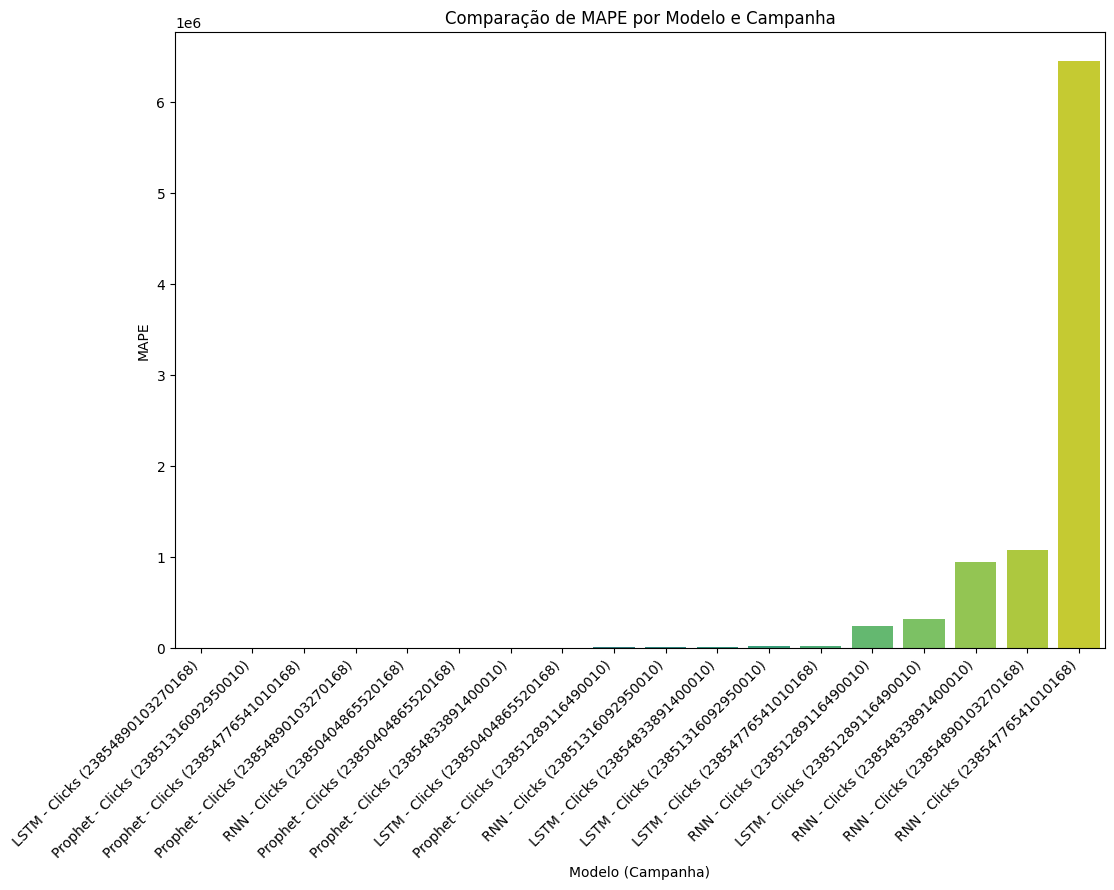

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




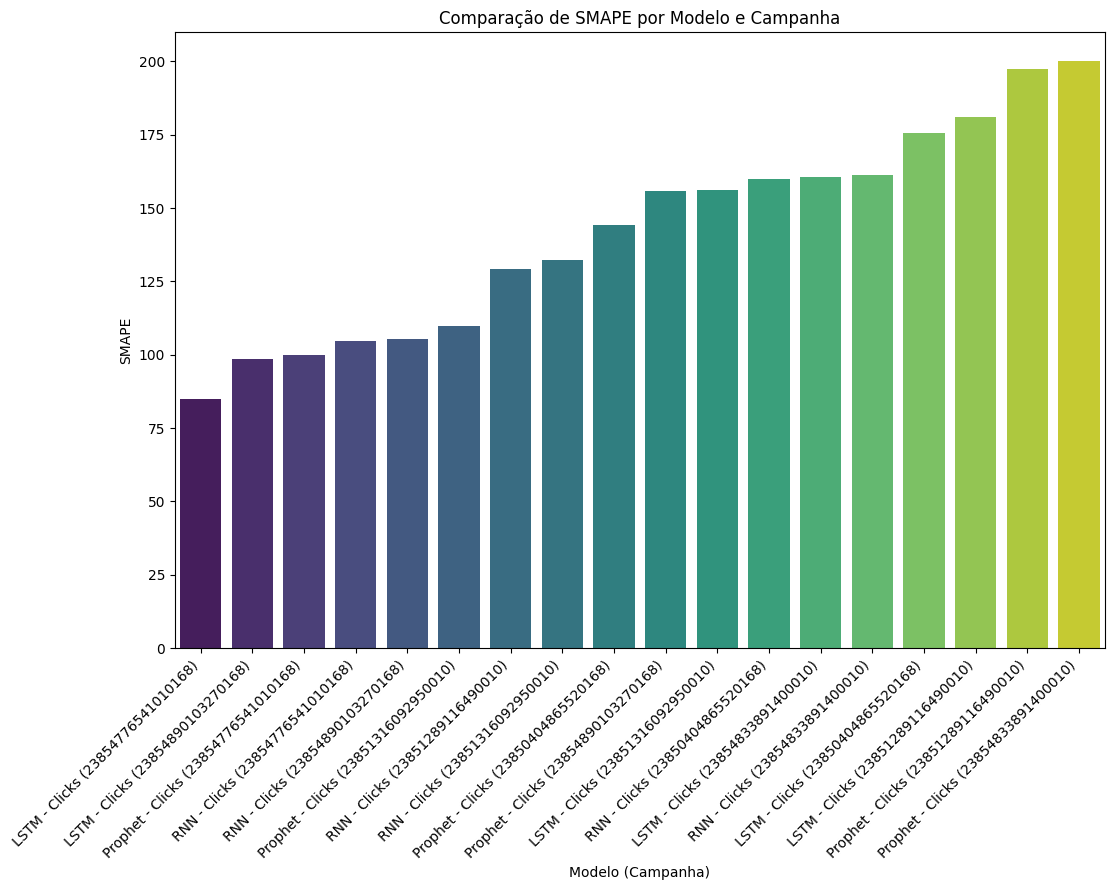

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




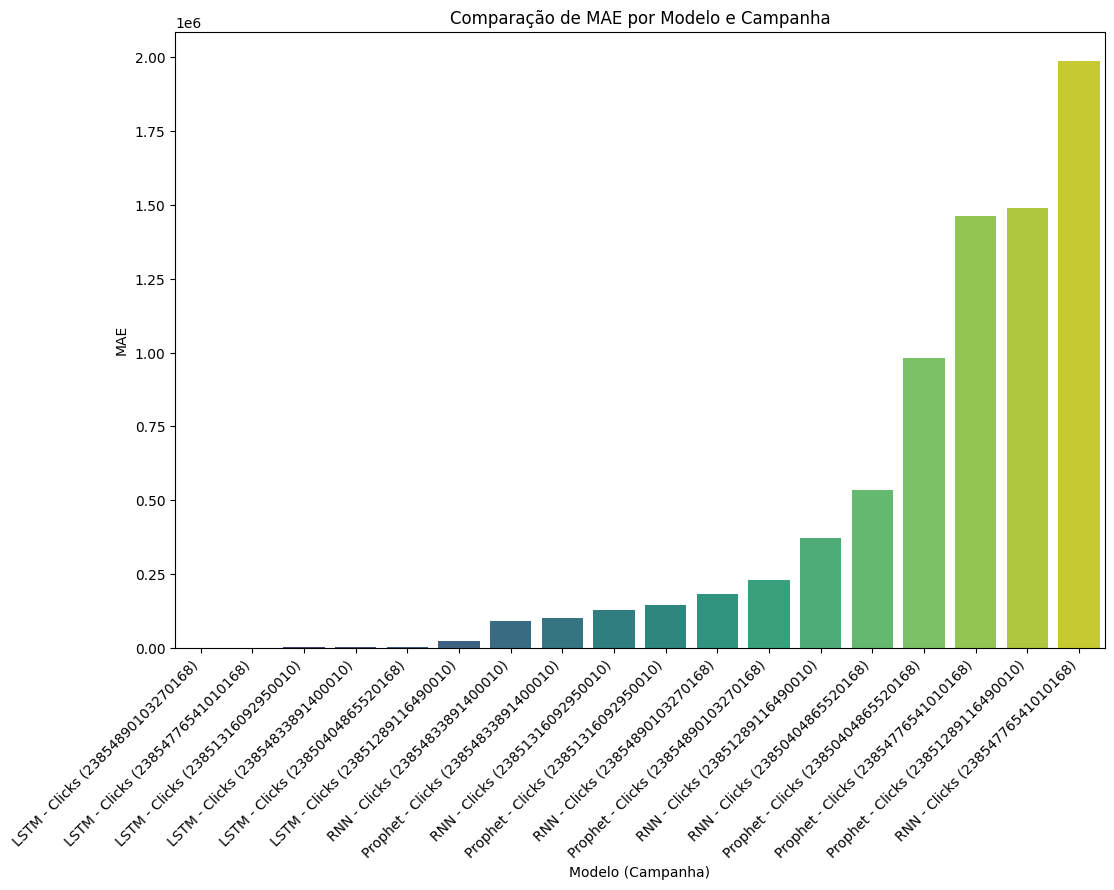

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




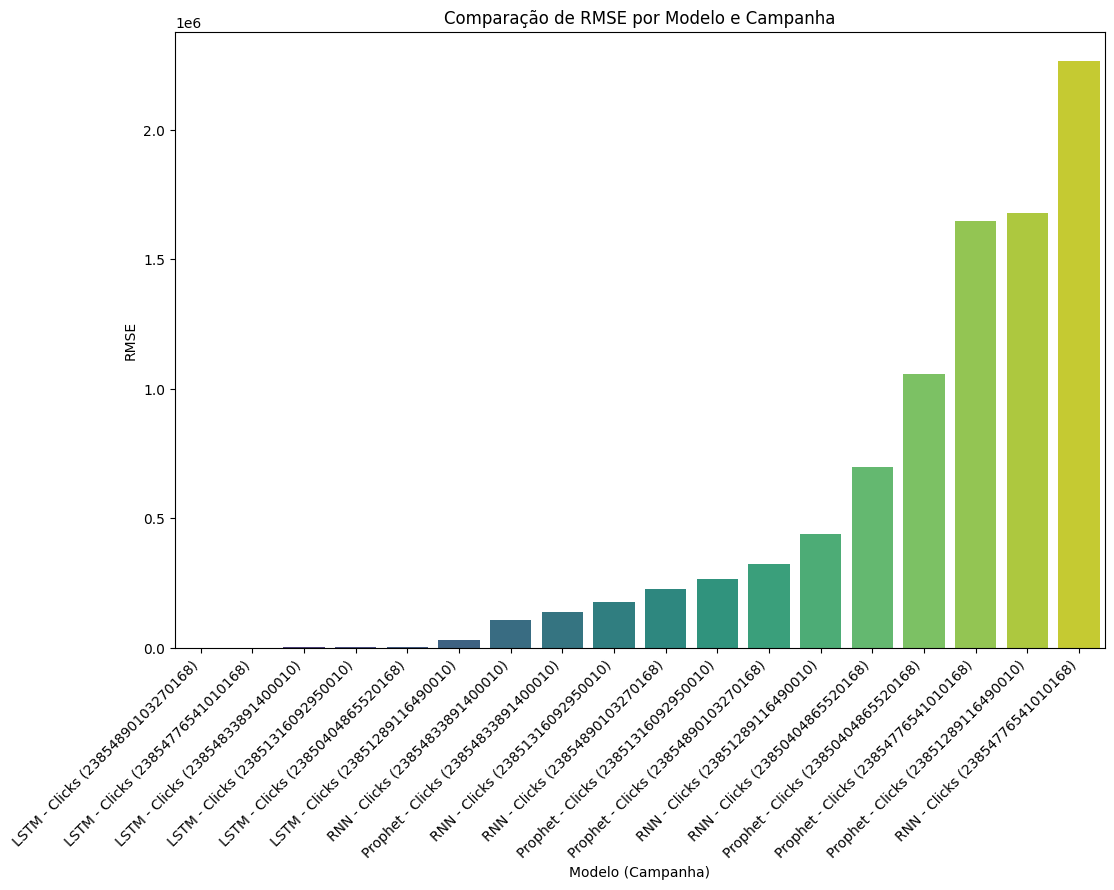

In [57]:
# Plotar todas métricas para CLICKS

plotar_barras(df_combined_clicks, 'MAPE')
plotar_barras(df_combined_clicks, 'SMAPE')
plotar_barras(df_combined_clicks, 'MAE')
plotar_barras(df_combined_clicks, 'RMSE')

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




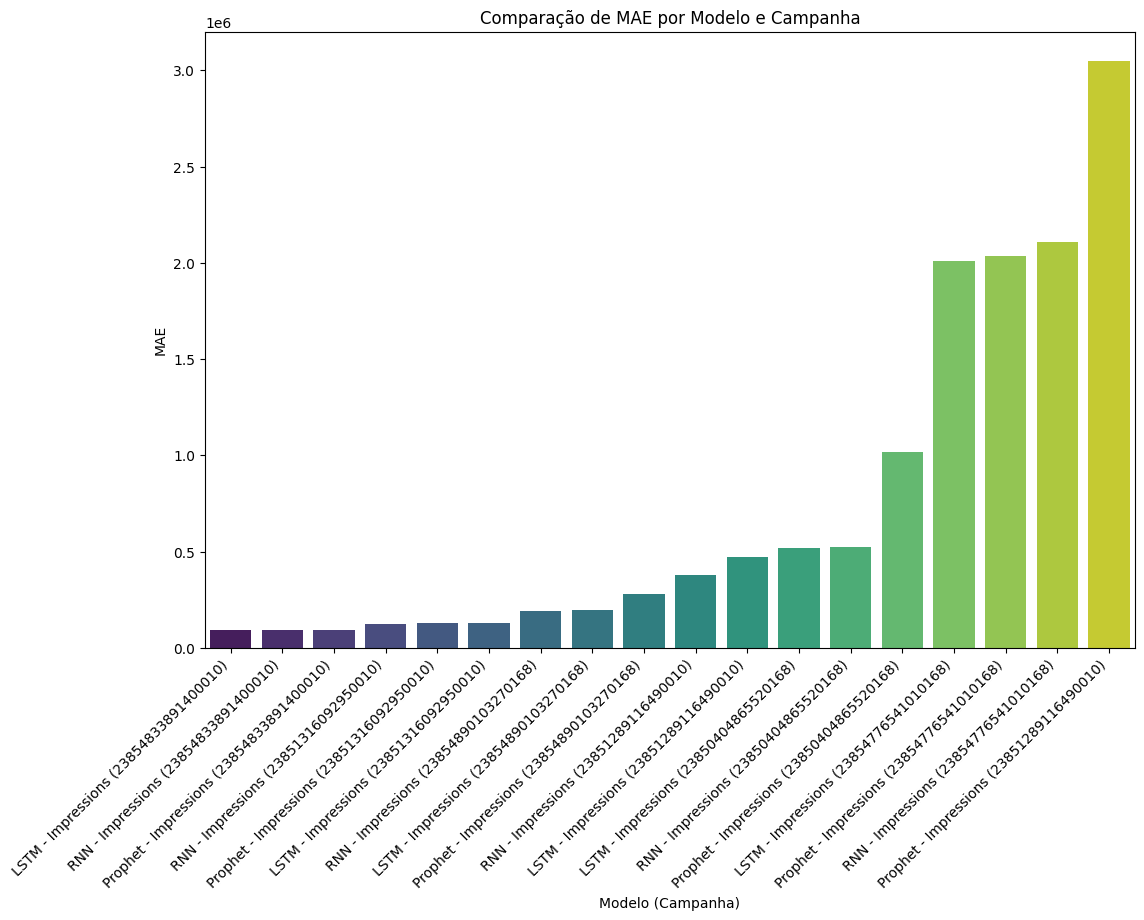

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




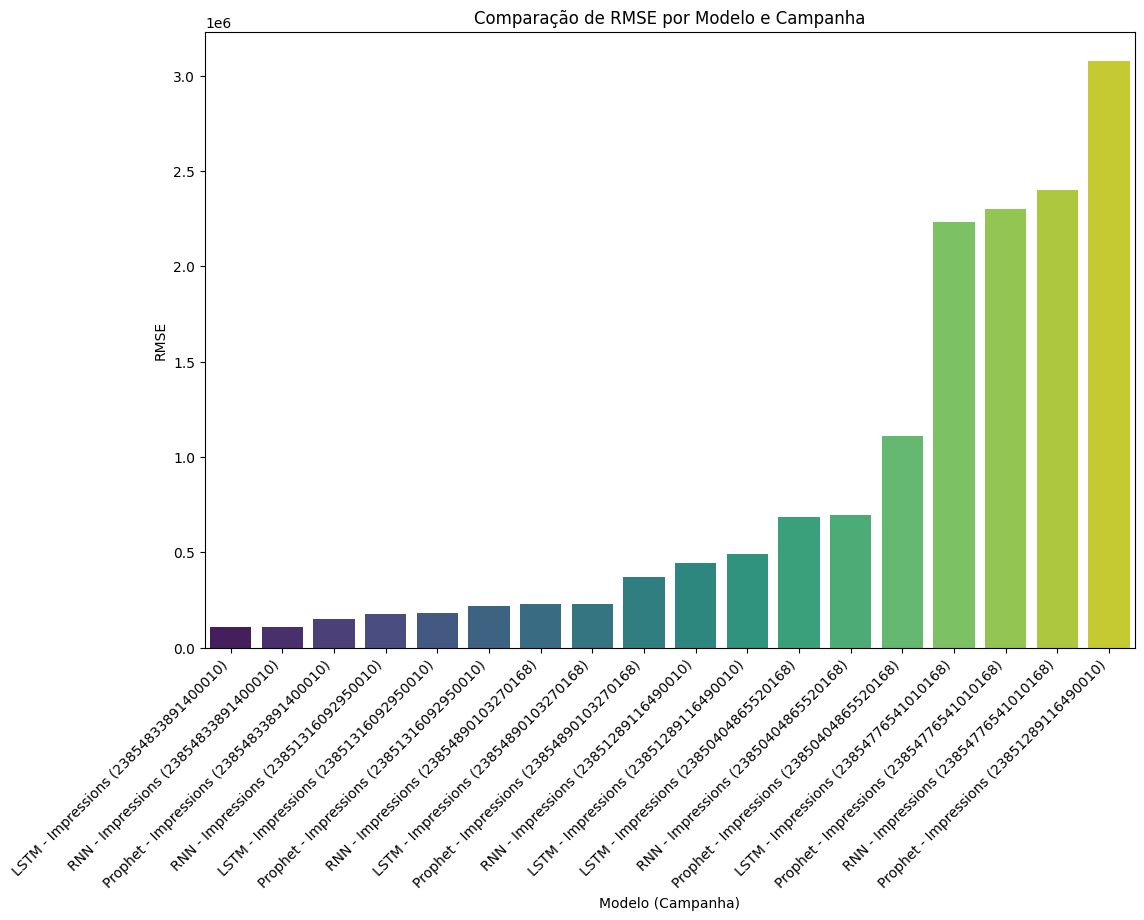

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




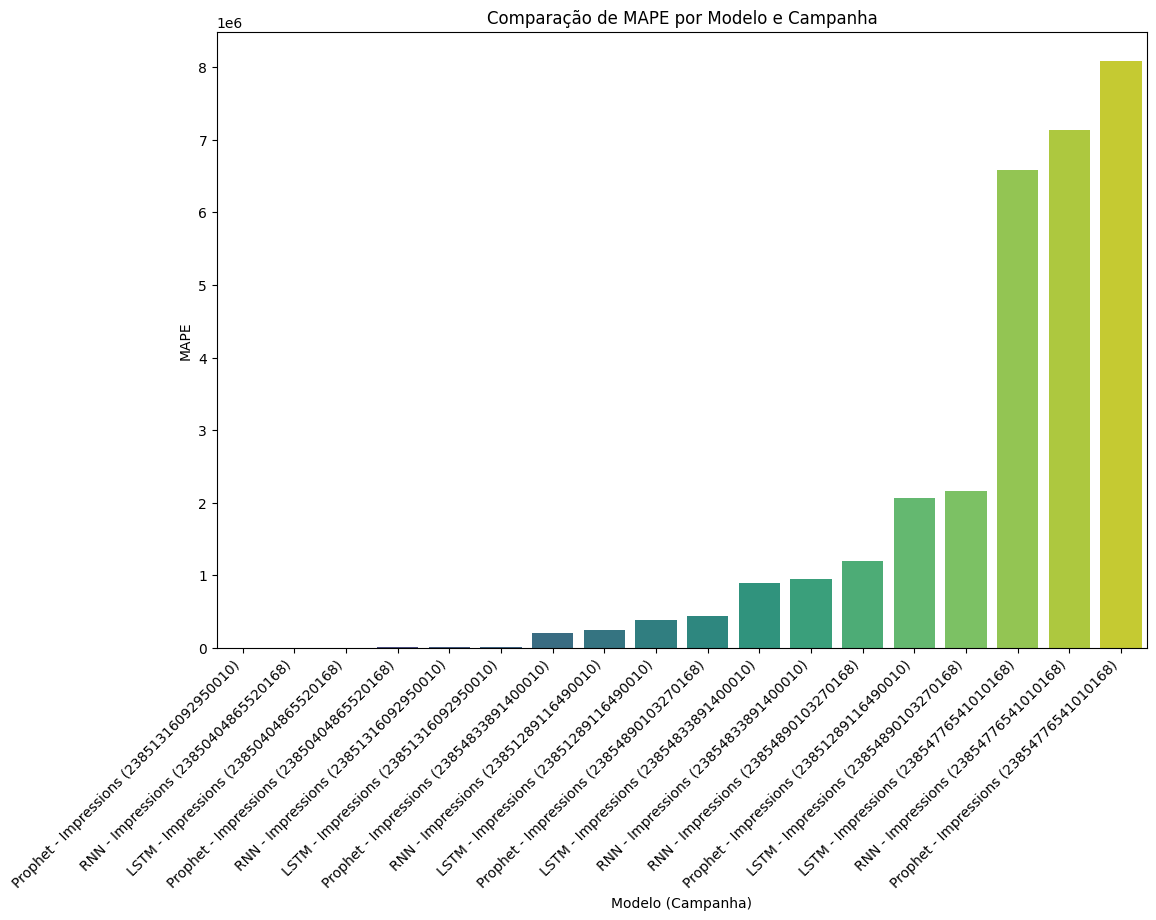

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




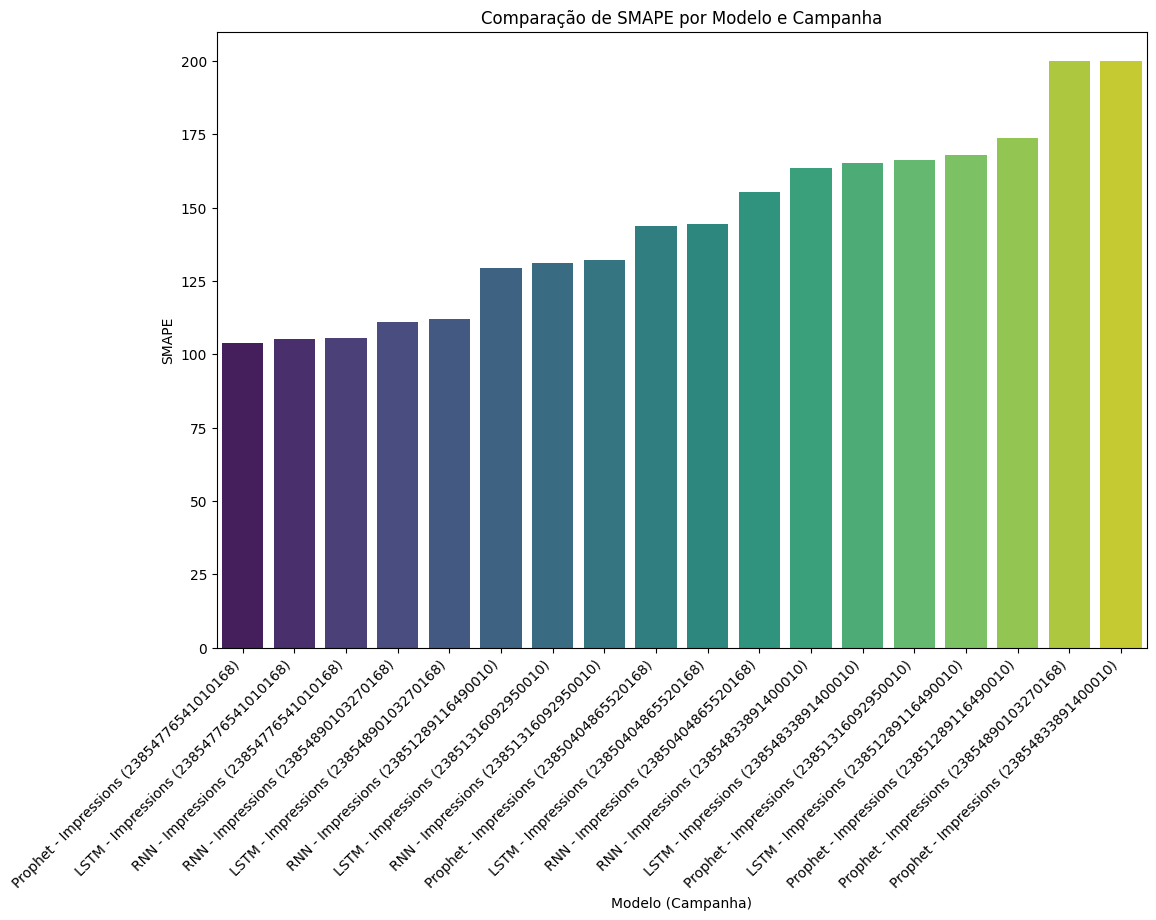

In [58]:
# Plotar todas as métricas para IMPRESSIONS
plotar_barras(df_combined_impressions, 'MAE')
plotar_barras(df_combined_impressions, 'RMSE')
plotar_barras(df_combined_impressions, 'MAPE')
plotar_barras(df_combined_impressions, 'SMAPE')

# Pelos gráficos é possível ver que a campanha 6 (ID 23854833891400010) obteve as melhores métricas, então a partir dela...

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



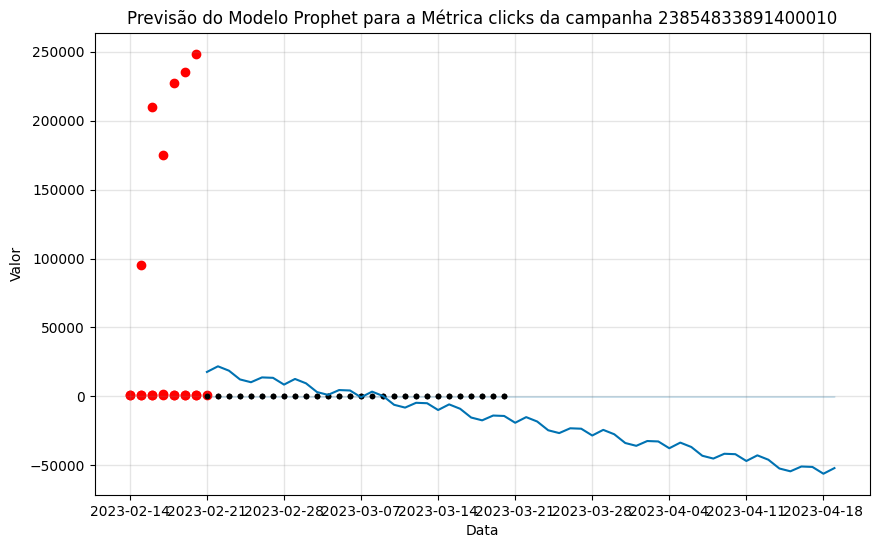

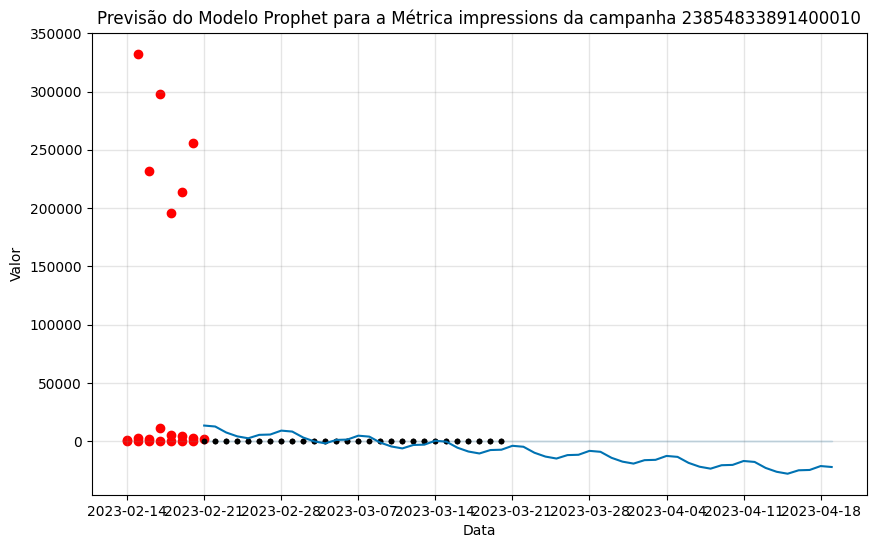

In [59]:
# PREVISOES MODELO PROPHET

plotar_previsoes(forecast_clicks_norm_prophet, dados_teste_clicks_norm_prophet, 'clicks', campanha_especifica, modelo_prophet_clicks_norm)
plotar_previsoes(forecast_impressions_norm_prophet, dados_teste_impressions_norm_prophet, 'impressions', campanha_especifica, modelo_prophet_impressions_norm)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



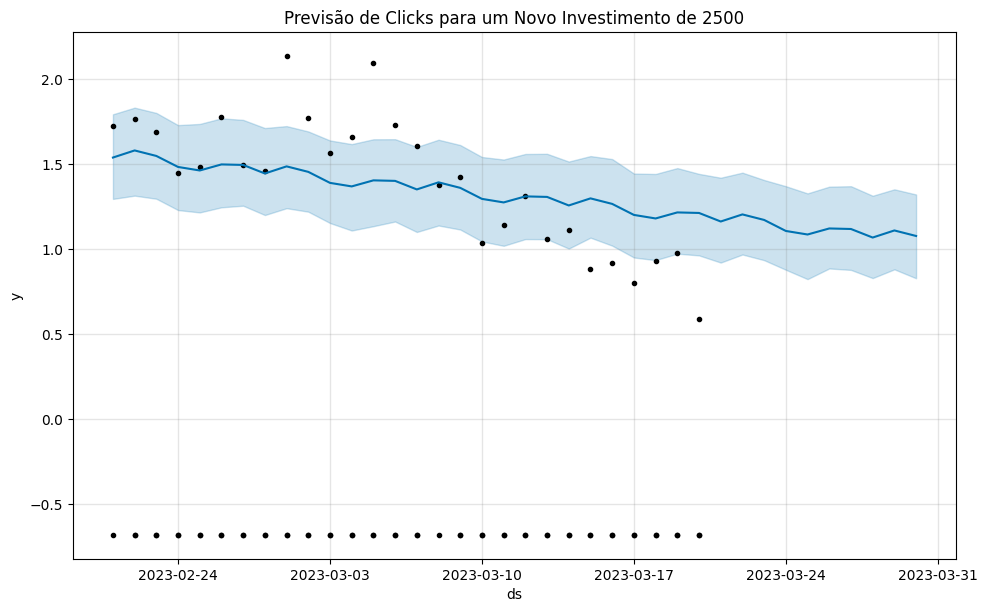

In [60]:
# Supondo que você quer prever as métricas para um novo investimento

novo_investimento = 2500
future = modelo_prophet_clicks_norm.make_future_dataframe(periods=10)
future['investment'] = novo_investimento
forecast_novo_investimento = modelo_prophet_clicks_norm.predict(future)

fig = modelo_prophet_clicks_norm.plot(forecast_novo_investimento)
plt.title(f'Previsão de Clicks para um Novo Investimento de {novo_investimento}')
plt.show()

Plotagem bem-sucedida!


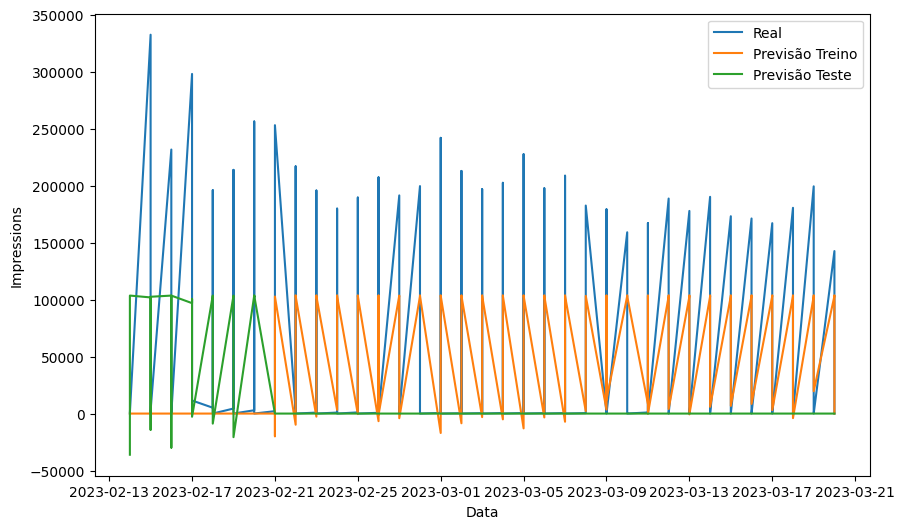

In [61]:
plotar_previsoes_rnn(dfpv, campanha_especifica, 'impressions', predict_treino_rnn_impressions, predict_teste_rnn_impressions)


# Recortando as Sequências do DF com maiores recorrências de valores da métrica de interesse sendo > 0 consecutivamente

In [62]:
df_seq = df.copy()
df_seq['day'] = pd.to_datetime(df_seq['day'])
#df_seq.set_index('day', inplace=True)

metrica = 'impressions'

# Ordena o DataFrame pela coluna 'day' em ordem crescente
df_seq = df_seq.sort_values(by='day').reset_index(drop=True)

df_seq.loc[:, df_seq.columns.isin(['day','impressions'])]

impressions        day
0            78080 2021-01-01
1            55585 2021-01-01
2           359317 2021-01-01
3          1035188 2021-01-01
4          1455170 2021-01-01
...            ...        ...
10339       465984 2023-11-30
10340       876776 2023-11-30
10341       846202 2023-11-30
10342       434631 2023-11-30
10343       260447 2023-11-30

[10344 rows x 2 columns]

In [63]:
# Inicializa listas para armazenar os resultados
subgroup_sizes = []
subgroup_days = []

# Inicializa variáveis para o subgrupo atual
current_subgroup_size = 0
current_subgroup_days = []

# Percorre as linhas do DataFrame
for day, metrica in zip(df_seq['day'], df_seq['impressions']):
    if pd.notna(metrica) and metrica != 0:
        # Se não for 0 ou nulo, incrementa o tamanho do subgrupo atual
        current_subgroup_size += 1
        current_subgroup_days.append(day)
    else:
        # Se encontrar 0 ou nulo, armazena o subgrupo atual e reinicia
        if current_subgroup_size > 0:
            subgroup_sizes.append(current_subgroup_size)
            subgroup_days.append(current_subgroup_days)

        current_subgroup_size = 0
        current_subgroup_days = []

# Adiciona o último subgrupo, se necessário
if current_subgroup_size > 0:
    subgroup_sizes.append(current_subgroup_size)
    subgroup_days.append(current_subgroup_days)

# Cria um DataFrame com os resultados
subgroups_df = pd.DataFrame({
    'subgroup_size': subgroup_sizes,
    'days': subgroup_days
})

# Classifica pelo tamanho do subgrupo
subgroups_df = subgroups_df.sort_values(by='subgroup_size', ascending=False)

# Mostra os 5 maiores subgrupos
top_5_subgroups = subgroups_df.head(5)
print(top_5_subgroups)

#subgroups_df

     subgroup_size                                               days
18            1769  [2021-08-06 00:00:00, 2021-08-06 00:00:00, 202...
0              583  [2021-01-01 00:00:00, 2021-01-01 00:00:00, 202...
297            371  [2022-07-15 00:00:00, 2022-07-15 00:00:00, 202...
309            257  [2022-09-29 00:00:00, 2022-09-29 00:00:00, 202...
11             203  [2021-06-21 00:00:00, 2021-06-21 00:00:00, 202...


In [64]:

df_sorted = df_seq.sort_values(by=['campaign_id', 'day'])

all_sequences = []

# Iterando sobre cada campanha
for campaign_id, group in df_sorted.groupby('campaign_id'):
    # Inicializando uma lista temporária para armazenar as sequências válidas
    temp_sequence = []

    for _, row in group.iterrows():
        # Se a métrica não for zero/nula, adicionar à sequência temporária
        if row['impressions'] != 0 and pd.notnull(row['impressions']):
            temp_sequence.append(row)
        else:
            # Se encontrarmos um valor zero ou nulo, verificamos se temos uma sequência válida
            if len(temp_sequence) >= 7: # Sequencia minima de 7 dias
                # Armazenar a sequência junto com seu tamanho
                all_sequences.append((len(temp_sequence), temp_sequence))
            # Reiniciar a sequência temporária
            temp_sequence = []

    # Verificar a última sequência após o loop
    if len(temp_sequence) >= 7:
        all_sequences.append((len(temp_sequence), temp_sequence))

# Ordenando as sequências pelo tamanho (do maior para o menor)
all_sequences_sorted = sorted(all_sequences, key=lambda x: x[0], reverse=True)

sequencia1 = all_sequences_sorted[0]
sequencia2 = all_sequences_sorted[1]
sequencia3 = all_sequences_sorted[2]
sequencia4 = all_sequences_sorted[3]
sequencia5 = all_sequences_sorted[4]

# Selecionando as 5 maiores sequências
top_5_sequences = all_sequences_sorted[:5]

# Unindo as 5 maiores sequências em um DataFrame
df_top_sequences_impressions = pd.DataFrame([item for seq in top_5_sequences for item in seq[1]])

# Resetando o índice para o novo DataFrame
df_top_sequences_impressions.reset_index(drop=True, inplace=True)


#df_top_sequences.head()

sequencia1_impressions = pd.DataFrame(sequencia1[1])
sequencia2_impressions = pd.DataFrame(sequencia2[1])
sequencia3_impressions = pd.DataFrame(sequencia3[1])
sequencia4_impressions = pd.DataFrame(sequencia4[1])
sequencia5_impressions = pd.DataFrame(sequencia5[1])

#sequencia1.loc[:, sequencia1.columns.isin(['day','impressions', 'campaign_id'])]
#sequencia3.head()

In [65]:
all_sequences = []

# Iterando sobre cada campanha
for campaign_id, group in df_sorted.groupby('campaign_id'):
    # Inicializando uma lista temporária para armazenar as sequências válidas
    temp_sequence = []

    for _, row in group.iterrows():
        # Se a métrica não for zero/nula, adicionar à sequência temporária
        if row['clicks'] != 0 and pd.notnull(row['clicks']):
            temp_sequence.append(row)
        else:

            if len(temp_sequence) >= 7:  # Verifica se a sequência tem pelo menos 7 dias
                # Armazenar a sequência junto com seu tamanho
                all_sequences.append((len(temp_sequence), temp_sequence))
            # Reiniciar a sequência temporária
            temp_sequence = []

    # Verificar a última sequência após o loop
    if len(temp_sequence) >= 7:
        all_sequences.append((len(temp_sequence), temp_sequence))

# Ordenando as sequências pelo tamanho (do maior para o menor)
all_sequences_sorted = sorted(all_sequences, key=lambda x: x[0], reverse=True)

sequencia1 = all_sequences_sorted[0]
sequencia2 = all_sequences_sorted[1]
sequencia3 = all_sequences_sorted[2]
sequencia4 = all_sequences_sorted[3]
sequencia5 = all_sequences_sorted[4]

# Selecionando as 5 maiores sequências
top_5_sequences = all_sequences_sorted[:5]

# Unindo as 5 maiores sequências em um DataFrame
df_top_sequences_clicks = pd.DataFrame([item for seq in top_5_sequences for item in seq[1]])

# Resetando o índice para o novo DataFrame
df_top_sequences_clicks.reset_index(drop=True, inplace=True)

#df_top_sequences.head()

sequencia1_clicks = pd.DataFrame(sequencia1[1])
sequencia2_clicks = pd.DataFrame(sequencia2[1])
sequencia3_clicks = pd.DataFrame(sequencia3[1])
sequencia4_clicks = pd.DataFrame(sequencia4[1])
sequencia5_clicks = pd.DataFrame(sequencia5[1])

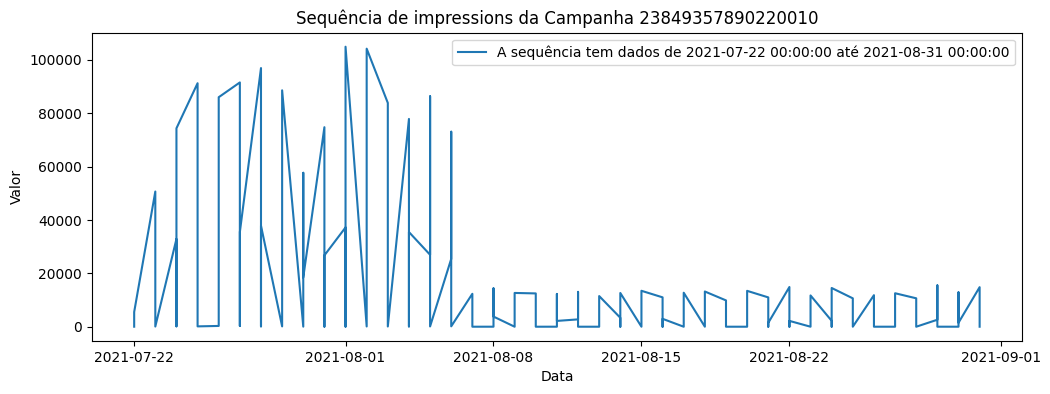

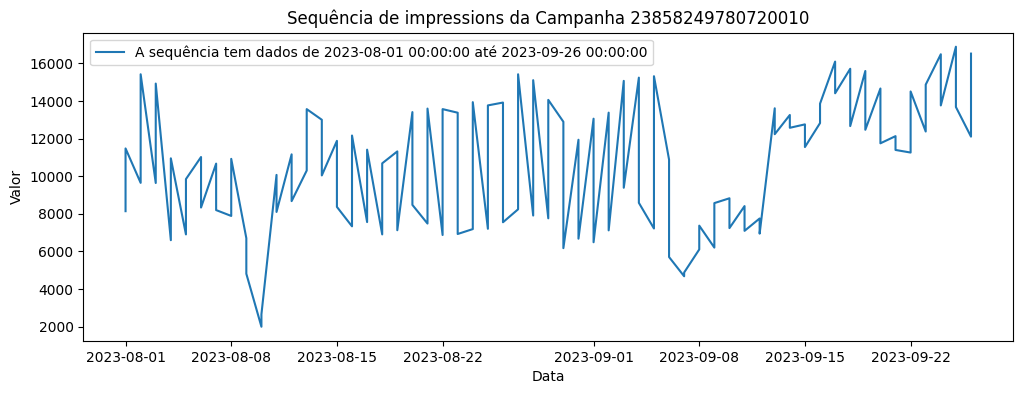

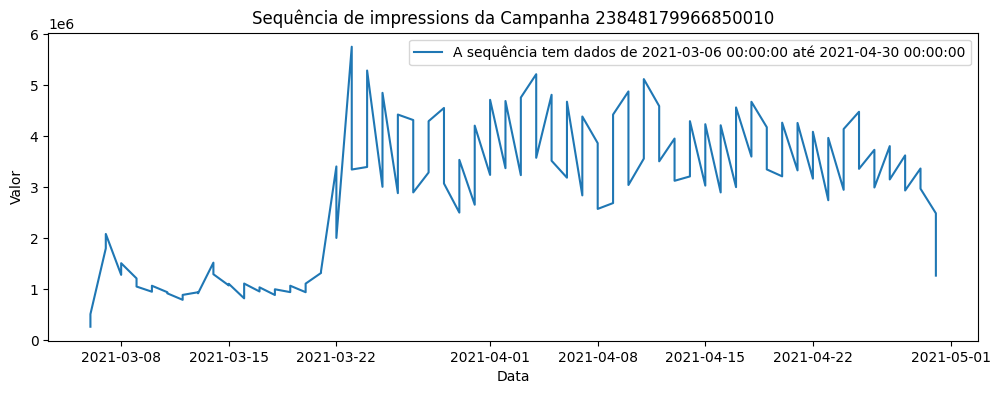

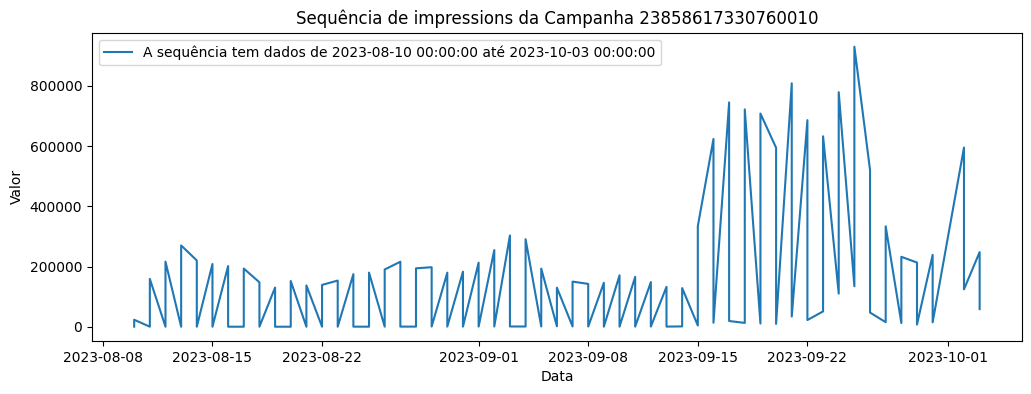

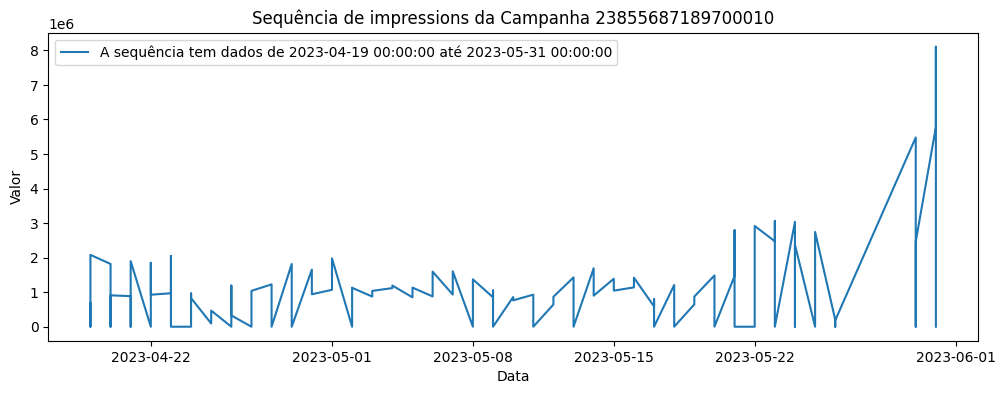

In [66]:
metrica = ['impressions']
plotar_metricas(sequencia1_impressions, sequencia1_impressions['campaign_id'].unique()[0], metrica, sequencia1_impressions['day'].min(), sequencia1_impressions['day'].max())
plotar_metricas(sequencia2_impressions, sequencia2_impressions['campaign_id'].unique()[0], metrica, sequencia2_impressions['day'].min(), sequencia2_impressions['day'].max())
plotar_metricas(sequencia3_impressions, sequencia3_impressions['campaign_id'].unique()[0], metrica, sequencia3_impressions['day'].min(), sequencia3_impressions['day'].max())
plotar_metricas(sequencia4_impressions, sequencia4_impressions['campaign_id'].unique()[0], metrica, sequencia4_impressions['day'].min(), sequencia4_impressions['day'].max())
plotar_metricas(sequencia5_impressions, sequencia5_impressions['campaign_id'].unique()[0], metrica, sequencia5_impressions['day'].min(), sequencia5_impressions['day'].max())

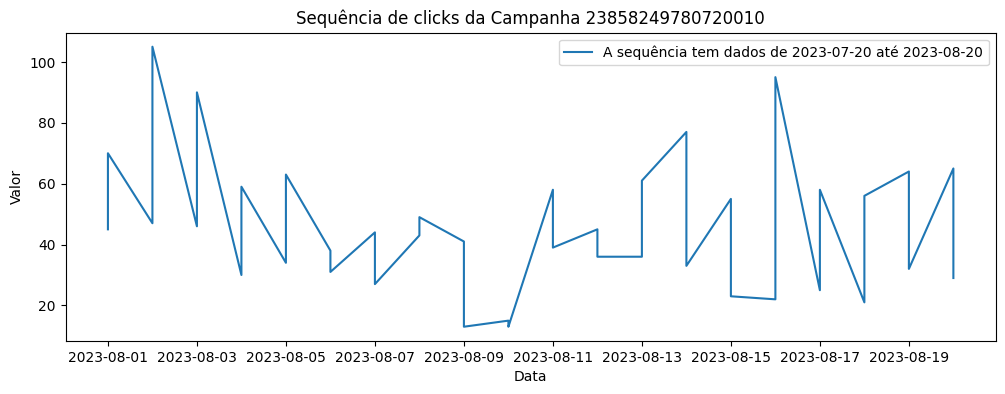

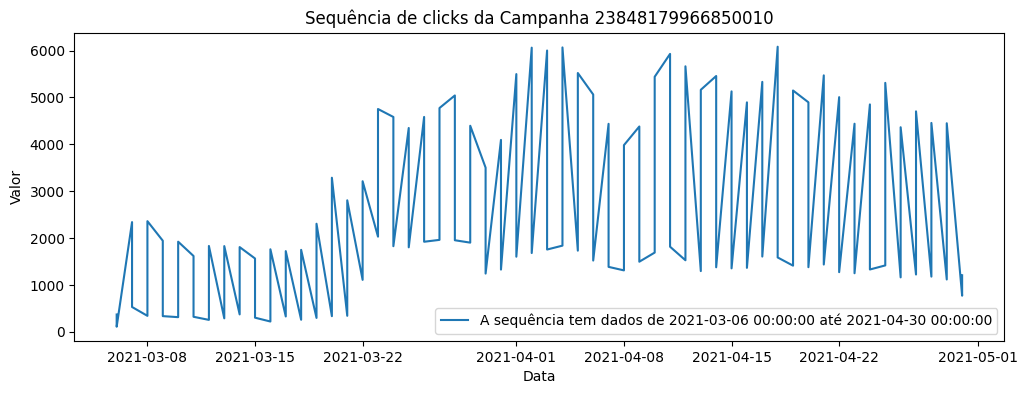

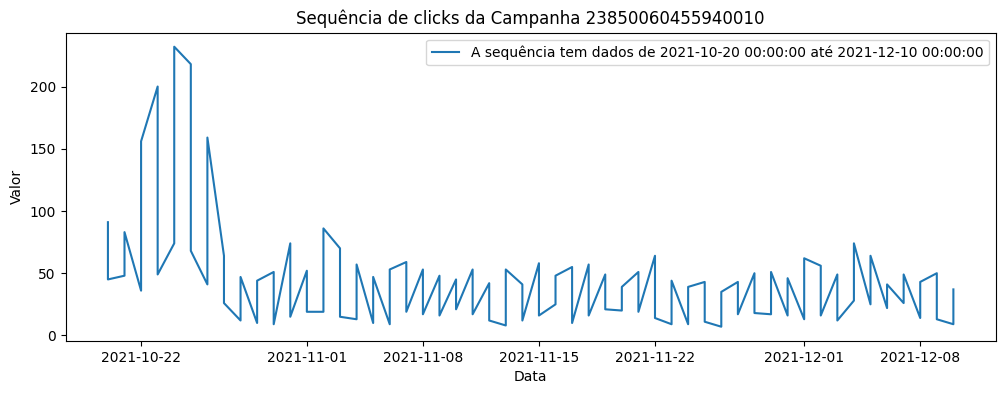

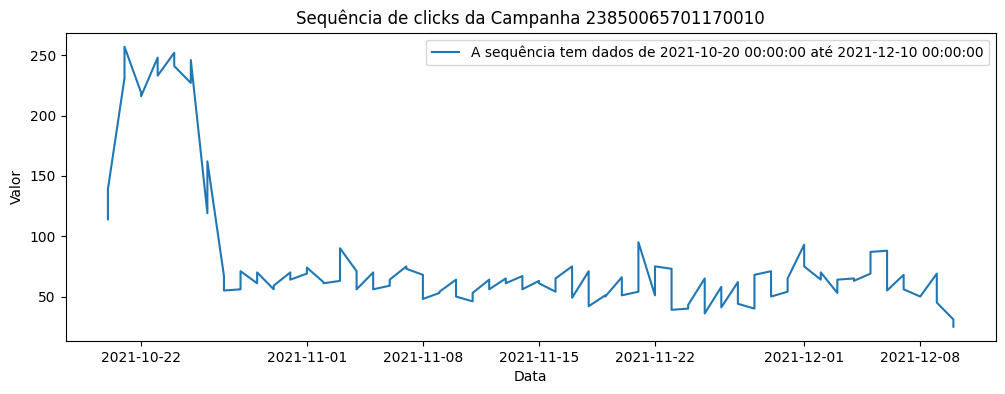

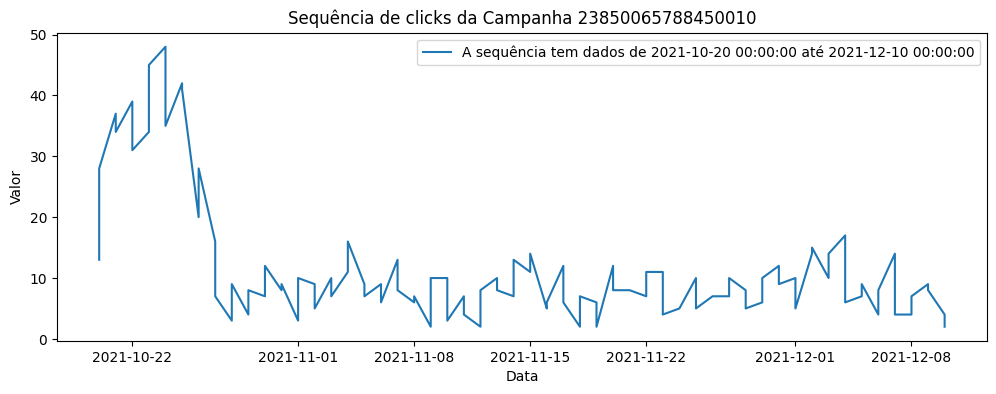

In [67]:
metrica = ['clicks']
plotar_metricas(sequencia1_clicks, sequencia1_clicks['campaign_id'].unique()[0], metrica, data_inicio, data_fim)
plotar_metricas(sequencia2_clicks, sequencia2_clicks['campaign_id'].unique()[0], metrica, sequencia2_clicks['day'].min(), sequencia2_clicks['day'].max())
plotar_metricas(sequencia3_clicks, sequencia3_clicks['campaign_id'].unique()[0], metrica, sequencia3_clicks['day'].min(), sequencia3_clicks['day'].max())
plotar_metricas(sequencia4_clicks, sequencia4_clicks['campaign_id'].unique()[0], metrica, sequencia4_clicks['day'].min(), sequencia4_clicks['day'].max())
plotar_metricas(sequencia5_clicks, sequencia5_clicks['campaign_id'].unique()[0], metrica, sequencia5_clicks['day'].min(), sequencia5_clicks['day'].max())

In [68]:
len(sequencia2_impressions['clicks'])

114

#Treinamento/Métricas SEQUÊNCIAS IMPRESSIONS

---



In [69]:
campanha_especifica = sequencia1_impressions['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_impressions_norm = preparar_dados_prophet(sequencia1_impressions, campanha_especifica, 'impressions')

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(sequencia1_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(sequencia1_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/ydfs1q8i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/vaiw3afx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34506', 'data', 'file=/tmp/tmpmgk4h_yg/ydfs1q8i.json', 'init=/tmp/tmpmgk4h_yg/vaiw3afx.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_model8_ef8wxn/prophet_model-20240902122300.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:23:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 - 3s - 35ms/step - loss: 0.0892
Epoch 2/20
96/96 - 0s - 3ms/step - loss: 0.0795
Epoch 3/20
96/96 - 0s - 3ms/step - loss: 0.0799
Epoch 4/20
96/96 - 0s - 3ms/step - loss: 0.0786
Epoch 5/20
96/96 - 0s - 2ms/step - loss: 0.0789
Epoch 6/20
96/96 - 0s - 3ms/step - loss: 0.0789
Epoch 7/20
96/96 - 0s - 3ms/step - loss: 0.0785
Epoch 8/20
96/96 - 0s - 3ms/step - loss: 0.0784
Epoch 9/20
96/96 - 0s - 2ms/step - loss: 0.0797
Epoch 10/20
96/96 - 0s - 2ms/step - loss: 0.0790
Epoch 11/20
96/96 - 0s - 2ms/step - loss: 0.0785
Epoch 12/20
96/96 - 0s - 2ms/step - loss: 0.0783
Epoch 13/20
96/96 - 0s - 2ms/step - loss: 0.0789
Epoch 14/20
96/96 - 0s - 2ms/step - loss: 0.0792
Epoch 15/20
96/96 - 0s - 3ms/step - loss: 0.0782
Epoch 16/20
96/96 - 0s - 3ms/step - loss: 0.0785
Epoch 17/20
96/96 - 0s - 2ms/step - loss: 0.0786
Epoch 18/20
96/96 - 0s - 3ms/step - loss: 0.0786
Epoch 19/20
96/96 - 0s - 2ms/step - loss: 0.0782
Epoch 20/20
96/96 - 0s - 2ms/step - loss: 0.0791
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



97/97 - 3s - 32ms/step - loss: 0.0879
Epoch 2/20
97/97 - 0s - 2ms/step - loss: 0.0776
Epoch 3/20
97/97 - 0s - 3ms/step - loss: 0.0778
Epoch 4/20
97/97 - 0s - 3ms/step - loss: 0.0776
Epoch 5/20
97/97 - 0s - 3ms/step - loss: 0.0773
Epoch 6/20
97/97 - 0s - 3ms/step - loss: 0.0777
Epoch 7/20
97/97 - 0s - 3ms/step - loss: 0.0794
Epoch 8/20
97/97 - 0s - 3ms/step - loss: 0.0773
Epoch 9/20
97/97 - 0s - 2ms/step - loss: 0.0773
Epoch 10/20
97/97 - 0s - 2ms/step - loss: 0.0778
Epoch 11/20
97/97 - 0s - 2ms/step - loss: 0.0769
Epoch 12/20
97/97 - 0s - 3ms/step - loss: 0.0777
Epoch 13/20
97/97 - 0s - 2ms/step - loss: 0.0780
Epoch 14/20
97/97 - 0s - 3ms/step - loss: 0.0783
Epoch 15/20
97/97 - 0s - 3ms/step - loss: 0.0775
Epoch 16/20
97/97 - 0s - 2ms/step - loss: 0.0775
Epoch 17/20
97/97 - 0s - 2ms/step - loss: 0.0775
Epoch 18/20
97/97 - 0s - 3ms/step - loss: 0.0777
Epoch 19/20
97/97 - 0s - 2ms/step - loss: 0.0780
Epoch 20/20
97/97 - 0s - 2ms/step - loss: 0.0774
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_24 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_25 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [70]:

y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values

y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()

y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_impressions_seq1 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

df_impressions_seq1

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Campanha                 Modelo Metrica         Valor
0   23849357890220010  Prophet - Impressions    MAPE  25692.284676
1   23849357890220010  Prophet - Impressions   SMAPE    200.000000
2   23849357890220010  Prophet - Impressions     MAE  10536.164626
3   23849357890220010  Prophet - Impressions    RMSE  12343.023489
4   23849357890220010     LSTM - Impressions    MAPE  71052.366005
5   23849357890220010     LSTM - Impressions   SMAPE    127.473799
6   23849357890220010     LSTM - Impressions     MAE  13595.011855
7   23849357890220010     LSTM - Impressions    RMSE  14835.291025
8   23849357890220010      RNN - Impressions    MAPE  73125.964314
9   23849357890220010      RNN - Impressions   SMAPE    125.032529
10  23849357890220010      RNN - Impressions     MAE  12113.834434
11  23849357890220010      RNN - Impressions    RMSE  13546.008617

In [71]:
campanha_especifica = sequencia2_impressions['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_impressions_norm = preparar_dados_prophet(sequencia2_impressions, campanha_especifica, 'impressions')

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(sequencia2_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(sequencia2_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/4vsqszj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/oc7lbbl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70510', 'data', 'file=/tmp/tmpmgk4h_yg/4vsqszj_.json', 'init=/tmp/tmpmgk4h_yg/oc7lbbl4.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_model3s10_7a6/prophet_model-20240902122319.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:23:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



89/89 - 2s - 28ms/step - loss: 0.1319
Epoch 2/20
89/89 - 0s - 3ms/step - loss: 0.0511
Epoch 3/20
89/89 - 0s - 4ms/step - loss: 0.0506
Epoch 4/20
89/89 - 0s - 3ms/step - loss: 0.0505
Epoch 5/20
89/89 - 0s - 2ms/step - loss: 0.0491
Epoch 6/20
89/89 - 0s - 3ms/step - loss: 0.0481
Epoch 7/20
89/89 - 0s - 4ms/step - loss: 0.0513
Epoch 8/20
89/89 - 0s - 3ms/step - loss: 0.0498
Epoch 9/20
89/89 - 0s - 3ms/step - loss: 0.0491
Epoch 10/20
89/89 - 0s - 3ms/step - loss: 0.0476
Epoch 11/20
89/89 - 0s - 3ms/step - loss: 0.0476
Epoch 12/20
89/89 - 0s - 3ms/step - loss: 0.0479
Epoch 13/20
89/89 - 0s - 3ms/step - loss: 0.0484
Epoch 14/20
89/89 - 0s - 3ms/step - loss: 0.0476
Epoch 15/20
89/89 - 0s - 3ms/step - loss: 0.0469
Epoch 16/20
89/89 - 0s - 3ms/step - loss: 0.0472
Epoch 17/20
89/89 - 0s - 3ms/step - loss: 0.0464
Epoch 18/20
89/89 - 0s - 3ms/step - loss: 0.0475
Epoch 19/20
89/89 - 0s - 2ms/step - loss: 0.0474
Epoch 20/20
89/89 - 0s - 2ms/step - loss: 0.0469
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



90/90 - 2s - 23ms/step - loss: 0.0611
Epoch 2/20
90/90 - 0s - 2ms/step - loss: 0.0504
Epoch 3/20
90/90 - 0s - 2ms/step - loss: 0.0489
Epoch 4/20
90/90 - 0s - 3ms/step - loss: 0.0473
Epoch 5/20
90/90 - 0s - 3ms/step - loss: 0.0470
Epoch 6/20
90/90 - 0s - 3ms/step - loss: 0.0445
Epoch 7/20
90/90 - 0s - 2ms/step - loss: 0.0470
Epoch 8/20
90/90 - 0s - 3ms/step - loss: 0.0458
Epoch 9/20
90/90 - 0s - 2ms/step - loss: 0.0449
Epoch 10/20
90/90 - 0s - 2ms/step - loss: 0.0451
Epoch 11/20
90/90 - 0s - 3ms/step - loss: 0.0448
Epoch 12/20
90/90 - 0s - 2ms/step - loss: 0.0452
Epoch 13/20
90/90 - 0s - 2ms/step - loss: 0.0445
Epoch 14/20
90/90 - 0s - 3ms/step - loss: 0.0460
Epoch 15/20
90/90 - 0s - 2ms/step - loss: 0.0443
Epoch 16/20
90/90 - 0s - 2ms/step - loss: 0.0448
Epoch 17/20
90/90 - 0s - 3ms/step - loss: 0.0451
Epoch 18/20
90/90 - 0s - 3ms/step - loss: 0.0445
Epoch 19/20
90/90 - 0s - 3ms/step - loss: 0.0449
Epoch 20/20
90/90 - 0s - 2ms/step - loss: 0.0445
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_26 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_27 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [72]:

y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values

y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()

y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_impressions_seq2 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

df_impressions_seq2

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Campanha                 Modelo Metrica        Valor
0   23858249780720010  Prophet - Impressions    MAPE    29.486922
1   23858249780720010  Prophet - Impressions   SMAPE    24.777028
2   23858249780720010  Prophet - Impressions     MAE  3790.822624
3   23858249780720010  Prophet - Impressions    RMSE  4210.349942
4   23858249780720010     LSTM - Impressions    MAPE    28.007815
5   23858249780720010     LSTM - Impressions   SMAPE    33.161290
6   23858249780720010     LSTM - Impressions     MAE  3967.410116
7   23858249780720010     LSTM - Impressions    RMSE  4309.518902
8   23858249780720010      RNN - Impressions    MAPE    32.786041
9   23858249780720010      RNN - Impressions   SMAPE    39.875924
10  23858249780720010      RNN - Impressions     MAE  4680.431975
11  23858249780720010      RNN - Impressions    RMSE  5011.022041

In [73]:
campanha_especifica = sequencia3_impressions['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_impressions_norm = preparar_dados_prophet(sequencia3_impressions, campanha_especifica, 'impressions')

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(sequencia3_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(sequencia3_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/6nn8gv5h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/vwzz3gqm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24688', 'data', 'file=/tmp/tmpmgk4h_yg/6nn8gv5h.json', 'init=/tmp/tmpmgk4h_yg/vwzz3gqm.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelzv4qms3a/prophet_model-20240902122336.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:23:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-14-ba1d47f38a71>:22: Set

Epoch 1/20
88/88 - 3s - 38ms/step - loss: 0.1391
Epoch 2/20
88/88 - 0s - 4ms/step - loss: 0.0456
Epoch 3/20
88/88 - 0s - 5ms/step - loss: 0.0404
Epoch 4/20
88/88 - 0s - 3ms/step - loss: 0.0407
Epoch 5/20
88/88 - 0s - 3ms/step - loss: 0.0398
Epoch 6/20
88/88 - 0s - 3ms/step - loss: 0.0386
Epoch 7/20
88/88 - 0s - 2ms/step - loss: 0.0398
Epoch 8/20
88/88 - 0s - 2ms/step - loss: 0.0400
Epoch 9/20
88/88 - 0s - 2ms/step - loss: 0.0380
Epoch 10/20
88/88 - 0s - 4ms/step - loss: 0.0384
Epoch 11/20
88/88 - 0s - 3ms/step - loss: 0.0378
Epoch 12/20
88/88 - 0s - 2ms/step - loss: 0.0385
Epoch 13/20
88/88 - 0s - 3ms/step - loss: 0.0384
Epoch 14/20
88/88 - 0s - 4ms/step - loss: 0.0373
Epoch 15/20
88/88 - 0s - 3ms/step - loss: 0.0379
Epoch 16/20
88/88 - 0s - 3ms/step - loss: 0.0382
Epoch 17/20
88/88 - 0s - 3ms/step - loss: 0.0353
Epoch 18/20
88/88 - 0s - 3ms/step - loss: 0.0386
Epoch 19/20
88/88 - 0s - 2ms/step - loss: 0.0347
Epoch 20/20
88/88 - 0s - 2ms/step - loss: 0.0368
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



88/88 - 2s - 24ms/step - loss: 0.1591
Epoch 2/20
88/88 - 0s - 2ms/step - loss: 0.0476
Epoch 3/20
88/88 - 0s - 3ms/step - loss: 0.0419
Epoch 4/20
88/88 - 0s - 4ms/step - loss: 0.0384
Epoch 5/20
88/88 - 0s - 2ms/step - loss: 0.0360
Epoch 6/20
88/88 - 0s - 2ms/step - loss: 0.0353
Epoch 7/20
88/88 - 0s - 3ms/step - loss: 0.0336
Epoch 8/20
88/88 - 0s - 3ms/step - loss: 0.0341
Epoch 9/20
88/88 - 0s - 2ms/step - loss: 0.0336
Epoch 10/20
88/88 - 0s - 2ms/step - loss: 0.0333
Epoch 11/20
88/88 - 0s - 2ms/step - loss: 0.0330
Epoch 12/20
88/88 - 0s - 2ms/step - loss: 0.0331
Epoch 13/20
88/88 - 0s - 3ms/step - loss: 0.0340
Epoch 14/20
88/88 - 0s - 3ms/step - loss: 0.0340
Epoch 15/20
88/88 - 0s - 3ms/step - loss: 0.0330
Epoch 16/20
88/88 - 0s - 3ms/step - loss: 0.0345
Epoch 17/20
88/88 - 0s - 4ms/step - loss: 0.0324
Epoch 18/20
88/88 - 0s - 3ms/step - loss: 0.0328
Epoch 19/20
88/88 - 0s - 3ms/step - loss: 0.0338
Epoch 20/20
88/88 - 0s - 3ms/step - loss: 0.0325
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_28 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_29 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [74]:

y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values

y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()

y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_impressions_seq3 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

df_impressions_seq3

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Campanha                 Modelo Metrica         Valor
0   23848179966850010  Prophet - Impressions    MAPE  6.703248e+01
1   23848179966850010  Prophet - Impressions   SMAPE  1.027076e+02
2   23848179966850010  Prophet - Impressions     MAE  2.330663e+06
3   23848179966850010  Prophet - Impressions    RMSE  2.439435e+06
4   23848179966850010     LSTM - Impressions    MAPE  1.891119e+01
5   23848179966850010     LSTM - Impressions   SMAPE  1.902365e+01
6   23848179966850010     LSTM - Impressions     MAE  6.594355e+05
7   23848179966850010     LSTM - Impressions    RMSE  7.148255e+05
8   23848179966850010      RNN - Impressions    MAPE  2.300398e+01
9   23848179966850010      RNN - Impressions   SMAPE  2.121154e+01
10  23848179966850010      RNN - Impressions     MAE  6.895501e+05
11  23848179966850010      RNN - Impressions    RMSE  7.530642e+05

In [75]:
campanha_especifica = sequencia4_impressions['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_impressions_norm = preparar_dados_prophet(sequencia4_impressions, campanha_especifica, 'impressions')

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(sequencia4_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(sequencia4_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/ilad26mb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/05nrnds9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50075', 'data', 'file=/tmp/tmpmgk4h_yg/ilad26mb.json', 'init=/tmp/tmpmgk4h_yg/05nrnds9.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelqkpc4x82/prophet_model-20240902122354.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



84/84 - 3s - 30ms/step - loss: 0.0453
Epoch 2/20
84/84 - 0s - 4ms/step - loss: 0.0404
Epoch 3/20
84/84 - 0s - 4ms/step - loss: 0.0405
Epoch 4/20
84/84 - 0s - 4ms/step - loss: 0.0400
Epoch 5/20
84/84 - 0s - 4ms/step - loss: 0.0398
Epoch 6/20
84/84 - 0s - 4ms/step - loss: 0.0396
Epoch 7/20
84/84 - 0s - 2ms/step - loss: 0.0397
Epoch 8/20
84/84 - 0s - 4ms/step - loss: 0.0397
Epoch 9/20
84/84 - 0s - 2ms/step - loss: 0.0394
Epoch 10/20
84/84 - 0s - 2ms/step - loss: 0.0390
Epoch 11/20
84/84 - 0s - 4ms/step - loss: 0.0394
Epoch 12/20
84/84 - 0s - 2ms/step - loss: 0.0394
Epoch 13/20
84/84 - 0s - 2ms/step - loss: 0.0387
Epoch 14/20
84/84 - 0s - 2ms/step - loss: 0.0387
Epoch 15/20
84/84 - 0s - 4ms/step - loss: 0.0394
Epoch 16/20
84/84 - 0s - 2ms/step - loss: 0.0389
Epoch 17/20
84/84 - 0s - 4ms/step - loss: 0.0388
Epoch 18/20
84/84 - 0s - 4ms/step - loss: 0.0393
Epoch 19/20
84/84 - 0s - 2ms/step - loss: 0.0390
Epoch 20/20
84/84 - 0s - 2ms/step - loss: 0.0391
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



85/85 - 3s - 33ms/step - loss: 0.0453
Epoch 2/20
85/85 - 0s - 3ms/step - loss: 0.0401
Epoch 3/20
85/85 - 0s - 4ms/step - loss: 0.0397
Epoch 4/20
85/85 - 0s - 4ms/step - loss: 0.0393
Epoch 5/20
85/85 - 0s - 3ms/step - loss: 0.0390
Epoch 6/20
85/85 - 0s - 3ms/step - loss: 0.0389
Epoch 7/20
85/85 - 0s - 2ms/step - loss: 0.0393
Epoch 8/20
85/85 - 0s - 2ms/step - loss: 0.0393
Epoch 9/20
85/85 - 0s - 2ms/step - loss: 0.0390
Epoch 10/20
85/85 - 0s - 3ms/step - loss: 0.0395
Epoch 11/20
85/85 - 0s - 2ms/step - loss: 0.0398
Epoch 12/20
85/85 - 0s - 4ms/step - loss: 0.0395
Epoch 13/20
85/85 - 0s - 3ms/step - loss: 0.0391
Epoch 14/20
85/85 - 0s - 4ms/step - loss: 0.0388
Epoch 15/20
85/85 - 0s - 2ms/step - loss: 0.0388
Epoch 16/20
85/85 - 0s - 4ms/step - loss: 0.0388
Epoch 17/20
85/85 - 0s - 3ms/step - loss: 0.0389
Epoch 18/20
85/85 - 0s - 2ms/step - loss: 0.0389
Epoch 19/20
85/85 - 0s - 2ms/step - loss: 0.0390
Epoch 20/20
85/85 - 0s - 2ms/step - loss: 0.0390
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_30 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_31 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [76]:

y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values

y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()

y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_impressions_seq4 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

df_impressions_seq4

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Campanha                 Modelo Metrica          Valor
0   23858617330760010  Prophet - Impressions    MAPE     144.479213
1   23858617330760010  Prophet - Impressions   SMAPE     117.244691
2   23858617330760010  Prophet - Impressions     MAE  239601.954191
3   23858617330760010  Prophet - Impressions    RMSE  353020.282127
4   23858617330760010     LSTM - Impressions    MAPE     245.474934
5   23858617330760010     LSTM - Impressions   SMAPE      99.208631
6   23858617330760010     LSTM - Impressions     MAE  211697.362925
7   23858617330760010     LSTM - Impressions    RMSE  306521.432213
8   23858617330760010      RNN - Impressions    MAPE     240.466723
9   23858617330760010      RNN - Impressions   SMAPE     105.769501
10  23858617330760010      RNN - Impressions     MAE  219335.920381
11  23858617330760010      RNN - Impressions    RMSE  313300.603339

In [77]:
campanha_especifica = sequencia5_impressions['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_impressions_norm = preparar_dados_prophet(sequencia5_impressions, campanha_especifica, 'impressions')

forecast_impressions_norm_prophet, dados_treino_impressions_norm_prophet, dados_teste_impressions_norm_prophet, modelo_prophet_impressions_norm = treinar_e_prever_prophet(dados_prophet_impressions_norm)
predict_treino_lstm_impressions, predict_teste_lstm_impressions, trainY_lstm_impressions, testY_lstm_impressions, model_lstm_impressions = treinar_e_prever_lstm(sequencia5_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20)
model_rnn_impressions, predict_treino_rnn_impressions, trainY_rnn_impressions, predict_teste_rnn_impressions, testY_rnn_impressions = treinar_e_prever_rnn(sequencia5_impressions, campanha_especifica, 'impressions', look_back=1, epochs=20, batch_size=1)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/btayw5gx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/qlh_ezpy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9938', 'data', 'file=/tmp/tmpmgk4h_yg/btayw5gx.json', 'init=/tmp/tmpmgk4h_yg/qlh_ezpy.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modellehqwfmo/prophet_model-20240902122411.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:24:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



83/83 - 3s - 30ms/step - loss: 0.0076
Epoch 2/20
83/83 - 0s - 4ms/step - loss: 0.0064
Epoch 3/20
83/83 - 0s - 4ms/step - loss: 0.0060
Epoch 4/20
83/83 - 0s - 2ms/step - loss: 0.0059
Epoch 5/20
83/83 - 0s - 4ms/step - loss: 0.0062
Epoch 6/20
83/83 - 0s - 4ms/step - loss: 0.0059
Epoch 7/20
83/83 - 0s - 2ms/step - loss: 0.0060
Epoch 8/20
83/83 - 0s - 4ms/step - loss: 0.0061
Epoch 9/20
83/83 - 0s - 4ms/step - loss: 0.0058
Epoch 10/20
83/83 - 0s - 2ms/step - loss: 0.0059
Epoch 11/20
83/83 - 0s - 2ms/step - loss: 0.0060
Epoch 12/20
83/83 - 0s - 4ms/step - loss: 0.0060
Epoch 13/20
83/83 - 0s - 4ms/step - loss: 0.0059
Epoch 14/20
83/83 - 0s - 4ms/step - loss: 0.0059
Epoch 15/20
83/83 - 0s - 4ms/step - loss: 0.0059
Epoch 16/20
83/83 - 0s - 3ms/step - loss: 0.0059
Epoch 17/20
83/83 - 0s - 4ms/step - loss: 0.0059
Epoch 18/20
83/83 - 0s - 3ms/step - loss: 0.0059
Epoch 19/20
83/83 - 0s - 3ms/step - loss: 0.0059
Epoch 20/20
83/83 - 0s - 4ms/step - loss: 0.0060
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



84/84 - 3s - 40ms/step - loss: 0.0352
Epoch 2/20
84/84 - 0s - 2ms/step - loss: 0.0120
Epoch 3/20
84/84 - 0s - 2ms/step - loss: 0.0099
Epoch 4/20
84/84 - 0s - 2ms/step - loss: 0.0079
Epoch 5/20
84/84 - 0s - 2ms/step - loss: 0.0071
Epoch 6/20
84/84 - 0s - 4ms/step - loss: 0.0064
Epoch 7/20
84/84 - 0s - 4ms/step - loss: 0.0061
Epoch 8/20
84/84 - 0s - 5ms/step - loss: 0.0060
Epoch 9/20
84/84 - 0s - 6ms/step - loss: 0.0059
Epoch 10/20
84/84 - 1s - 7ms/step - loss: 0.0059
Epoch 11/20
84/84 - 0s - 4ms/step - loss: 0.0058
Epoch 12/20
84/84 - 1s - 7ms/step - loss: 0.0059
Epoch 13/20
84/84 - 0s - 4ms/step - loss: 0.0060
Epoch 14/20
84/84 - 0s - 3ms/step - loss: 0.0059
Epoch 15/20
84/84 - 0s - 4ms/step - loss: 0.0059
Epoch 16/20
84/84 - 0s - 4ms/step - loss: 0.0059
Epoch 17/20
84/84 - 0s - 4ms/step - loss: 0.0058
Epoch 18/20
84/84 - 1s - 7ms/step - loss: 0.0059
Epoch 19/20
84/84 - 1s - 8ms/step - loss: 0.0058
Epoch 20/20
84/84 - 1s - 7ms/step - loss: 0.0059
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 619ms/step


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_32 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_33 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [78]:

y_true_impressions = dados_teste_impressions_norm_prophet['y'].values
y_pred_impressions = forecast_impressions_norm_prophet.iloc[-len(y_true_impressions):]['yhat'].values

y_true_lstm_impressions = testY_lstm_impressions.flatten()
y_pred_lstm_impressions = predict_teste_lstm_impressions.flatten()

y_true_rnn_impressions = testY_rnn_impressions.flatten()
y_pred_rnn_impressions = predict_teste_rnn_impressions.flatten()

mape_impressions, smape_impressions = calcular_mape_smape(y_true_impressions, y_pred_impressions)

mape_lstm_impressions, smape_lstm_impressions = calcular_mape_smape(y_true_lstm_impressions, y_pred_lstm_impressions)

mape_rnn_impressions, smape_rnn_impressions = calcular_mape_smape(y_true_rnn_impressions, y_pred_rnn_impressions)
##
mae_impressions_prophet, rmse_impressions_prophet = calcular_metricas_erro(y_true_impressions, y_pred_impressions)

mae_lstm_impressions, rmse_lstm_impressions = calcular_metricas_erro(y_true_lstm_impressions, y_pred_lstm_impressions)

mae_rnn_impressions, rmse_rnn_impressions = calcular_metricas_erro(y_true_rnn_impressions, y_pred_rnn_impressions)

resultados_impressions = [[mape_impressions, smape_impressions, mae_impressions_prophet, rmse_impressions_prophet], [mape_lstm_impressions, smape_lstm_impressions, mae_lstm_impressions, rmse_lstm_impressions], [mape_rnn_impressions, smape_rnn_impressions, mae_rnn_impressions, rmse_rnn_impressions]]

df_impressions_seq5 = adicionar_resultados(df_novo, campanha_especifica, modelos_impressions, metricas_impressions, resultados_impressions)

df_impressions_seq5

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Campanha                 Modelo Metrica         Valor
0   23855687189700010  Prophet - Impressions    MAPE  5.291151e+05
1   23855687189700010  Prophet - Impressions   SMAPE  2.000000e+02
2   23855687189700010  Prophet - Impressions     MAE  2.092239e+06
3   23855687189700010  Prophet - Impressions    RMSE  3.038255e+06
4   23855687189700010     LSTM - Impressions    MAPE  2.984953e+06
5   23855687189700010     LSTM - Impressions   SMAPE  1.436818e+02
6   23855687189700010     LSTM - Impressions     MAE  1.860482e+06
7   23855687189700010     LSTM - Impressions    RMSE  2.574359e+06
8   23855687189700010      RNN - Impressions    MAPE  1.897296e+06
9   23855687189700010      RNN - Impressions   SMAPE  1.473312e+02
10  23855687189700010      RNN - Impressions     MAE  1.872449e+06
11  23855687189700010      RNN - Impressions    RMSE  2.717944e+06

#Treinamento/Métricas SEQUÊNCIAS CLICKS

---



In [79]:
campanha_especifica = sequencia1_clicks['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_clicks_norm = preparar_dados_prophet(sequencia1_clicks, campanha_especifica, 'clicks')

forecast_clicks_norm_prophet, dados_treino_clicks_norm_prophet, dados_teste_clicks_norm_prophet, modelo_prophet_clicks_norm = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks, predict_teste_lstm_clicks, trainY_lstm_clicks, testY_lstm_clicks, model_lstm_clicks = treinar_e_prever_lstm(sequencia1_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks, predict_treino_rnn_clicks, trainY_rnn_clicks, predict_teste_rnn_clicks, testY_rnn_clicks = treinar_e_prever_rnn(sequencia1_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20, batch_size=1)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/koogwtoz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/6zequ__l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13520', 'data', 'file=/tmp/tmpmgk4h_yg/koogwtoz.json', 'init=/tmp/tmpmgk4h_yg/6zequ__l.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modely8nyxijw/prophet_model-20240902122434.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:24:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-14-ba1d47f38a71>:22: Set

Epoch 1/20
89/89 - 6s - 64ms/step - loss: 0.0794
Epoch 2/20
89/89 - 0s - 2ms/step - loss: 0.0561
Epoch 3/20
89/89 - 0s - 2ms/step - loss: 0.0543
Epoch 4/20
89/89 - 0s - 3ms/step - loss: 0.0528
Epoch 5/20
89/89 - 0s - 2ms/step - loss: 0.0545
Epoch 6/20
89/89 - 0s - 2ms/step - loss: 0.0509
Epoch 7/20
89/89 - 0s - 3ms/step - loss: 0.0510
Epoch 8/20
89/89 - 0s - 3ms/step - loss: 0.0508
Epoch 9/20
89/89 - 0s - 3ms/step - loss: 0.0509
Epoch 10/20
89/89 - 0s - 2ms/step - loss: 0.0492
Epoch 11/20
89/89 - 0s - 2ms/step - loss: 0.0499
Epoch 12/20
89/89 - 0s - 3ms/step - loss: 0.0495
Epoch 13/20
89/89 - 0s - 3ms/step - loss: 0.0497
Epoch 14/20
89/89 - 0s - 2ms/step - loss: 0.0502
Epoch 15/20
89/89 - 0s - 2ms/step - loss: 0.0495
Epoch 16/20
89/89 - 0s - 4ms/step - loss: 0.0496
Epoch 17/20
89/89 - 0s - 3ms/step - loss: 0.0497
Epoch 18/20
89/89 - 0s - 3ms/step - loss: 0.0495
Epoch 19/20
89/89 - 0s - 3ms/step - loss: 0.0503
Epoch 20/20
89/89 - 0s - 3ms/step - loss: 0.0519
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



90/90 - 2s - 24ms/step - loss: 0.1104
Epoch 2/20
90/90 - 0s - 2ms/step - loss: 0.0546
Epoch 3/20
90/90 - 0s - 3ms/step - loss: 0.0514
Epoch 4/20
90/90 - 0s - 2ms/step - loss: 0.0513
Epoch 5/20
90/90 - 0s - 2ms/step - loss: 0.0500
Epoch 6/20
90/90 - 0s - 3ms/step - loss: 0.0498
Epoch 7/20
90/90 - 0s - 2ms/step - loss: 0.0493
Epoch 8/20
90/90 - 0s - 2ms/step - loss: 0.0484
Epoch 9/20
90/90 - 0s - 2ms/step - loss: 0.0490
Epoch 10/20
90/90 - 0s - 3ms/step - loss: 0.0488
Epoch 11/20
90/90 - 0s - 3ms/step - loss: 0.0486
Epoch 12/20
90/90 - 0s - 2ms/step - loss: 0.0492
Epoch 13/20
90/90 - 0s - 3ms/step - loss: 0.0489
Epoch 14/20
90/90 - 0s - 2ms/step - loss: 0.0489
Epoch 15/20
90/90 - 0s - 3ms/step - loss: 0.0495
Epoch 16/20
90/90 - 0s - 2ms/step - loss: 0.0506
Epoch 17/20
90/90 - 0s - 3ms/step - loss: 0.0497
Epoch 18/20
90/90 - 0s - 3ms/step - loss: 0.0497
Epoch 19/20
90/90 - 0s - 3ms/step - loss: 0.0490
Epoch 20/20
90/90 - 0s - 2ms/step - loss: 0.0489
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_34 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_35 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [80]:
y_true_clicks = dados_teste_clicks_norm_prophet['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet.iloc[-len(y_true_clicks):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks.flatten()
y_true_rnn_clicks = testY_rnn_clicks.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]

df_clicks_seq1 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)


<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [81]:
df_clicks_seq1

Campanha            Modelo Metrica      Valor
0   23858249780720010  Prophet - Clicks    MAPE  90.376029
1   23858249780720010  Prophet - Clicks   SMAPE  51.581739
2   23858249780720010  Prophet - Clicks     MAE  27.405695
3   23858249780720010  Prophet - Clicks    RMSE  32.105674
4   23858249780720010     LSTM - Clicks    MAPE  35.000574
5   23858249780720010     LSTM - Clicks   SMAPE  29.624990
6   23858249780720010     LSTM - Clicks     MAE  12.504721
7   23858249780720010     LSTM - Clicks    RMSE  14.832095
8   23858249780720010      RNN - Clicks    MAPE  34.314092
9   23858249780720010      RNN - Clicks   SMAPE  29.924943
10  23858249780720010      RNN - Clicks     MAE  12.991939
11  23858249780720010      RNN - Clicks    RMSE  15.879512

In [82]:
campanha_especifica = sequencia2_clicks['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_clicks_norm = preparar_dados_prophet(sequencia2_clicks, campanha_especifica, 'clicks')

forecast_clicks_norm_prophet, dados_treino_clicks_norm_prophet, dados_teste_clicks_norm_prophet, modelo_prophet_clicks_norm = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks, predict_teste_lstm_clicks, trainY_lstm_clicks, testY_lstm_clicks, model_lstm_clicks = treinar_e_prever_lstm(sequencia2_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks, predict_treino_rnn_clicks, trainY_rnn_clicks, predict_teste_rnn_clicks, testY_rnn_clicks = treinar_e_prever_rnn(sequencia2_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20, batch_size=1)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/dsx6vfbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/xcelm7d0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45893', 'data', 'file=/tmp/tmpmgk4h_yg/dsx6vfbt.json', 'init=/tmp/tmpmgk4h_yg/xcelm7d0.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelf_7ffbh0/prophet_model-20240902122455.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:24:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


<ipython-input-14-ba1d47f38a71>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ba1d47f38a71>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



88/88 - 5s - 59ms/step - loss: 0.1602
Epoch 2/20
88/88 - 1s - 12ms/step - loss: 0.1020
Epoch 3/20
88/88 - 1s - 7ms/step - loss: 0.0992
Epoch 4/20
88/88 - 0s - 4ms/step - loss: 0.0988
Epoch 5/20
88/88 - 0s - 3ms/step - loss: 0.0974
Epoch 6/20
88/88 - 0s - 3ms/step - loss: 0.0961
Epoch 7/20
88/88 - 0s - 3ms/step - loss: 0.0983
Epoch 8/20
88/88 - 0s - 3ms/step - loss: 0.0976
Epoch 9/20
88/88 - 0s - 3ms/step - loss: 0.0961
Epoch 10/20
88/88 - 0s - 2ms/step - loss: 0.0995
Epoch 11/20
88/88 - 0s - 2ms/step - loss: 0.0952
Epoch 12/20
88/88 - 0s - 4ms/step - loss: 0.0978
Epoch 13/20
88/88 - 0s - 2ms/step - loss: 0.0966
Epoch 14/20
88/88 - 0s - 3ms/step - loss: 0.0978
Epoch 15/20
88/88 - 0s - 3ms/step - loss: 0.0963
Epoch 16/20
88/88 - 0s - 4ms/step - loss: 0.0960
Epoch 17/20
88/88 - 0s - 3ms/step - loss: 0.0974
Epoch 18/20
88/88 - 0s - 2ms/step - loss: 0.0953
Epoch 19/20
88/88 - 0s - 2ms/step - loss: 0.0956
Epoch 20/20
88/88 - 0s - 3ms/step - loss: 0.0965
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



88/88 - 2s - 24ms/step - loss: 0.1551
Epoch 2/20
88/88 - 0s - 4ms/step - loss: 0.1077
Epoch 3/20
88/88 - 0s - 2ms/step - loss: 0.1013
Epoch 4/20
88/88 - 0s - 2ms/step - loss: 0.0998
Epoch 5/20
88/88 - 0s - 2ms/step - loss: 0.0984
Epoch 6/20
88/88 - 0s - 2ms/step - loss: 0.0983
Epoch 7/20
88/88 - 0s - 3ms/step - loss: 0.0972
Epoch 8/20
88/88 - 0s - 2ms/step - loss: 0.0959
Epoch 9/20
88/88 - 0s - 4ms/step - loss: 0.0965
Epoch 10/20
88/88 - 0s - 3ms/step - loss: 0.0955
Epoch 11/20
88/88 - 0s - 3ms/step - loss: 0.0956
Epoch 12/20
88/88 - 0s - 3ms/step - loss: 0.0963
Epoch 13/20
88/88 - 0s - 3ms/step - loss: 0.0958
Epoch 14/20
88/88 - 0s - 3ms/step - loss: 0.0959
Epoch 15/20
88/88 - 0s - 4ms/step - loss: 0.0963
Epoch 16/20
88/88 - 0s - 3ms/step - loss: 0.0961
Epoch 17/20
88/88 - 0s - 3ms/step - loss: 0.0956
Epoch 18/20
88/88 - 0s - 3ms/step - loss: 0.0951
Epoch 19/20
88/88 - 0s - 3ms/step - loss: 0.0949
Epoch 20/20
88/88 - 0s - 3ms/step - loss: 0.0959
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_36 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_37 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [83]:
y_true_clicks = dados_teste_clicks_norm_prophet['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet.iloc[-len(y_true_clicks):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks.flatten()
y_true_rnn_clicks = testY_rnn_clicks.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]

df_clicks_seq2 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)

df_clicks_seq2

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Campanha            Modelo Metrica        Valor
0   23848179966850010  Prophet - Clicks    MAPE   264.611679
1   23848179966850010  Prophet - Clicks   SMAPE    86.517683
2   23848179966850010  Prophet - Clicks     MAE  3730.870265
3   23848179966850010  Prophet - Clicks    RMSE  4269.586452
4   23848179966850010     LSTM - Clicks    MAPE    80.416802
5   23848179966850010     LSTM - Clicks   SMAPE    66.207962
6   23848179966850010     LSTM - Clicks     MAE  1806.053906
7   23848179966850010     LSTM - Clicks    RMSE  1889.669137
8   23848179966850010      RNN - Clicks    MAPE    79.609122
9   23848179966850010      RNN - Clicks   SMAPE    66.084704
10  23848179966850010      RNN - Clicks     MAE  1774.979955
11  23848179966850010      RNN - Clicks    RMSE  1872.164078

In [84]:
campanha_especifica = sequencia3_clicks['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_clicks_norm = preparar_dados_prophet(sequencia3_clicks, campanha_especifica, 'clicks')

forecast_clicks_norm_prophet, dados_treino_clicks_norm_prophet, dados_teste_clicks_norm_prophet, modelo_prophet_clicks_norm = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks, predict_teste_lstm_clicks, trainY_lstm_clicks, testY_lstm_clicks, model_lstm_clicks = treinar_e_prever_lstm(sequencia3_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks, predict_treino_rnn_clicks, trainY_rnn_clicks, predict_teste_rnn_clicks, testY_rnn_clicks = treinar_e_prever_rnn(sequencia3_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20, batch_size=1)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/7i3ixzjq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/szn39h2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88835', 'data', 'file=/tmp/tmpmgk4h_yg/7i3ixzjq.json', 'init=/tmp/tmpmgk4h_yg/szn39h2k.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelr_yk2kbq/prophet_model-20240902122516.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:25:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-14-ba1d47f38a71>:22: Set

Epoch 1/20
81/81 - 3s - 31ms/step - loss: 0.0469
Epoch 2/20
81/81 - 0s - 2ms/step - loss: 0.0361
Epoch 3/20
81/81 - 0s - 4ms/step - loss: 0.0355
Epoch 4/20
81/81 - 0s - 4ms/step - loss: 0.0346
Epoch 5/20
81/81 - 0s - 4ms/step - loss: 0.0364
Epoch 6/20
81/81 - 0s - 2ms/step - loss: 0.0346
Epoch 7/20
81/81 - 0s - 2ms/step - loss: 0.0348
Epoch 8/20
81/81 - 0s - 2ms/step - loss: 0.0333
Epoch 9/20
81/81 - 0s - 2ms/step - loss: 0.0339
Epoch 10/20
81/81 - 0s - 2ms/step - loss: 0.0339
Epoch 11/20
81/81 - 0s - 4ms/step - loss: 0.0336
Epoch 12/20
81/81 - 0s - 2ms/step - loss: 0.0337
Epoch 13/20
81/81 - 0s - 2ms/step - loss: 0.0333
Epoch 14/20
81/81 - 0s - 4ms/step - loss: 0.0333
Epoch 15/20
81/81 - 0s - 2ms/step - loss: 0.0329
Epoch 16/20
81/81 - 0s - 2ms/step - loss: 0.0326
Epoch 17/20
81/81 - 0s - 4ms/step - loss: 0.0331
Epoch 18/20
81/81 - 0s - 4ms/step - loss: 0.0320
Epoch 19/20
81/81 - 0s - 2ms/step - loss: 0.0333
Epoch 20/20
81/81 - 0s - 2ms/step - loss: 0.0332
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



82/82 - 3s - 32ms/step - loss: 0.1584
Epoch 2/20
82/82 - 0s - 4ms/step - loss: 0.0897
Epoch 3/20
82/82 - 0s - 4ms/step - loss: 0.0718
Epoch 4/20
82/82 - 0s - 3ms/step - loss: 0.0617
Epoch 5/20
82/82 - 0s - 3ms/step - loss: 0.0545
Epoch 6/20
82/82 - 0s - 4ms/step - loss: 0.0497
Epoch 7/20
82/82 - 0s - 3ms/step - loss: 0.0452
Epoch 8/20
82/82 - 0s - 2ms/step - loss: 0.0413
Epoch 9/20
82/82 - 0s - 4ms/step - loss: 0.0387
Epoch 10/20
82/82 - 0s - 4ms/step - loss: 0.0378
Epoch 11/20
82/82 - 0s - 4ms/step - loss: 0.0359
Epoch 12/20
82/82 - 0s - 2ms/step - loss: 0.0349
Epoch 13/20
82/82 - 0s - 2ms/step - loss: 0.0343
Epoch 14/20
82/82 - 0s - 4ms/step - loss: 0.0344
Epoch 15/20
82/82 - 0s - 3ms/step - loss: 0.0335
Epoch 16/20
82/82 - 0s - 4ms/step - loss: 0.0334
Epoch 17/20
82/82 - 0s - 4ms/step - loss: 0.0333
Epoch 18/20
82/82 - 0s - 4ms/step - loss: 0.0342
Epoch 19/20
82/82 - 0s - 4ms/step - loss: 0.0338
Epoch 20/20
82/82 - 0s - 2ms/step - loss: 0.0335
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_38 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_39 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [85]:
y_true_clicks = dados_teste_clicks_norm_prophet['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet.iloc[-len(y_true_clicks):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks.flatten()
y_true_rnn_clicks = testY_rnn_clicks.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]

df_clicks_seq3 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)

df_clicks_seq3

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Campanha            Modelo Metrica       Valor
0   23850060455940010  Prophet - Clicks    MAPE   58.428230
1   23850060455940010  Prophet - Clicks   SMAPE   93.244160
2   23850060455940010  Prophet - Clicks     MAE   24.372306
3   23850060455940010  Prophet - Clicks    RMSE   30.297414
4   23850060455940010     LSTM - Clicks    MAPE   98.553930
5   23850060455940010     LSTM - Clicks   SMAPE   61.971910
6   23850060455940010     LSTM - Clicks     MAE   20.914790
7   23850060455940010     LSTM - Clicks    RMSE   22.908298
8   23850060455940010      RNN - Clicks    MAPE  102.266802
9   23850060455940010      RNN - Clicks   SMAPE   57.907955
10  23850060455940010      RNN - Clicks     MAE   20.412097
11  23850060455940010      RNN - Clicks    RMSE   23.681272

In [86]:
campanha_especifica = sequencia4_clicks['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_clicks_norm = preparar_dados_prophet(sequencia4_clicks, campanha_especifica, 'clicks')

forecast_clicks_norm_prophet4, dados_treino_clicks_norm_prophet4, dados_teste_clicks_norm_prophet4, modelo_prophet_clicks_norm4 = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks4, predict_teste_lstm_clicks4, trainY_lstm_clicks4, testY_lstm_clicks4, model_lstm_clicks4 = treinar_e_prever_lstm(sequencia4_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks4, predict_treino_rnn_clicks4, trainY_rnn_clicks4, predict_teste_rnn_clicks4, testY_rnn_clicks4 = treinar_e_prever_rnn(sequencia4_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20, batch_size=1)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/vvyyny1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/s_tc9t1k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80258', 'data', 'file=/tmp/tmpmgk4h_yg/vvyyny1d.json', 'init=/tmp/tmpmgk4h_yg/s_tc9t1k.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelc620r3xz/prophet_model-20240902122533.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:25:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-14-ba1d47f38a71>:22: Set

Epoch 1/20
81/81 - 3s - 42ms/step - loss: 0.0786
Epoch 2/20
81/81 - 0s - 4ms/step - loss: 0.0416
Epoch 3/20
81/81 - 0s - 2ms/step - loss: 0.0283
Epoch 4/20
81/81 - 0s - 2ms/step - loss: 0.0184
Epoch 5/20
81/81 - 0s - 4ms/step - loss: 0.0148
Epoch 6/20
81/81 - 0s - 2ms/step - loss: 0.0154
Epoch 7/20
81/81 - 0s - 2ms/step - loss: 0.0154
Epoch 8/20
81/81 - 0s - 2ms/step - loss: 0.0139
Epoch 9/20
81/81 - 0s - 2ms/step - loss: 0.0135
Epoch 10/20
81/81 - 0s - 5ms/step - loss: 0.0144
Epoch 11/20
81/81 - 0s - 4ms/step - loss: 0.0151
Epoch 12/20
81/81 - 0s - 4ms/step - loss: 0.0131
Epoch 13/20
81/81 - 0s - 3ms/step - loss: 0.0144
Epoch 14/20
81/81 - 0s - 4ms/step - loss: 0.0134
Epoch 15/20
81/81 - 0s - 3ms/step - loss: 0.0145
Epoch 16/20
81/81 - 0s - 3ms/step - loss: 0.0138
Epoch 17/20
81/81 - 0s - 4ms/step - loss: 0.0152
Epoch 18/20
81/81 - 0s - 4ms/step - loss: 0.0143
Epoch 19/20
81/81 - 0s - 4ms/step - loss: 0.0141
Epoch 20/20
81/81 - 0s - 6ms/step - loss: 0.0151
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



82/82 - 2s - 26ms/step - loss: 0.1447
Epoch 2/20
82/82 - 0s - 4ms/step - loss: 0.0864
Epoch 3/20
82/82 - 0s - 2ms/step - loss: 0.0718
Epoch 4/20
82/82 - 0s - 2ms/step - loss: 0.0557
Epoch 5/20
82/82 - 0s - 3ms/step - loss: 0.0430
Epoch 6/20
82/82 - 0s - 2ms/step - loss: 0.0341
Epoch 7/20
82/82 - 0s - 2ms/step - loss: 0.0272
Epoch 8/20
82/82 - 0s - 2ms/step - loss: 0.0215
Epoch 9/20
82/82 - 0s - 2ms/step - loss: 0.0176
Epoch 10/20
82/82 - 0s - 2ms/step - loss: 0.0155
Epoch 11/20
82/82 - 0s - 2ms/step - loss: 0.0141
Epoch 12/20
82/82 - 0s - 2ms/step - loss: 0.0135
Epoch 13/20
82/82 - 0s - 2ms/step - loss: 0.0129
Epoch 14/20
82/82 - 0s - 2ms/step - loss: 0.0137
Epoch 15/20
82/82 - 0s - 2ms/step - loss: 0.0131
Epoch 16/20
82/82 - 0s - 2ms/step - loss: 0.0128
Epoch 17/20
82/82 - 0s - 3ms/step - loss: 0.0133
Epoch 18/20
82/82 - 0s - 4ms/step - loss: 0.0127
Epoch 19/20
82/82 - 0s - 2ms/step - loss: 0.0130
Epoch 20/20
82/82 - 0s - 2ms/step - loss: 0.0131
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_40 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_41 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [87]:
y_true_clicks = dados_teste_clicks_norm_prophet4['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet4.iloc[-len(y_true_clicks):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks4.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks4.flatten()
y_true_rnn_clicks = testY_rnn_clicks4.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks4.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]

df_clicks_seq4 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)

df_clicks_seq4

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Campanha            Modelo Metrica      Valor
0   23850065701170010  Prophet - Clicks    MAPE  46.801553
1   23850065701170010  Prophet - Clicks   SMAPE  63.221748
2   23850065701170010  Prophet - Clicks     MAE  31.090301
3   23850065701170010  Prophet - Clicks    RMSE  34.274866
4   23850065701170010     LSTM - Clicks    MAPE  19.157487
5   23850065701170010     LSTM - Clicks   SMAPE  20.279581
6   23850065701170010     LSTM - Clicks     MAE  12.327436
7   23850065701170010     LSTM - Clicks    RMSE  15.244518
8   23850065701170010      RNN - Clicks    MAPE  22.413295
9   23850065701170010      RNN - Clicks   SMAPE  20.276345
10  23850065701170010      RNN - Clicks     MAE  12.668893
11  23850065701170010      RNN - Clicks    RMSE  15.587726

In [88]:
campanha_especifica = sequencia5_clicks['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

dados_prophet_clicks_norm = preparar_dados_prophet(sequencia5_clicks, campanha_especifica, 'clicks')

forecast_clicks_norm_prophet5, dados_treino_clicks_norm_prophet5, dados_teste_clicks_norm_prophet5, modelo_prophet_clicks_norm5 = treinar_e_prever_prophet(dados_prophet_clicks_norm)
predict_treino_lstm_clicks5, predict_teste_lstm_clicks5, trainY_lstm_clicks5, testY_lstm_clicks5, model_lstm_clicks5 = treinar_e_prever_lstm(sequencia5_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20)
model_rnn_clicks5, predict_treino_rnn_clicks5, trainY_rnn_clicks5, predict_teste_rnn_clicks5, testY_rnn_clicks5 = treinar_e_prever_rnn(sequencia5_clicks, campanha_especifica, 'clicks', look_back=1, epochs=20, batch_size=1)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/2ii1o5kf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgk4h_yg/1uxo3kc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38718', 'data', 'file=/tmp/tmpmgk4h_yg/2ii1o5kf.json', 'init=/tmp/tmpmgk4h_yg/1uxo3kc6.json', 'output', 'file=/tmp/tmpmgk4h_yg/prophet_modelg1ti44lp/prophet_model-20240902122550.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:25:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-14-ba1d47f38a71>:22: Set

Epoch 1/20
81/81 - 3s - 39ms/step - loss: 0.0695
Epoch 2/20
81/81 - 0s - 3ms/step - loss: 0.0408
Epoch 3/20
81/81 - 0s - 4ms/step - loss: 0.0271
Epoch 4/20
81/81 - 0s - 3ms/step - loss: 0.0189
Epoch 5/20
81/81 - 0s - 4ms/step - loss: 0.0164
Epoch 6/20
81/81 - 0s - 4ms/step - loss: 0.0155
Epoch 7/20
81/81 - 0s - 5ms/step - loss: 0.0158
Epoch 8/20
81/81 - 0s - 5ms/step - loss: 0.0159
Epoch 9/20
81/81 - 1s - 7ms/step - loss: 0.0155
Epoch 10/20
81/81 - 0s - 5ms/step - loss: 0.0158
Epoch 11/20
81/81 - 0s - 4ms/step - loss: 0.0162
Epoch 12/20
81/81 - 1s - 10ms/step - loss: 0.0166
Epoch 13/20
81/81 - 1s - 7ms/step - loss: 0.0156
Epoch 14/20
81/81 - 0s - 5ms/step - loss: 0.0154
Epoch 15/20
81/81 - 0s - 4ms/step - loss: 0.0171
Epoch 16/20
81/81 - 0s - 4ms/step - loss: 0.0159
Epoch 17/20
81/81 - 0s - 5ms/step - loss: 0.0157
Epoch 18/20
81/81 - 1s - 8ms/step - loss: 0.0154
Epoch 19/20
81/81 - 0s - 3ms/step - loss: 0.0165
Epoch 20/20
81/81 - 0s - 4ms/step - loss: 0.0168
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



82/82 - 6s - 69ms/step - loss: 0.0209
Epoch 2/20
82/82 - 1s - 9ms/step - loss: 0.0181
Epoch 3/20
82/82 - 0s - 5ms/step - loss: 0.0164
Epoch 4/20
82/82 - 1s - 8ms/step - loss: 0.0157
Epoch 5/20
82/82 - 0s - 5ms/step - loss: 0.0157
Epoch 6/20
82/82 - 0s - 3ms/step - loss: 0.0156
Epoch 7/20
82/82 - 0s - 3ms/step - loss: 0.0153
Epoch 8/20
82/82 - 0s - 2ms/step - loss: 0.0162
Epoch 9/20
82/82 - 0s - 4ms/step - loss: 0.0155
Epoch 10/20
82/82 - 0s - 4ms/step - loss: 0.0155
Epoch 11/20
82/82 - 0s - 2ms/step - loss: 0.0159
Epoch 12/20
82/82 - 0s - 4ms/step - loss: 0.0155
Epoch 13/20
82/82 - 0s - 2ms/step - loss: 0.0153
Epoch 14/20
82/82 - 0s - 2ms/step - loss: 0.0157
Epoch 15/20
82/82 - 0s - 2ms/step - loss: 0.0157
Epoch 16/20
82/82 - 0s - 2ms/step - loss: 0.0151
Epoch 17/20
82/82 - 0s - 2ms/step - loss: 0.0154
Epoch 18/20
82/82 - 0s - 3ms/step - loss: 0.0153
Epoch 19/20
82/82 - 0s - 2ms/step - loss: 0.0155
Epoch 20/20
82/82 - 0s - 2ms/step - loss: 0.0156
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_42 (SimpleRNN)            │ (None, 1, 4)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_43 (SimpleRNN)            │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

None


In [89]:
y_true_clicks = dados_teste_clicks_norm_prophet5['y'].values #Prophet
y_pred_clicks = forecast_clicks_norm_prophet5.iloc[-len(y_true_clicks):]['yhat'].values
y_true_lstm_clicks = testY_lstm_clicks5.flatten() #LSTM
y_pred_lstm_clicks = predict_teste_lstm_clicks5.flatten()
y_true_rnn_clicks = testY_rnn_clicks5.flatten() #RNN
y_pred_rnn_clicks = predict_teste_rnn_clicks5.flatten()

mape_clicks, smape_clicks = calcular_mape_smape(y_true_clicks, y_pred_clicks)

mape_lstm_clicks_norm, smape_lstm_clicks_norm = calcular_mape_smape(y_true_lstm_clicks, y_pred_lstm_clicks)

mape_rnn_clicks, smape_rnn_clicks = calcular_mape_smape(y_true_rnn_clicks, y_pred_rnn_clicks)
##
mae_clicks_prophet, rmse_clicks_prophet = calcular_metricas_erro(y_true_clicks, y_pred_clicks)

mae_lstm_clicks, rmse_lstm_clicks = calcular_metricas_erro(y_true_lstm_clicks, y_pred_lstm_clicks)

mae_rnn_clicks, rmse_rnn_clicks = calcular_metricas_erro(y_true_rnn_clicks, y_pred_rnn_clicks)

resultados_clicks = [[mape_clicks, smape_clicks, mae_clicks_prophet, rmse_clicks_prophet], [mape_lstm_clicks_norm, smape_lstm_clicks_norm, mae_lstm_clicks, rmse_lstm_clicks], [mape_rnn_clicks, smape_rnn_clicks, mae_rnn_clicks, rmse_rnn_clicks]]

df_clicks_seq5 = adicionar_resultados(df_novo, campanha_especifica, modelos_clicks, metricas_clicks, resultados_clicks)

df_clicks_seq5

<ipython-input-29-0a1c706108c1>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Campanha            Modelo Metrica      Valor
0   23850065788450010  Prophet - Clicks    MAPE  43.574278
1   23850065788450010  Prophet - Clicks   SMAPE  57.137238
2   23850065788450010  Prophet - Clicks     MAE   4.321096
3   23850065788450010  Prophet - Clicks    RMSE   5.819893
4   23850065788450010     LSTM - Clicks    MAPE  56.801789
5   23850065788450010     LSTM - Clicks   SMAPE  37.977121
6   23850065788450010     LSTM - Clicks     MAE   3.515246
7   23850065788450010     LSTM - Clicks    RMSE   4.612176
8   23850065788450010      RNN - Clicks    MAPE  66.683493
9   23850065788450010      RNN - Clicks   SMAPE  44.229489
10  23850065788450010      RNN - Clicks     MAE   3.859796
11  23850065788450010      RNN - Clicks    RMSE   5.084796

#Gráfico de barras - COMPARAÇÃO MÉTRICAS

In [90]:
df_combined_clicks_seq = pd.concat([df_clicks_seq1, df_clicks_seq2, df_clicks_seq3, df_clicks_seq4, df_clicks_seq5], ignore_index=True)
df_combined_impressions_seq = pd.concat([df_impressions_seq1, df_impressions_seq2, df_impressions_seq3, df_impressions_seq4, df_impressions_seq5], ignore_index=True)


<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




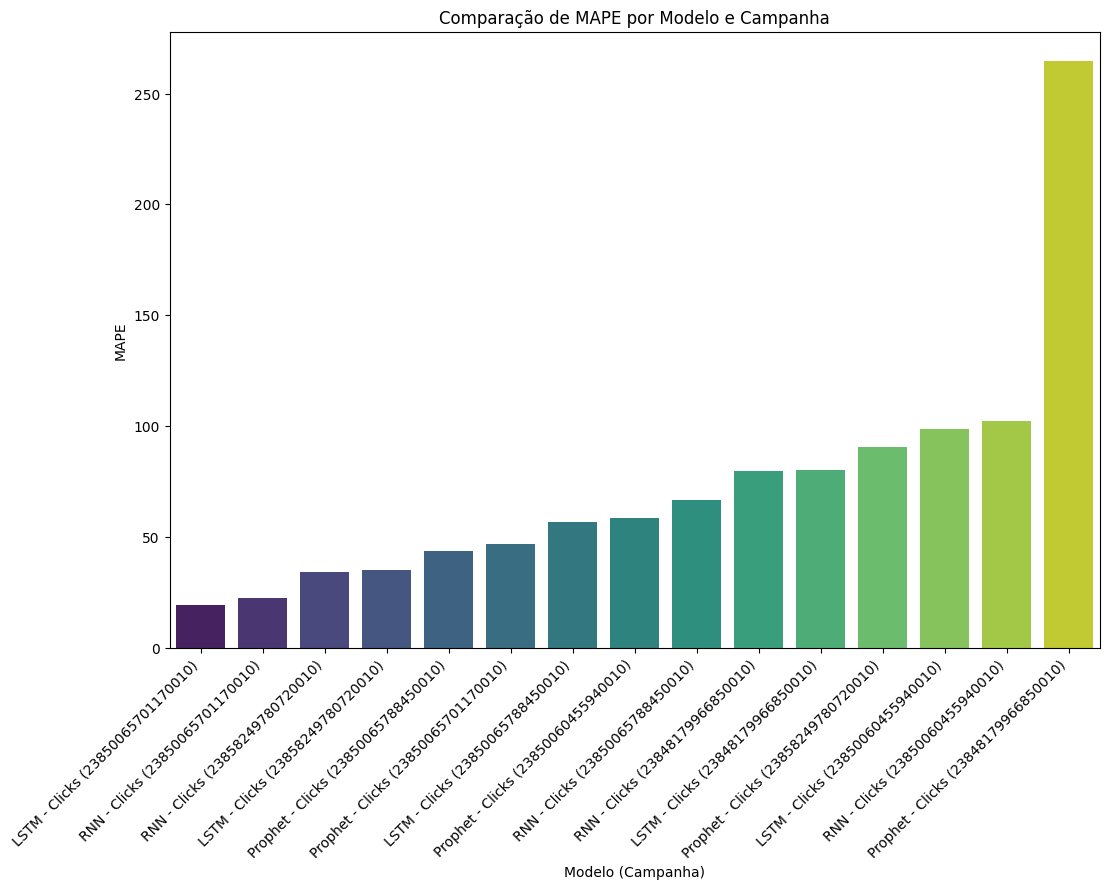

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




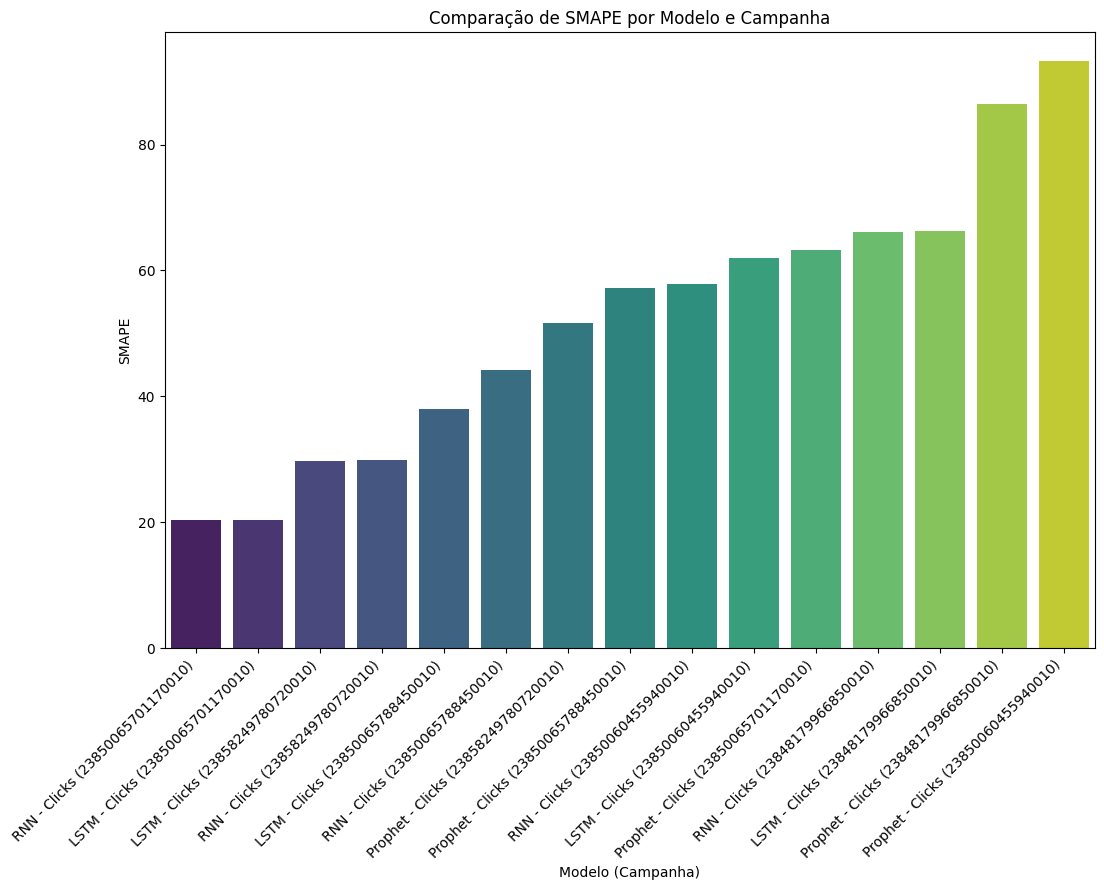

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




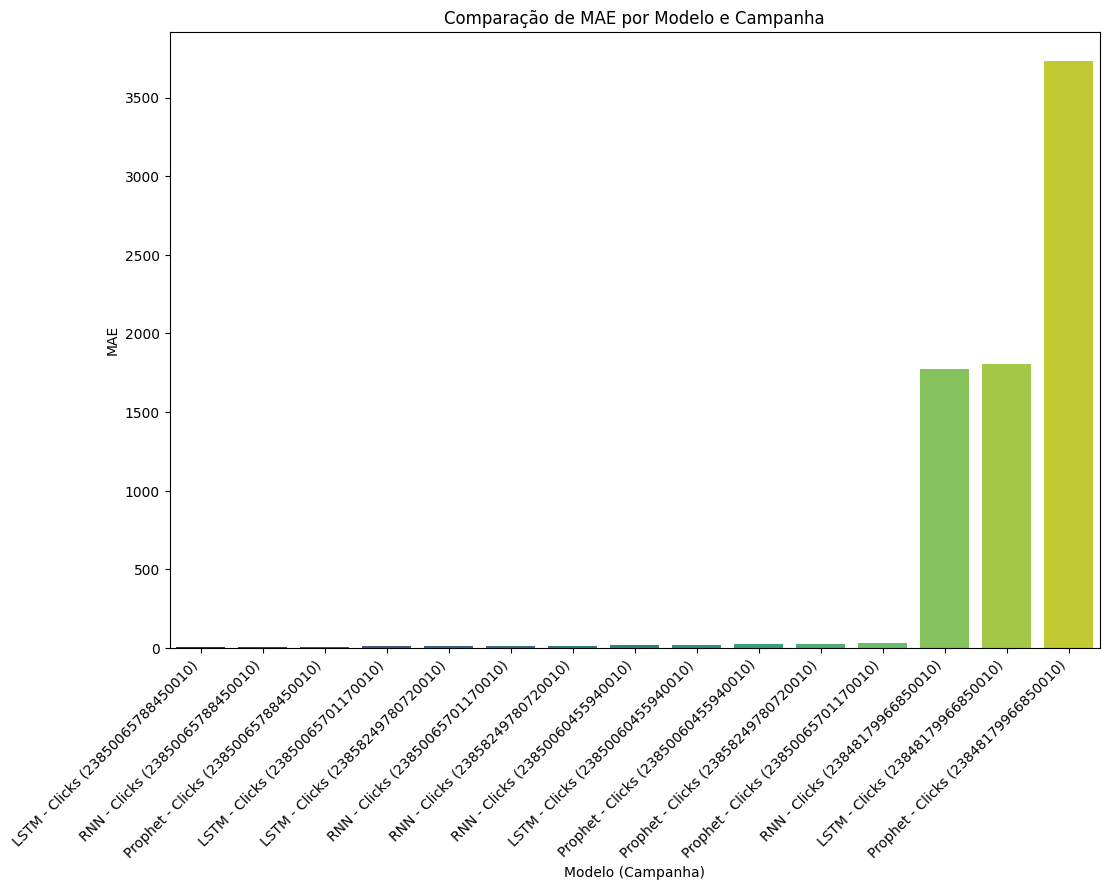

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




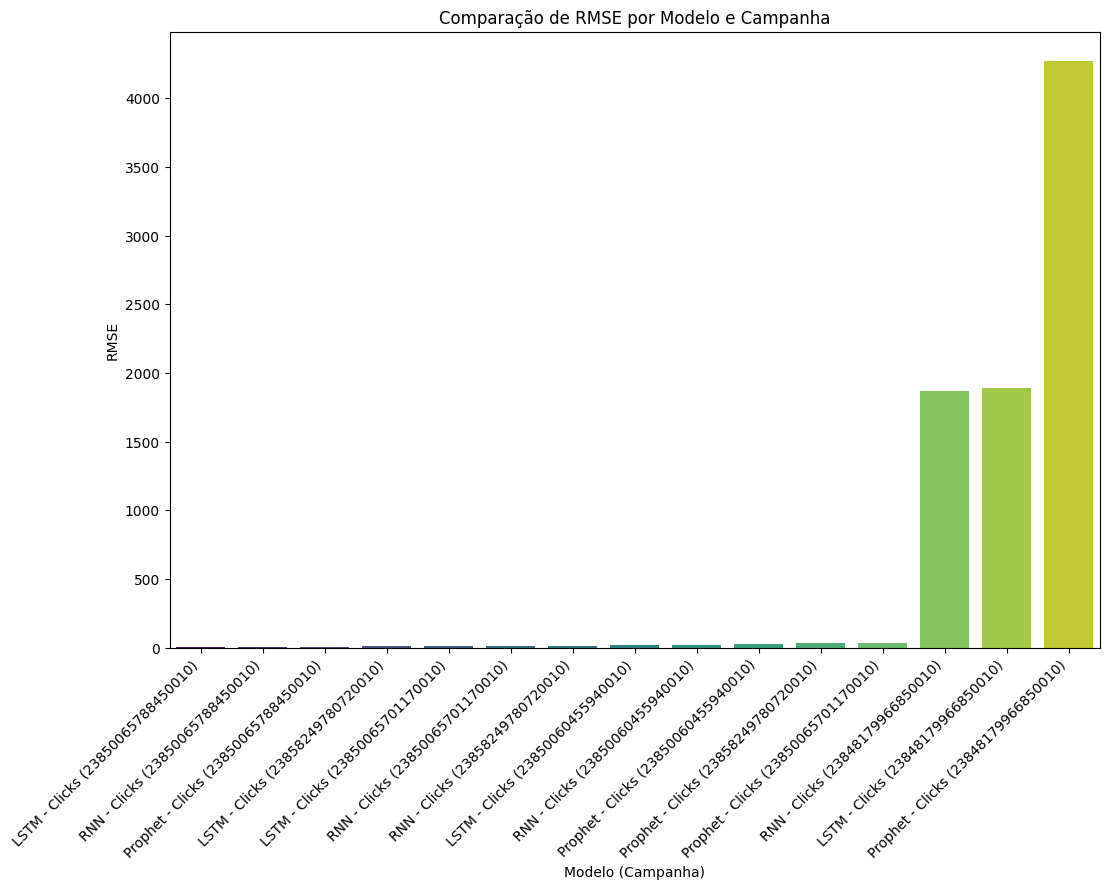

In [91]:
# Plotar todas métricas para CLICKS

plotar_barras(df_combined_clicks_seq, 'MAPE')
plotar_barras(df_combined_clicks_seq, 'SMAPE')
plotar_barras(df_combined_clicks_seq, 'MAE')
plotar_barras(df_combined_clicks_seq, 'RMSE')

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




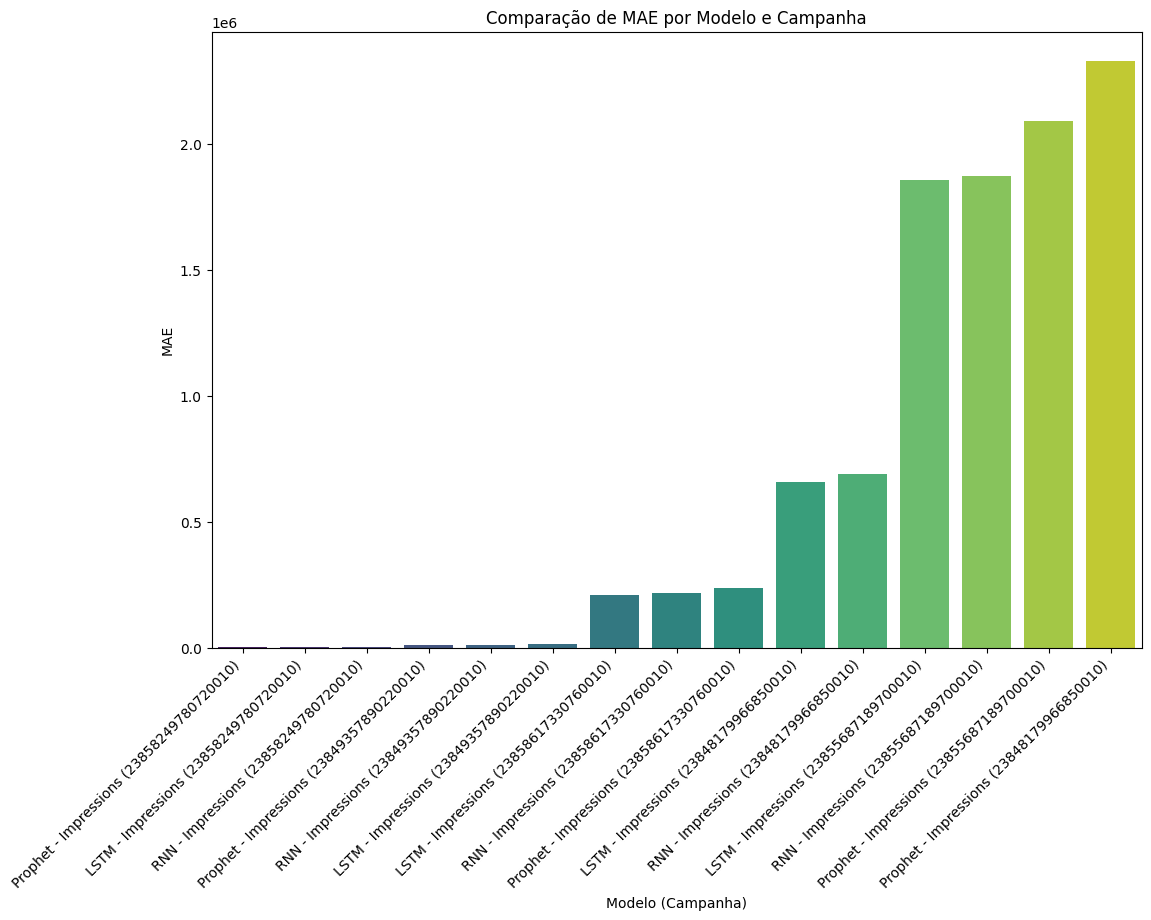

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




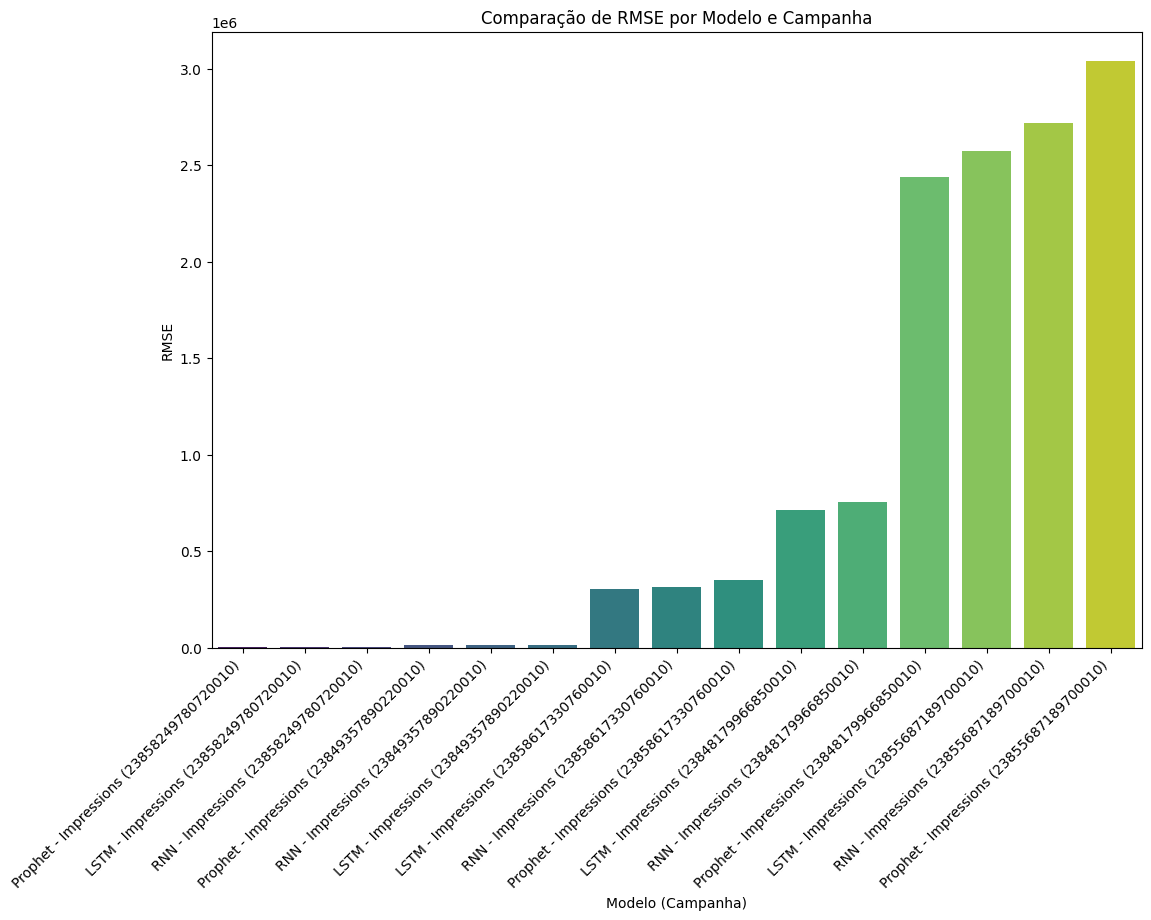

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




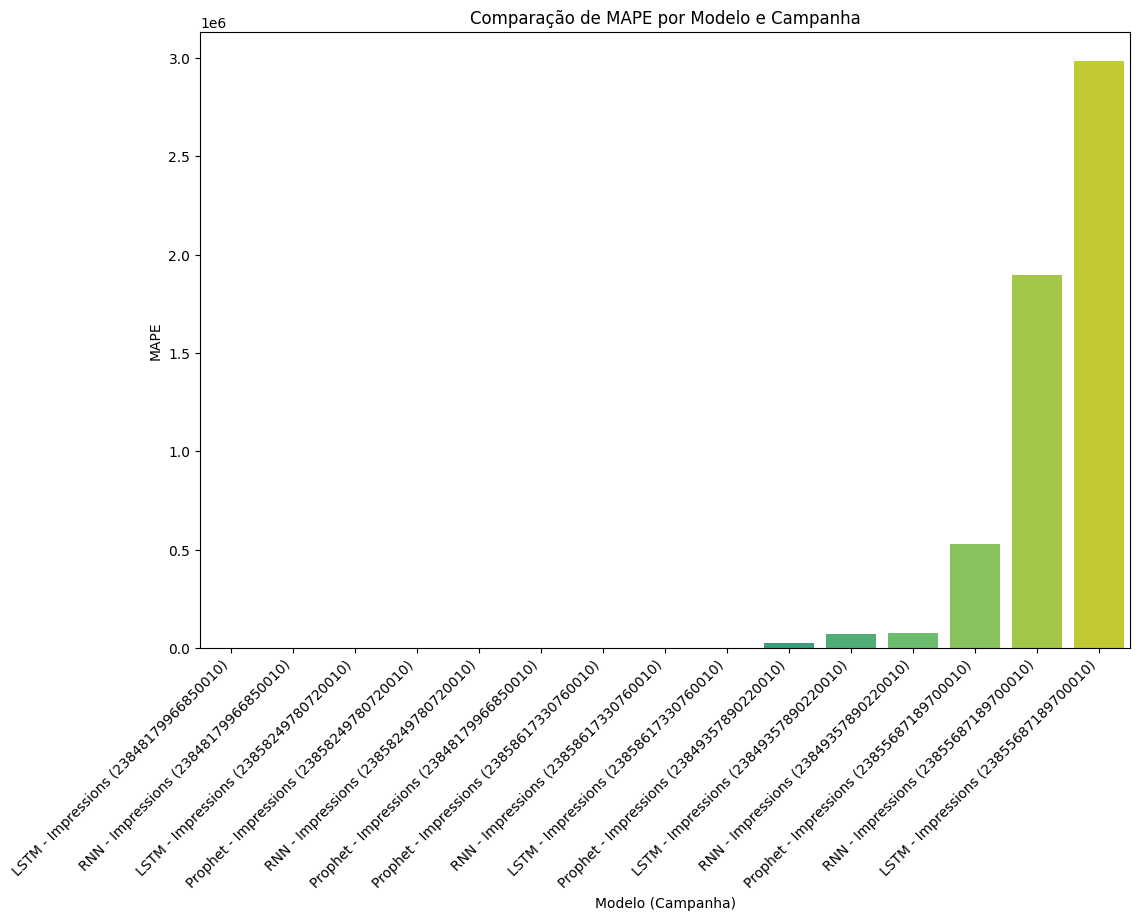

<ipython-input-56-c25f12c15327>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c25f12c15327>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




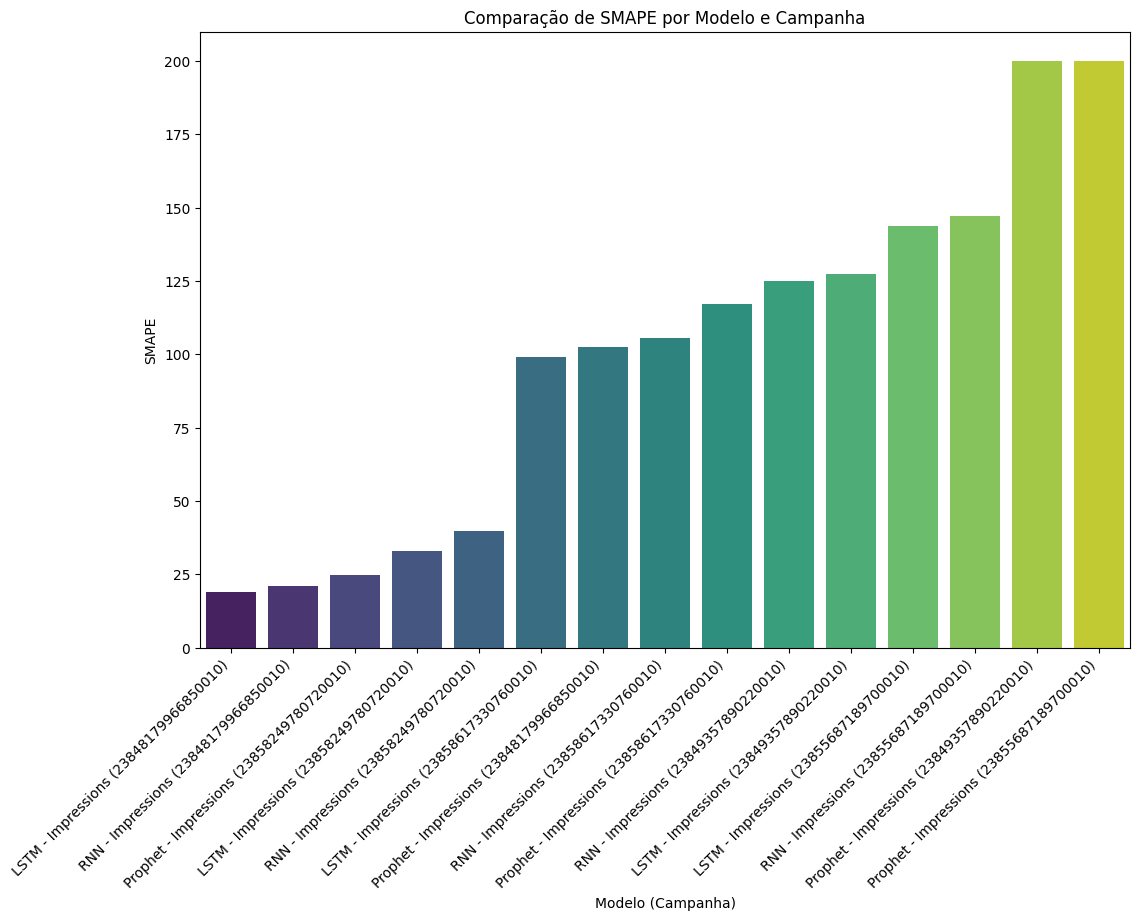

In [92]:
# Plotar todas as métricas para IMPRESSIONS
plotar_barras(df_combined_impressions_seq, 'MAE')
plotar_barras(df_combined_impressions_seq, 'RMSE')
plotar_barras(df_combined_impressions_seq, 'MAPE')
plotar_barras(df_combined_impressions_seq, 'SMAPE')


#Plot das 2 melhores performances para cada métrica

##CLICKS: Sequência 4 + Sequência 5

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



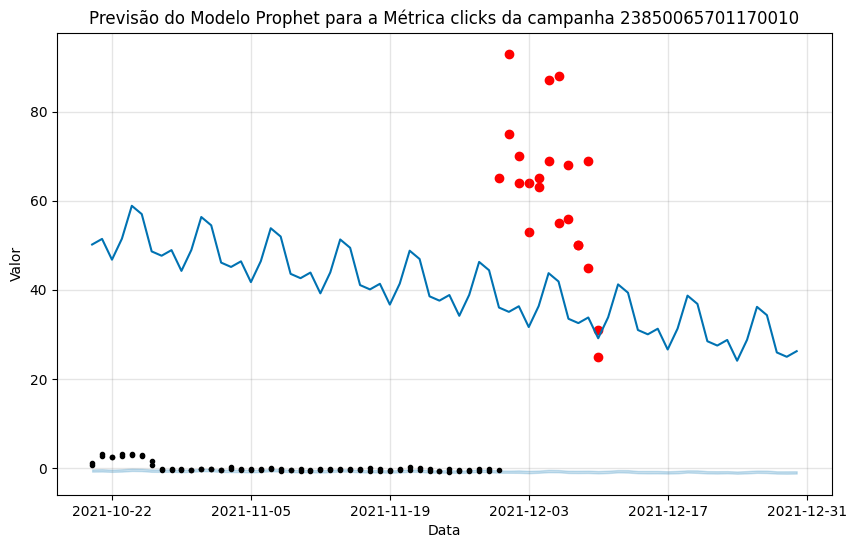

In [93]:
campanha_especifica = sequencia4_clicks['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

plotar_previsoes(forecast_clicks_norm_prophet4, dados_teste_clicks_norm_prophet4, 'clicks', campanha_especifica, modelo_prophet_clicks_norm4)

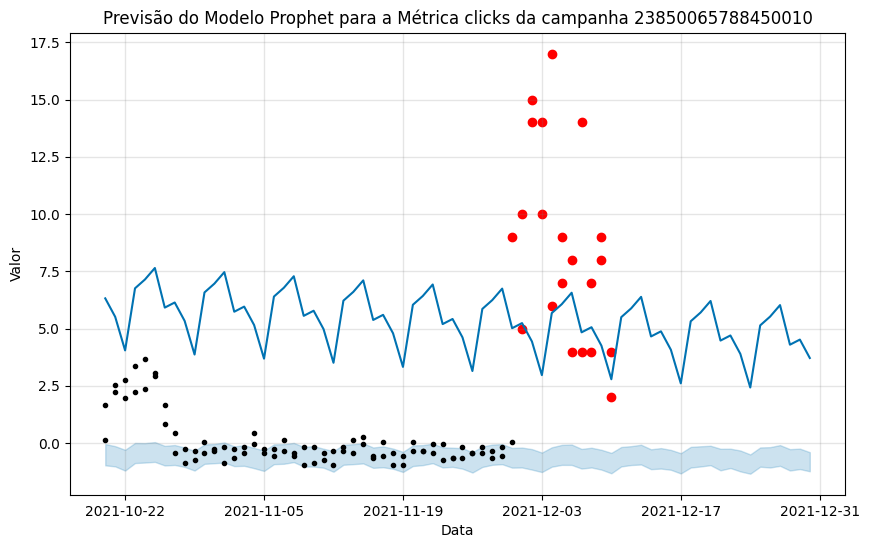

In [94]:
campanha_especifica = sequencia5_clicks['campaign_id'].unique()[0]
campanha_especifica = str(campanha_especifica)

plotar_previsoes(forecast_clicks_norm_prophet5, dados_teste_clicks_norm_prophet5, 'clicks', campanha_especifica, modelo_prophet_clicks_norm5)

In [95]:
# Acessando os dados de treino armazenados no modelo Prophet
dados_treino_prophet = modelo_prophet_clicks_norm5.history

# Visualizando os primeiros dados para entender a estrutura
print(dados_treino_prophet['y'])

# Verificando se há valores menores que 0 nos dados de treino
valores_negativos = dados_treino_prophet[dados_treino_prophet['y'] < 0]
print(valores_negativos)



0     0.150962
1     1.650962
2     2.550963
3     2.250963
4     2.750963
        ...   
78   -0.349039
79   -0.649039
80   -0.149039
81   -0.549039
82    0.050962
Name: y, Length: 83, dtype: float64
           ds         y  investment  floor         t  y_scaled
15 2021-10-27 -0.449039   -0.379621    0.0  0.170732 -0.122992
16 2021-10-28 -0.849039   -0.410438    0.0  0.195122 -0.232552
17 2021-10-28 -0.249039   -0.414136    0.0  0.195122 -0.068212
18 2021-10-29 -0.349039   -0.397371    0.0  0.219512 -0.095602
19 2021-10-29 -0.749039   -0.423011    0.0  0.219512 -0.205162
20 2021-10-30 -0.449039   -0.402055    0.0  0.243902 -0.122992
22 2021-10-31 -0.349039   -0.383812    0.0  0.268293 -0.095602
23 2021-10-31 -0.249039   -0.383565    0.0  0.268293 -0.068212
24 2021-11-01 -0.849039   -0.427202    0.0  0.292683 -0.232552
25 2021-11-01 -0.149039   -0.451609    0.0  0.292683 -0.040822
26 2021-11-02 -0.249039   -0.423011    0.0  0.317073 -0.068212
27 2021-11-02 -0.649039   -0.418327    0.0 

Exploração dos dados de treino para entender os valores negativos nos dados treino...